In [1]:
# Plot formatting.

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Linux Biolinum O"]
plt.rcParams["image.cmap"] = "tab20"

sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    font="Linux Biolinum O",
    rc=plt.rcParams,
)

plt.rcParams["boxplot.notch"] = False
plt.rcParams["boxplot.vertical"] = False
plt.rcParams["boxplot.whiskers"] = 0.99
plt.rcParams["boxplot.patchartist"] = True
plt.rcParams["boxplot.showfliers"] = False
plt.rcParams["boxplot.medianprops.linewidth"] = 0.75
plt.rcParams["boxplot.medianprops.color"] = "white"
plt.rcParams["boxplot.whiskerprops.linewidth"] = 0.75
plt.rcParams["boxplot.capprops.linewidth"] = 0.75
plt.rcParams["boxplot.boxprops.linewidth"] = 0.5
plt.rcParams["boxplot.showmeans"] = True
plt.rcParams["boxplot.meanprops.marker"] = "o"
plt.rcParams["boxplot.meanprops.markerfacecolor"] = "red"
plt.rcParams["boxplot.meanprops.markeredgecolor"] = "black"
plt.rcParams["boxplot.meanprops.markersize"] = 3

plt.rcParams["axes.edgecolor"] = "0.0"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["axes.spines.left"] = True
plt.rcParams["axes.spines.bottom"] = True

plt.rcParams["axes.grid"] = True
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.labelpad"] = 1.0
plt.rcParams["image.cmap"] = "tab20"
plt.rcParams["legend.frameon"] = False
plt.rcParams["figure.autolayout"] = True
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["savefig.pad_inches"] = 0.0 # If 0, watch out for weird axes spines.

plt.rcParams["xtick.minor.pad"] = 0.5
plt.rcParams["xtick.major.pad"] = 0.5

# From Matt: figsize is (3.5,2) for half-page and (7,2) for full-page.
figsize_full = (7.0, 2.0)
figsize_half = (3.5, 2.0)
figsize_quarter = (1.65, 1.0) # Has to be less than 1.75 otherwise it won't fit two side-by-side.
fig_dpi = 300
font_mini, font_tiny, font_small, font_medium, font_large, font_huge = 5, 6, 8, 10, 12, 14

# https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files

def fig_quarter():
    plt.rcParams["figure.figsize"] = figsize_quarter
    plt.rcParams["figure.dpi"] = 600
    plt.rcParams["font.size"] = font_mini
    plt.rcParams["axes.titlesize"] = font_mini
    plt.rcParams["axes.labelsize"] = font_tiny
    plt.rcParams["xtick.labelsize"] = font_mini
    plt.rcParams["ytick.labelsize"] = font_mini
    plt.rcParams["legend.fontsize"] = font_mini
    plt.rcParams["figure.titlesize"] = font_small

    for var in ["xtick", "ytick"]:
        plt.rcParams[f"{var}.major.size"] = 3.5 / 2
        plt.rcParams[f"{var}.minor.size"] = 2 / 2
        plt.rcParams[f"{var}.major.width"] = 0.8 / 2
        plt.rcParams[f"{var}.minor.width"] = 0.6 / 2
        plt.rcParams[f"{var}.major.pad"] = 3.5 / 2
        plt.rcParams[f"{var}.minor.pad"] = 3.4 / 2
    plt.rcParams["axes.linewidth"] = 0.8 / 2
    plt.rcParams["grid.linewidth"] = 0.8 / 2
    plt.rcParams["lines.linewidth"] = 2 / 2
    plt.rcParams["lines.markersize"] = 6 / 2

def fig_half():
    plt.rcParams["figure.figsize"] = figsize_half
    plt.rcParams["figure.dpi"] = fig_dpi
    plt.rcParams["font.size"] = font_small
    plt.rcParams["axes.titlesize"] = font_small
    plt.rcParams["axes.labelsize"] = font_small
    plt.rcParams["xtick.labelsize"] = font_small
    plt.rcParams["ytick.labelsize"] = font_small
    plt.rcParams["legend.fontsize"] = font_small
    plt.rcParams["figure.titlesize"] = font_large

    for var in ["xtick", "ytick"]:
        plt.rcParams[f"{var}.major.size"] = 3.5
        plt.rcParams[f"{var}.minor.size"] = 2
        plt.rcParams[f"{var}.major.width"] = 0.8
        plt.rcParams[f"{var}.minor.width"] = 0.6
        plt.rcParams[f"{var}.major.pad"] = 3.5
        plt.rcParams[f"{var}.minor.pad"] = 3.4
    plt.rcParams["axes.linewidth"] = 0.8
    plt.rcParams["grid.linewidth"] = 0.8
    plt.rcParams["lines.linewidth"] = 1
    plt.rcParams["lines.markersize"] = 6

def fig_full():
    plt.rcParams["figure.figsize"] = figsize_full
    plt.rcParams["figure.dpi"] = fig_dpi
    plt.rcParams["font.size"] = font_medium
    plt.rcParams["axes.titlesize"] = font_medium
    plt.rcParams["axes.labelsize"] = font_large
    plt.rcParams["xtick.labelsize"] = font_medium
    plt.rcParams["ytick.labelsize"] = font_medium
    plt.rcParams["legend.fontsize"] = font_medium
    plt.rcParams["figure.titlesize"] = font_huge


def make_legend(handles, labels, path, ncols):
    figLegend = plt.figure()
    plt.figlegend(handles, labels, loc="center", ncols=ncols)
    figLegend.savefig(path)
    plt.close(figLegend)

In [2]:
from IPython.display import display
from pathlib import Path
from matplotlib.ticker import PercentFormatter

ARTIFACT_ROOT = Path("/home/kapi/woof/artifact/")
MODEL_ROOT = ARTIFACT_ROOT / "model"
PLOT_ROOT = ARTIFACT_ROOT / "plot"
PLOT_ROOT.mkdir(exist_ok=True, parents=True)

def read_query_seed_csv(csvf):
    df = pd.read_csv(csvf)
    df = df.drop([0, 1])
    df = df.rename(columns={"Unnamed: 0": "Query", "Unnamed: 1": "Seed"})
    df = df.reset_index(drop=True)
    df = df.sort_values(["Query", "Seed"])
    for col in df.columns:
        if col == "Query":
            df[col] = df[col].astype(str)
        elif col == "Seed":
            df[col] = df[col].astype(int)
        else:
            df[col] = df[col].astype(float)
    return df

def read_runtime_csv(csvf):
    df = pd.read_csv(csvf)
    df = df.rename(columns={"0": "Run-time (ms)"})
    df = df.set_index("Experiment")
    return df

def prettify_time(s):
    min_s = 60
    h_s = 60 * min_s
    day_s = 24 * h_s
    week_s = 7 * day_s
    if s < min_s:
        return f"{s:,.0f}s"
    elif min_s <= s < h_s:
        return f"{s/min_s:,.0f}min"
    elif h_s <= s < day_s:
        return f"{s/h_s:,.0f}h"
    elif day_s <= s < week_s:
        return f"{s/day_s:,.0f}d"
    elif week_s <= s:
        return f"{s/week_s:,.0f}w"

In [3]:
def sanity_check():
    import os
    from pathlib import Path
    import pglast

    def sql_file_queries(filepath: Path) -> [str]:
        with open(filepath) as f:
            lines = []
            for line in f:
                if line.startswith("--"):
                    continue
                if len(line.strip()) == 0:
                    continue
                lines.append(line)
            queries = "".join(lines)
            return pglast.split(queries)

    planfiles = sorted(ARTIFACT_ROOT.glob(f"./experiment/**/*.ok"))
    all_ok = True
    for pf in planfiles:
        pfs = str(pf)
        tout = Path(pfs[:-3] + ".timeout")
        res = Path(pfs[:-3] + ".res")
        err = Path(pfs[:-3] + ".err")
        if not (tout.exists() or res.exists() or err.exists()):
            print(pf)
            all_ok = False
    if not all_ok:
        raise Exception
    
sanity_check()

tpch_sf_10
rqs_df


Query   Seed  bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0       1-1  15723                                     1320.965   
1       1-1  15724                                     1322.361   
2       1-1  15725                                     1324.088   
3       1-1  15726                                     1322.425   
4       1-1  15727                                     1318.365   
...     ...    ...                                          ...   
21993   9-1  16716                                      363.924   
21994   9-1  16717                                      365.423   
21995   9-1  16718                                       81.491   
21996   9-1  16719                                       84.389   
21997   9-1  16720                                       83.849   

       bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                          8556.996   
1                                          8552.083   
2                                          8549.571   
3                                          8512.670   
4                                          8503.888   
...                                             ...   
21993                                      3320.751   
21994                                      5116.570   
21995                                      3347.162   
21996                                      3341.013   
21997                                      3332.419   

       bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
21993                                           1.0   
21994                                           1.0   
21995                                           1.0   
21996                                           1.0   
21997                                           1.0   

       bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                          8428.182   
1                                             0.000   
2                                             0.000   
3                                          8585.578   
4                                             0.000   
...                                             ...   
21993                                         1.000   
21994                                         1.000   
21995                                         1.000   
21996                                         1.000   
21997                                         1.000   

       bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                         1355.024   
1                                            0.000   
2                                            0.000   
3                                         1355.536   
4                                            0.000   
...                                            ...   
21993                                        1.000   
21994                                        0.000   
21995                                        1.000   
21996                                        1.000   
21997                                        0.000   

       bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  \
0                                          8447.787   
1                                             0.000   
2                                             0.000   
3                                          8479.459   
4                                             0.000   
...                                             ...   
21993                                         1.000   
21994                                         0.000   
21995                                         1.000   
21996              

pqs_df


Query   Seed  Operator Time  \
0      1-1  15721          7.674   
1      1-1  15723          8.106   
2      1-1  15724          7.986   
3      1-1  15729          8.132   
4      1-1  15735          8.190   
...    ...    ...            ...   
4395   9-1  16683          3.079   
4396   9-1  16691          3.069   
4397   9-1  16703          2.975   
4398   9-1  16708          2.960   
4399   9-1  16709          4.849   

      Predicted_bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0                                              1.267247       
1                                              1.280887       
2                                              1.288864       
3                                              1.267978       
4                                              1.254469       
...                                                 ...       
4395                                           0.311180       
4396                                           0.310307       
4397                                           0.310532       
4398                                           0.309938       
4399                                           0.075462       

      Predicted_bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                              7.877511        
1                                              8.009992        
2                                              7.974811        
3                                              7.869820        
4                                              7.919933        
...                                                 ...        
4395                                           3.038704        
4396                                           3.032281        
4397                                           3.021178        
4398                                           3.029224        
4399                                           5.054270        

      Predicted_bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                              7.818003        
1                                              6.427473        
2                                              6.427473        
3                                              6.427473        
4                                              6.427473        
...                                                 ...        
4395                                           2.063515        
4396                                           2.747115        
4397                                           2.792391        
4398                                           2.784775        
4399                                           1.651270        

      Predicted_bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                              7.673443        
1                                              7.911766        
2                                              7.965259        
3                                              7.814164        
4                                              7.781407        
...                                                 ...        
4395                                           2.902299        
4396                                           2.857508        
4397                                           2.910315        
4398                                           2.887650        
4399                                           4.440726        

      Predicted_bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                              1.228740       
1                                              1.250592       
2                                              1.243632       
3                                              1.228573       
4                                              1.218707       
...                                                 ...       
4395                                           0.284842       
4396

Run-time (ms):  [126362008.64600001, 1255104099.853, 84258790.351, 1418988.288]
Mean default run-time (ms):  5744.249870260934
std default run-time (ms):  8419.942115353868
Median default run-time (ms):  2388.1855
tpch_sf_10 configs_hack=True eval numbers
['Original', 'Automatic', 'Manual', 'C10'] [126362.00864600002, 1255104.099853, 84258.790351, 1418.988288]
Original  speedup (x): 1.0
Automatic  speedup (x): 0.10067850838890556
Manual  speedup (x): 1.4996893276014176
C10  speedup (x): 89.05077632747876


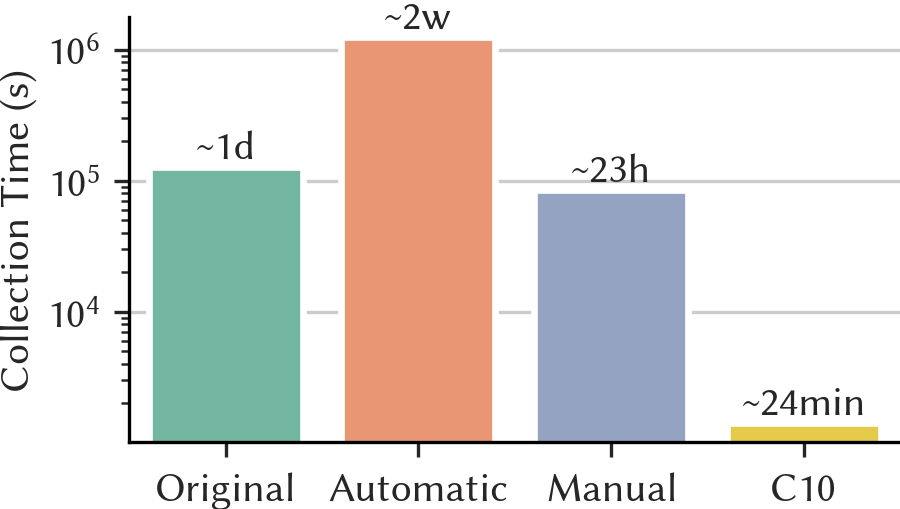

Factor Error


default  nts_b10_r15721  sts_b10_r15721  \
0     1.042577        1.244608        1.425518   
1     1.005143        1.322833        1.506991   
2     1.016900        1.305737        1.480647   
3     1.028123        1.319244        1.507446   
4     1.033642        1.331662        1.518587   
...        ...             ...             ...   
4395  1.001031        4.857562        1.825644   
4396  1.003488        4.872972        1.831081   
4397  1.027667        5.031395        1.637615   
4398  1.034203        5.053032        1.633829   
4399  1.023688        4.227547        3.294681   

      bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721  
0                                        5.963378  
1                                        6.242010  
2                                        6.324140  
3                                        6.602293  
4                                        6.300216  
...                                           ...  
4395                                     9.706851  
4396                                     9.469519  
4397                                     9.198973  
4398                                     8.894064  
4399                                    53.406219  

[4400 rows x 4 columns]

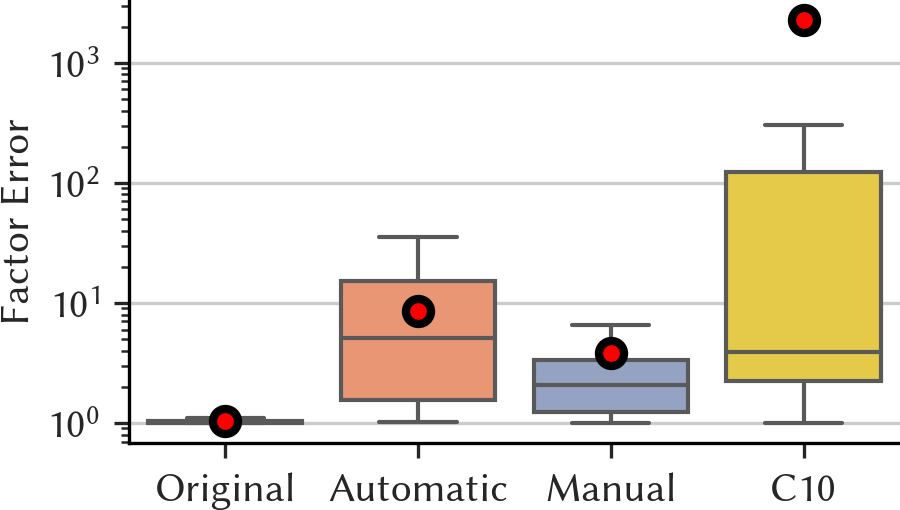

default  nts_b10_r15721  sts_b10_r15721  \
0     1.042577        1.244608        1.425518   
1     1.005143        1.322833        1.506991   
2     1.016900        1.305737        1.480647   
3     1.028123        1.319244        1.507446   
4     1.033642        1.331662        1.518587   
...        ...             ...             ...   
4395  1.001031        4.857562        1.825644   
4396  1.003488        4.872972        1.831081   
4397  1.027667        5.031395        1.637615   
4398  1.034203        5.053032        1.633829   
4399  1.023688        4.227547        3.294681   

      bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721  
0                                        5.963378  
1                                        6.242010  
2                                        6.324140  
3                                        6.602293  
4                                        6.300216  
...                                           ...  
4395                                     9.706851  
4396                                     9.469519  
4397                                     9.198973  
4398                                     8.894064  
4399                                    53.406219  

[4400 rows x 4 columns]

default
Mean Factor Error:  1.0312438263415262
Median Factor Error:  1.0171935148311844
nts_b10_r15721
Mean Factor Error:  8.61890302285196
Median Factor Error:  5.090116602782226
sts_b10_r15721
Mean Factor Error:  3.860225158275727
Median Factor Error:  2.062670474364448
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721
Mean Factor Error:  2266.42837989479
Median Factor Error:  3.9334880187809773


R <= 1.1  1.1 < R < 2  2 < R < 5  \
default                                      0.944318     0.055682   0.000000   
nts_b10_r15721                               0.024318     0.337955   0.133636   
sts_b10_r15721                               0.103636     0.375455   0.398182   
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721  0.041818     0.152955   0.350682   

                                               R >= 5  
default                                      0.000000  
nts_b10_r15721                               0.504091  
sts_b10_r15721                               0.122727  
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721  0.454545

R <= 1.1  1.1 < R < 2  2 < R < 5  \
default                                            94            6          0   
nts_b10_r15721                                      2           34         13   
sts_b10_r15721                                     10           38         40   
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721         4           15         35   

                                             R >= 5  
default                                           0  
nts_b10_r15721                                   50  
sts_b10_r15721                                   12  
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721      45

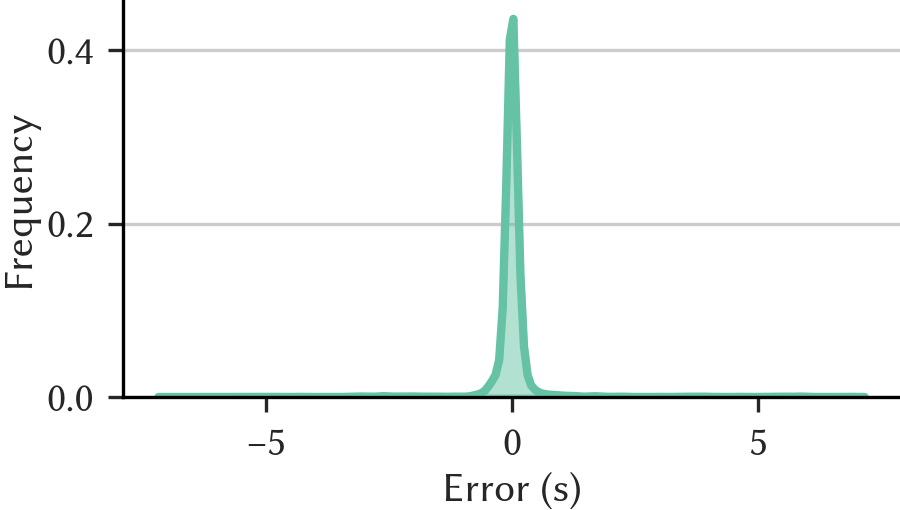

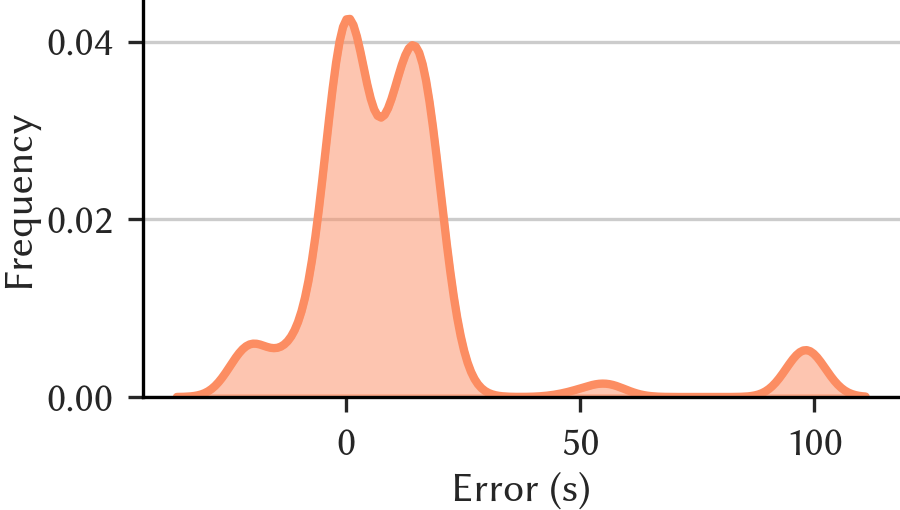

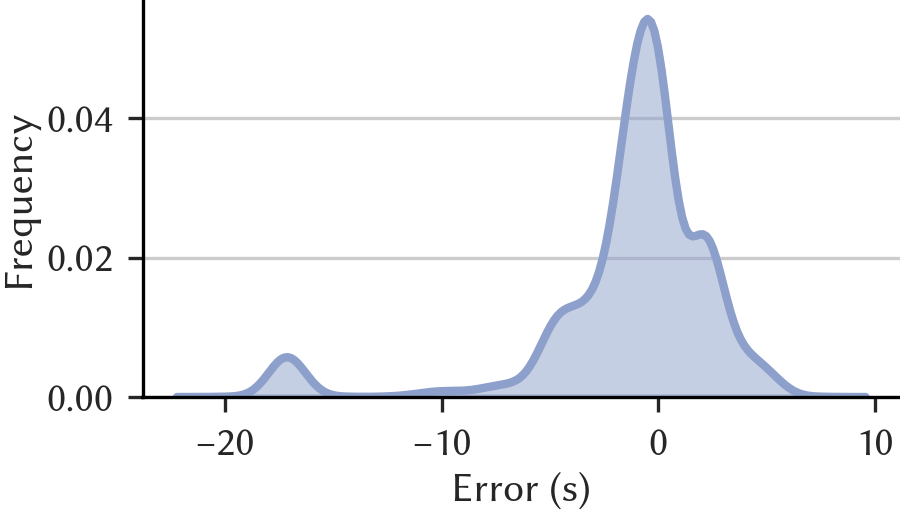

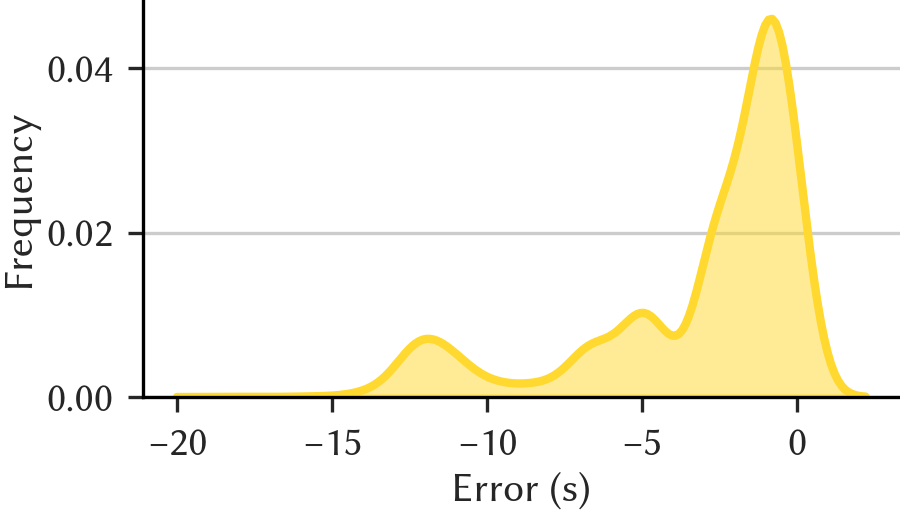

MAE (s)


default                                         0.136508
nts_b10_r15721                                 13.840888
sts_b10_r15721                                  2.555432
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721     3.190505
dtype: float64

['Original', 'Automatic', 'Manual', 'C10']


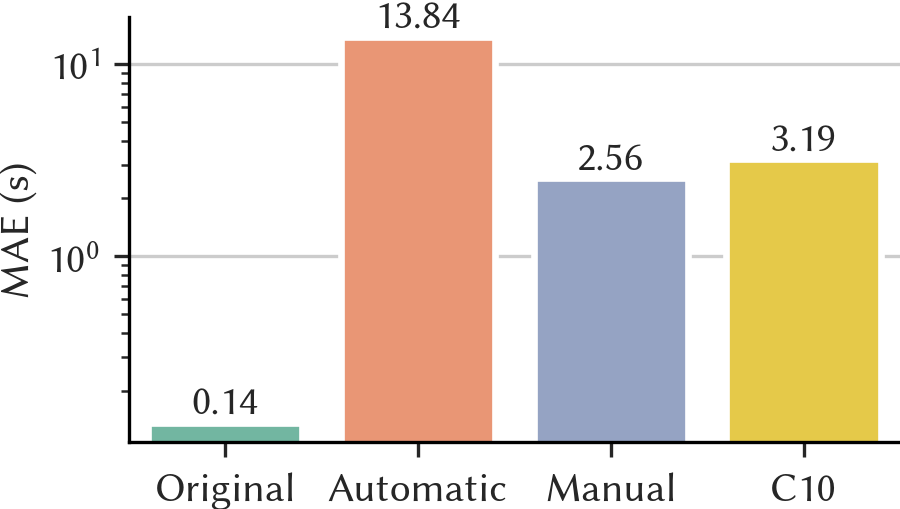

Median AE (s)


default                                         0.039338
nts_b10_r15721                                 10.460412
sts_b10_r15721                                  1.503197
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721     1.452869
dtype: float64

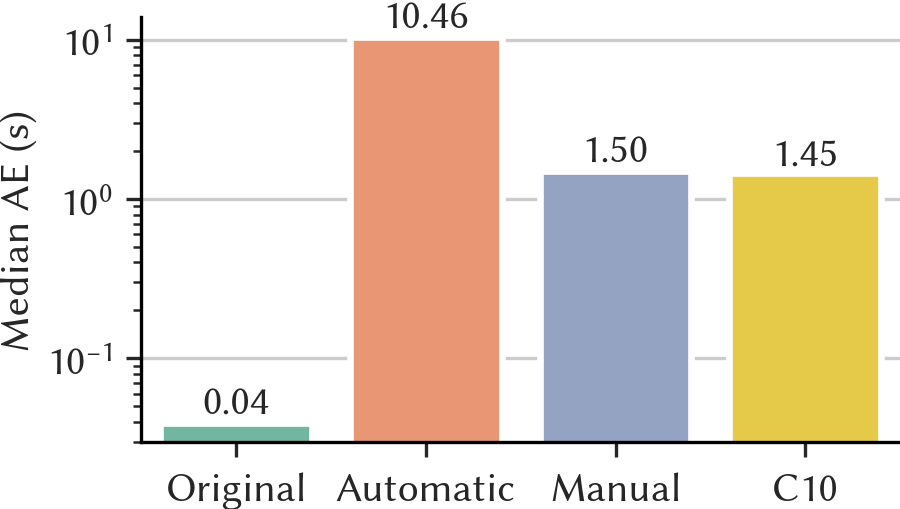

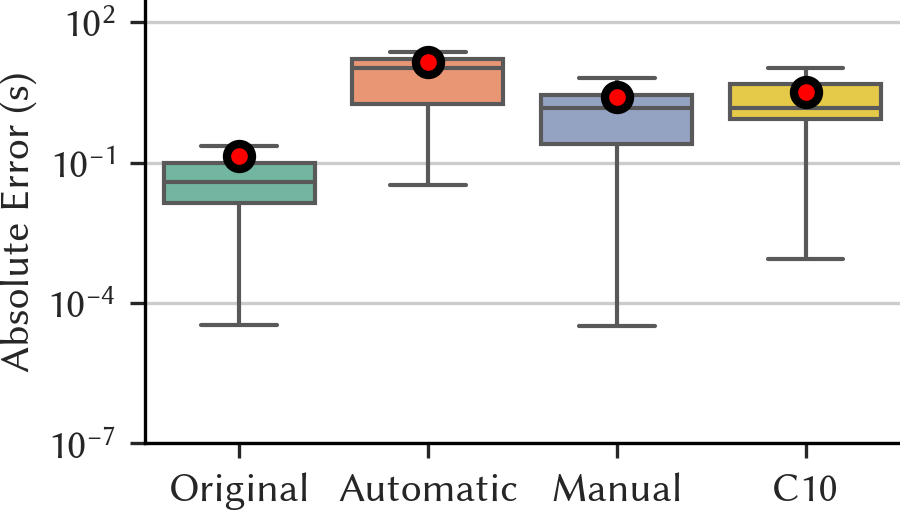

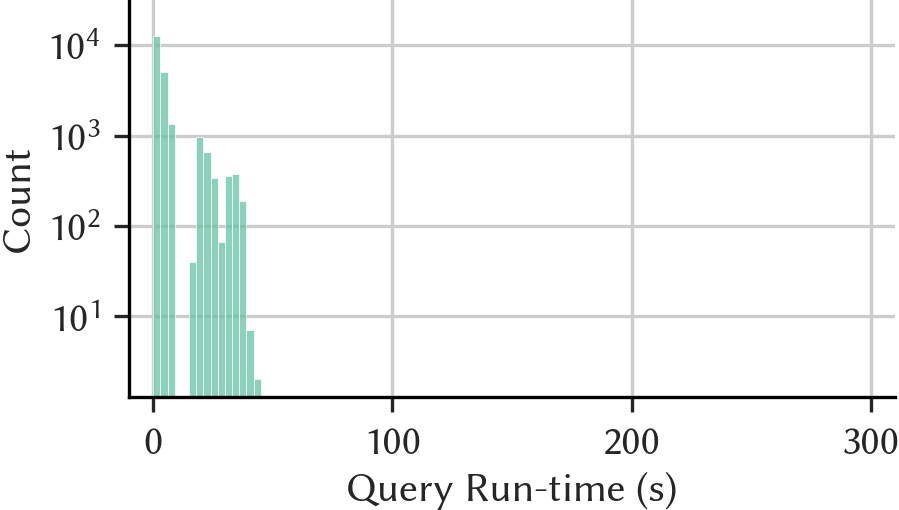

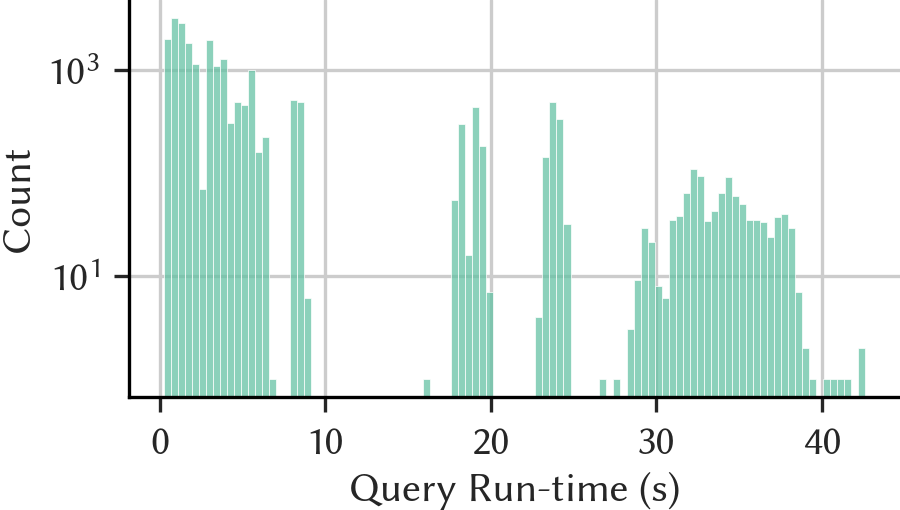

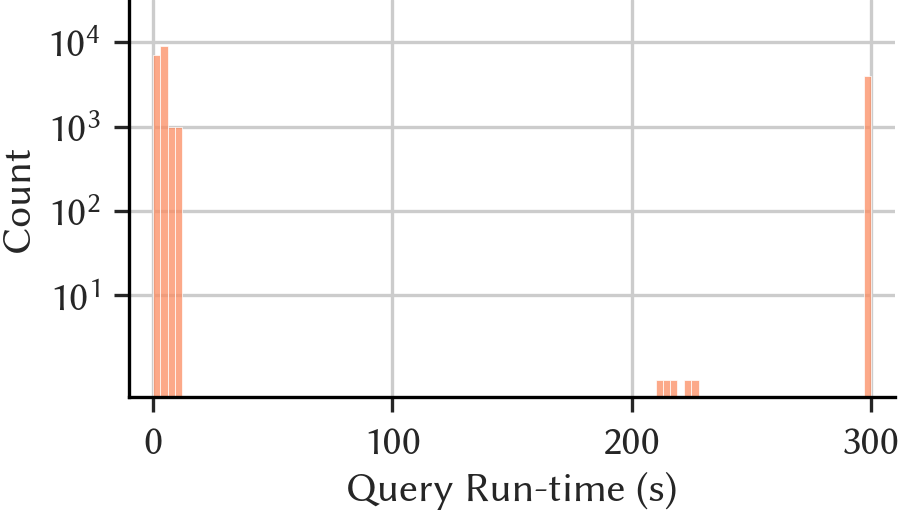

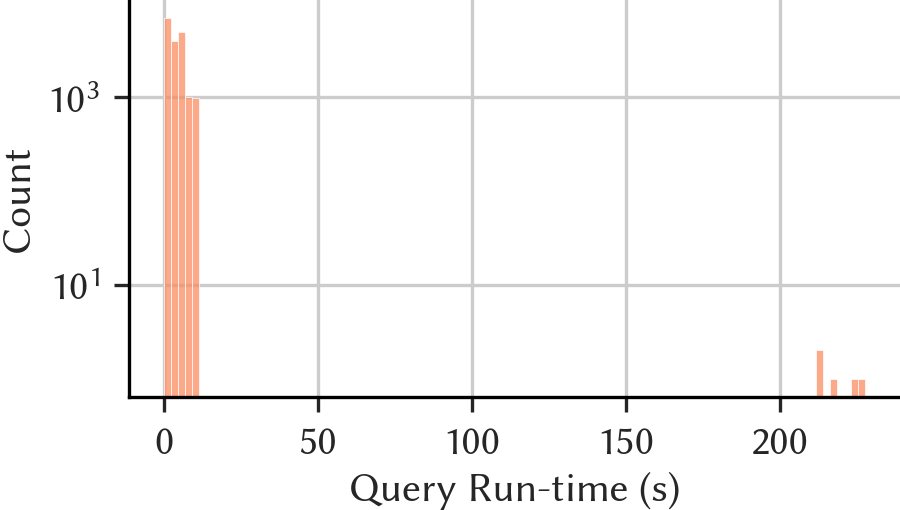

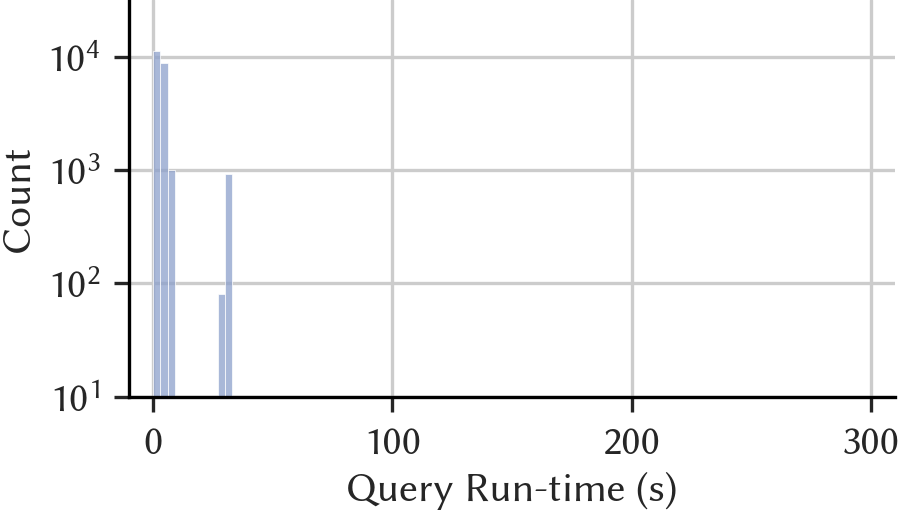

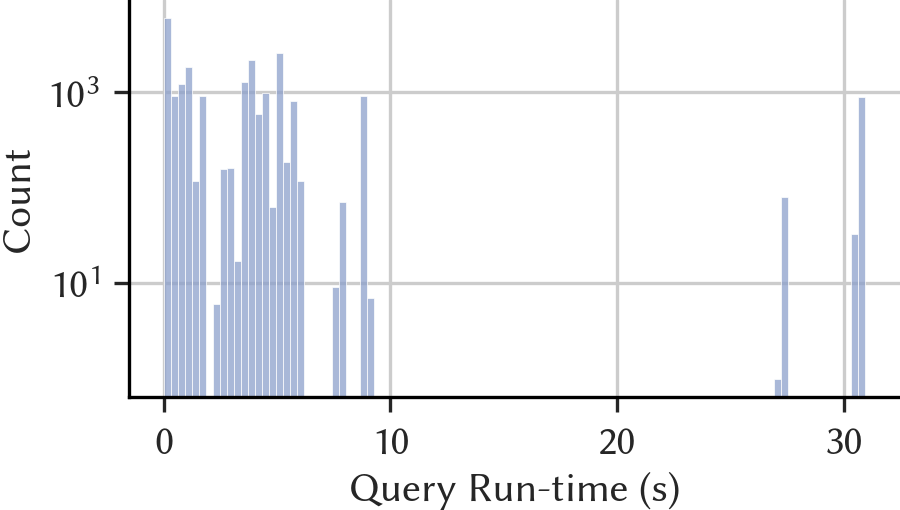

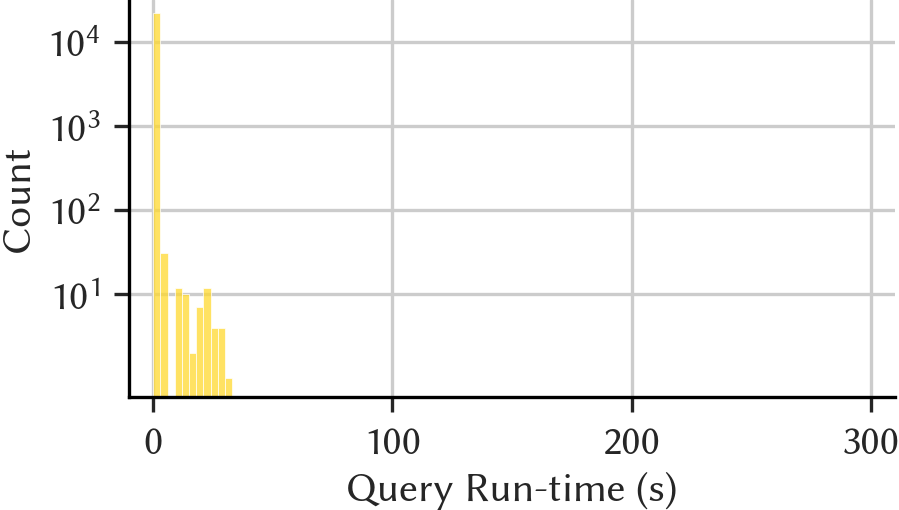

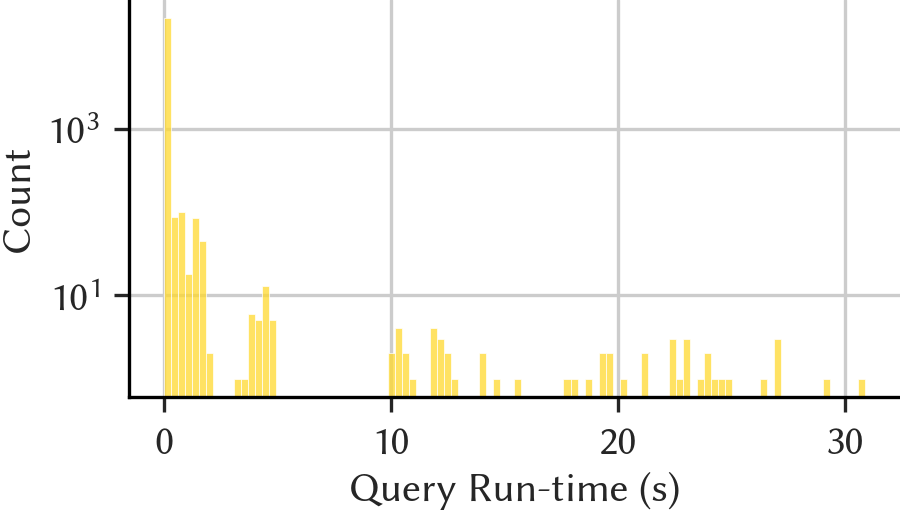

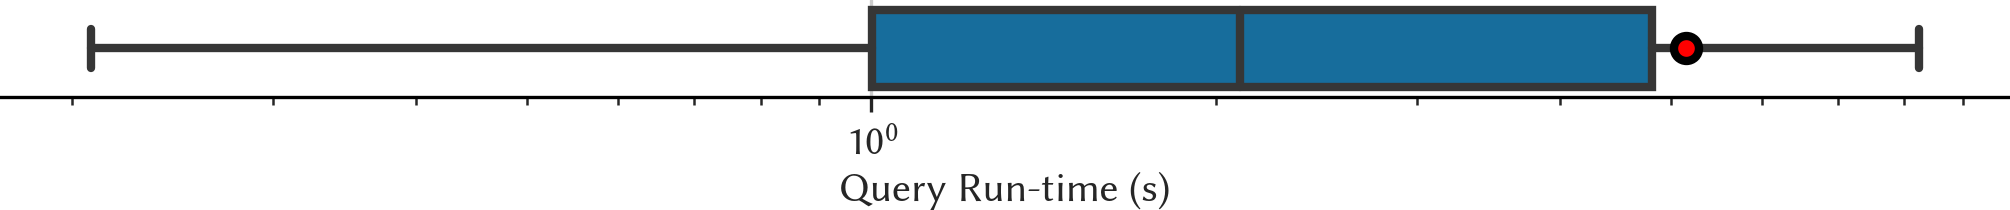

tpch_sf_100
rqs_df


Query   Seed  bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0       1-1  15723                                    15010.848   
1       1-1  15724                                    13217.015   
2       1-1  15725                                    13979.878   
3       1-1  15726                                    13919.986   
4       1-1  15727                                    13913.646   
...     ...    ...                                          ...   
21993   9-1  16716                                    52914.483   
21994   9-1  16717                                    48339.214   
21995   9-1  16718                                    47361.436   
21996   9-1  16719                                    47622.368   
21997   9-1  16720                                    47620.736   

       bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         51397.831   
1                                         57164.526   
2                                         49538.092   
3                                         55713.154   
4                                         62865.045   
...                                             ...   
21993                                     22895.603   
21994                                     23206.164   
21995                                     26536.352   
21996                                     22462.141   
21997                                     23090.234   

       bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
21993                                           2.0   
21994                                           2.0   
21995                                           2.0   
21996                                           2.0   
21997                                           2.0   

       bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                         71172.549   
1                                             2.000   
2                                             0.000   
3                                         71961.938   
4                                             2.000   
...                                             ...   
21993                                         2.000   
21994                                         2.000   
21995                                         2.000   
21996                                         2.000   
21997                                         2.000   

       bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                        12765.244   
1                                            0.000   
2                                            0.000   
3                                        13430.562   
4                                            3.000   
...                                            ...   
21993                                        2.000   
21994                                        1.000   
21995                                        1.000   
21996                                        1.000   
21997                                        1.000   

       bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  \
0                                         69485.349   
1                                             0.000   
2                                             0.000   
3                                         77549.908   
4                                             0.000   
...                                             ...   
21993                                     21873.462   
21994                                         1.000   
21995                                         2.000   
21996              

pqs_df


Query   Seed  Operator Time  \
0      1-1  15721         65.942   
1      1-1  15723         65.469   
2      1-1  15724         66.630   
3      1-1  15729         67.398   
4      1-1  15735         66.358   
...    ...    ...            ...   
3800   9-1  16683         59.704   
3801   9-1  16691         56.806   
3802   9-1  16703         60.589   
3803   9-1  16708         59.628   
3804   9-1  16709         63.227   

      Predicted_bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0                                             12.635946       
1                                             12.600019       
2                                             13.126281       
3                                             12.823589       
4                                             12.874330       
...                                                 ...       
3800                                          44.392025       
3801                                           9.754292       
3802                                          43.494835       
3803                                          44.415020       
3804                                          44.351260       

      Predicted_bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                             54.120613        
1                                             57.686974        
2                                             54.223278        
3                                             54.168674        
4                                             53.649990        
...                                                 ...        
3800                                          16.190378        
3801                                          16.676308        
3802                                          16.534310        
3803                                          16.222570        
3804                                          16.190378        

      Predicted_bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                              73.98701        
1                                              73.98701        
2                                              73.98701        
3                                              73.98701        
4                                              73.98701        
...                                                 ...        
3800                                           66.02304        
3801                                           65.08738        
3802                                           66.37268        
3803                                           66.02304        
3804                                           66.02304        

      Predicted_bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                             68.417850        
1                                             67.835380        
2                                             66.923810        
3                                             63.748000        
4                                             68.702934        
...                                                 ...        
3800                                          69.826250        
3801                                          57.750607        
3802                                          70.810165        
3803                                          70.089066        
3804                                          69.826250        

      Predicted_bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                             23.875965       
1                                             24.077300       
2                                             23.907846       
3                                             11.687002       
4                                             23.755684       
...                                                 ...       
3800                                          47.736588       
3801

Run-time (ms):  [2104363495.608, 1569743787.922, 925090793.463, 304486847.245]
Mean default run-time (ms):  95661.5826715156
std default run-time (ms):  94893.01326898289
Median default run-time (ms):  56183.982
tpch_sf_100 configs_hack=True eval numbers
['Original', 'Automatic', 'Manual', 'C10'] [2104363.495608, 1569743.787922, 925090.7934630001, 304486.847245]
Original  speedup (x): 1.0
Automatic  speedup (x): 1.3405776864985848
Manual  speedup (x): 2.2747642831148402
C10  speedup (x): 6.911180284627404


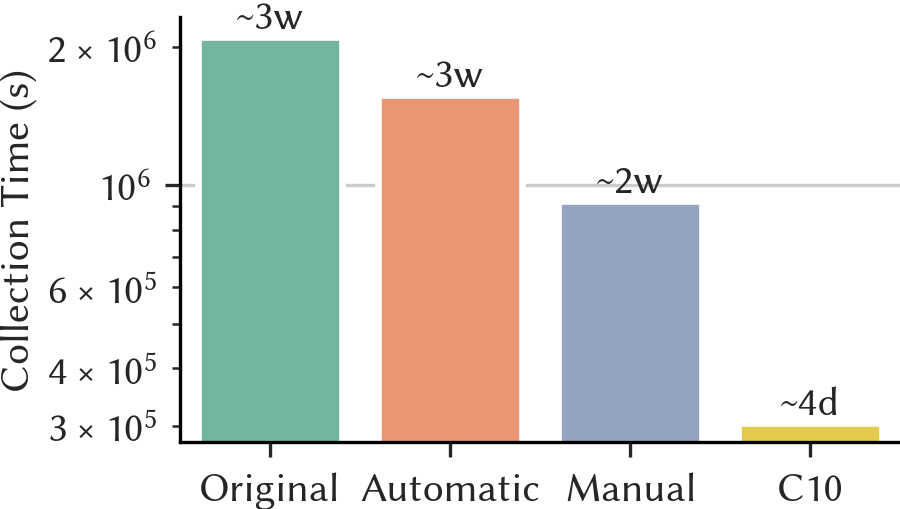

Factor Error


default  nts_b10_r15721  sts_b10_r15721  \
0     1.006591        1.359567        1.753792   
1     1.028080        1.369463        1.766397   
2     1.002755        1.345601        1.735618   
3     1.005398        1.330217        1.715965   
4     1.019333        1.351049        1.742842   
...        ...             ...             ...   
3800  1.038875        2.160161        1.395172   
3801  1.039306        2.675602        1.663313   
3802  1.011034        2.214101        1.340072   
3803  1.039427        2.157863        1.393416   
3804  1.019040        2.288034        1.477051   

      bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721  
0                                        2.720946  
1                                        3.682752  
2                                        3.737970  
3                                        5.508196  
4                                        2.855101  
...                                           ...  
3800                                     4.829642  
3801                                     4.948737  
3802                                     4.846146  
3803                                     1.934432  
3804                                     5.114628  

[3805 rows x 4 columns]

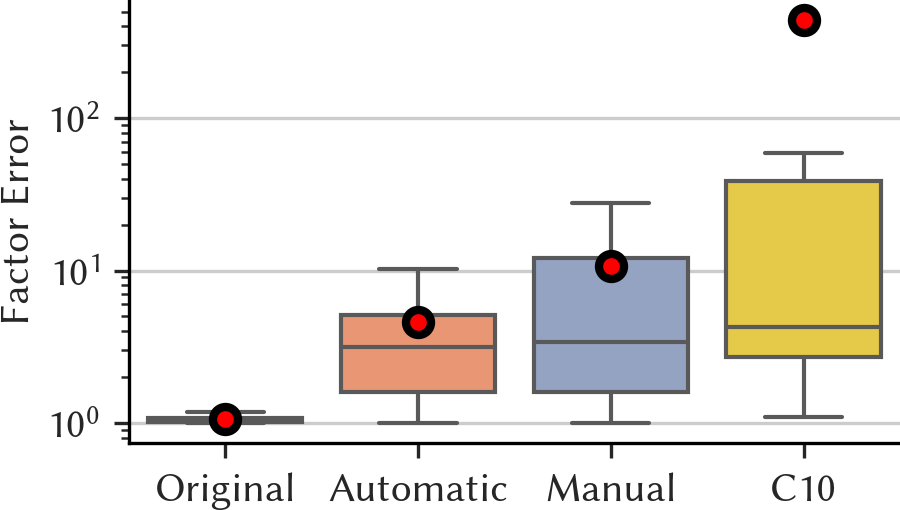

default  nts_b10_r15721  sts_b10_r15721  \
0     1.006591        1.359567        1.753792   
1     1.028080        1.369463        1.766397   
2     1.002755        1.345601        1.735618   
3     1.005398        1.330217        1.715965   
4     1.019333        1.351049        1.742842   
...        ...             ...             ...   
3800  1.038875        2.160161        1.395172   
3801  1.039306        2.675602        1.663313   
3802  1.011034        2.214101        1.340072   
3803  1.039427        2.157863        1.393416   
3804  1.019040        2.288034        1.477051   

      bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721  
0                                        2.720946  
1                                        3.682752  
2                                        3.737970  
3                                        5.508196  
4                                        2.855101  
...                                           ...  
3800                                     4.829642  
3801                                     4.948737  
3802                                     4.846146  
3803                                     1.934432  
3804                                     5.114628  

[3805 rows x 4 columns]

default
Mean Factor Error:  1.0567495384580825
Median Factor Error:  1.0363088708821344
nts_b10_r15721
Mean Factor Error:  4.607870630027173
Median Factor Error:  3.129370316793538
sts_b10_r15721
Mean Factor Error:  10.740013328308656
Median Factor Error:  3.3941173801521454
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721
Mean Factor Error:  439.13820015314275
Median Factor Error:  4.229079666084565


R <= 1.1  1.1 < R < 2  2 < R < 5  \
default                                      0.821813     0.178187   0.000000   
nts_b10_r15721                               0.087516     0.295926   0.351905   
sts_b10_r15721                               0.022339     0.343495   0.288830   
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721  0.000526     0.124836   0.447306   

                                               R >= 5  
default                                      0.000000  
nts_b10_r15721                               0.264652  
sts_b10_r15721                               0.345335  
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721  0.427332

R <= 1.1  1.1 < R < 2  2 < R < 5  \
default                                            82           18          0   
nts_b10_r15721                                      9           30         35   
sts_b10_r15721                                      2           34         29   
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721         0           12         45   

                                             R >= 5  
default                                           0  
nts_b10_r15721                                   26  
sts_b10_r15721                                   35  
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721      43

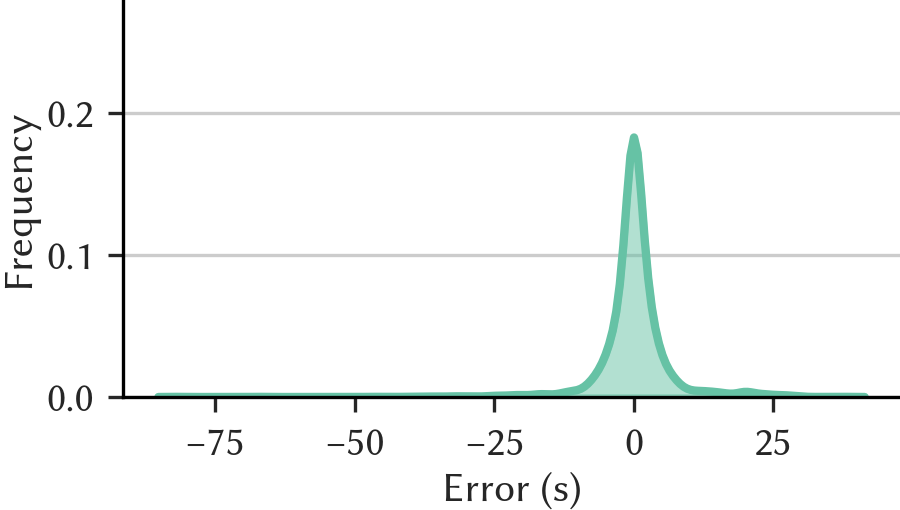

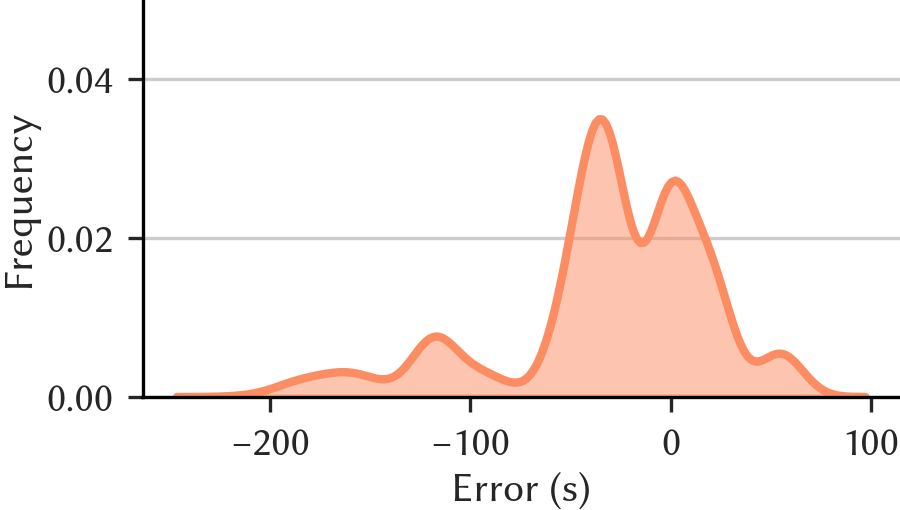

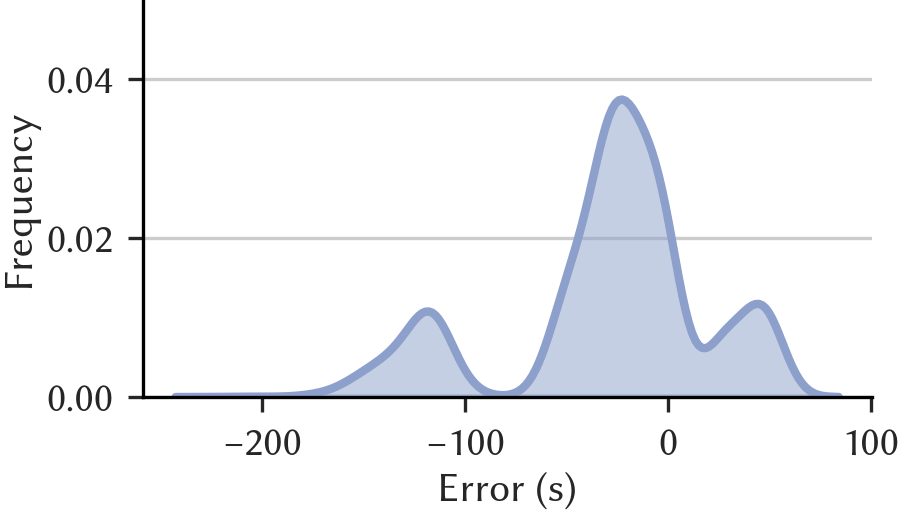

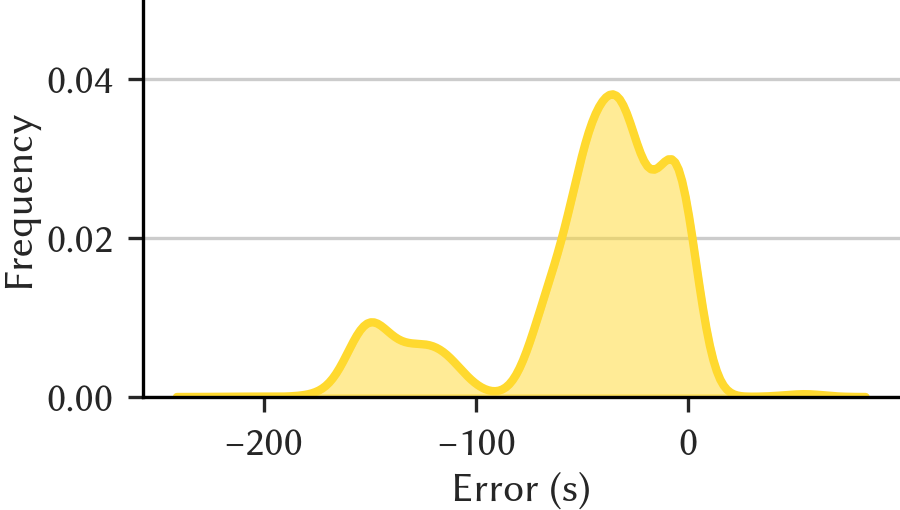

MAE (s)


default                                         3.343730
nts_b10_r15721                                 42.861560
sts_b10_r15721                                 41.992168
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721    48.695840
dtype: float64

['Original', 'Automatic', 'Manual', 'C10']


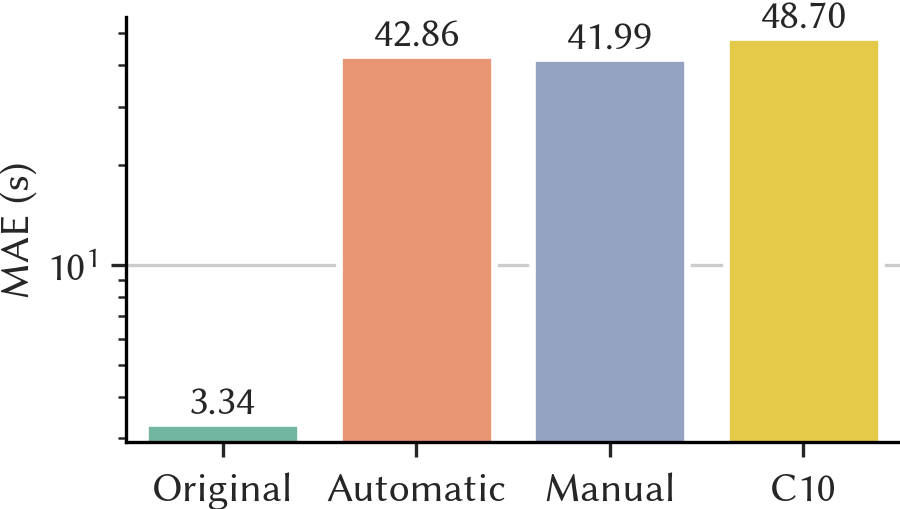

Median AE (s)


default                                         1.606025
nts_b10_r15721                                 30.974699
sts_b10_r15721                                 29.680575
bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721    36.838779
dtype: float64

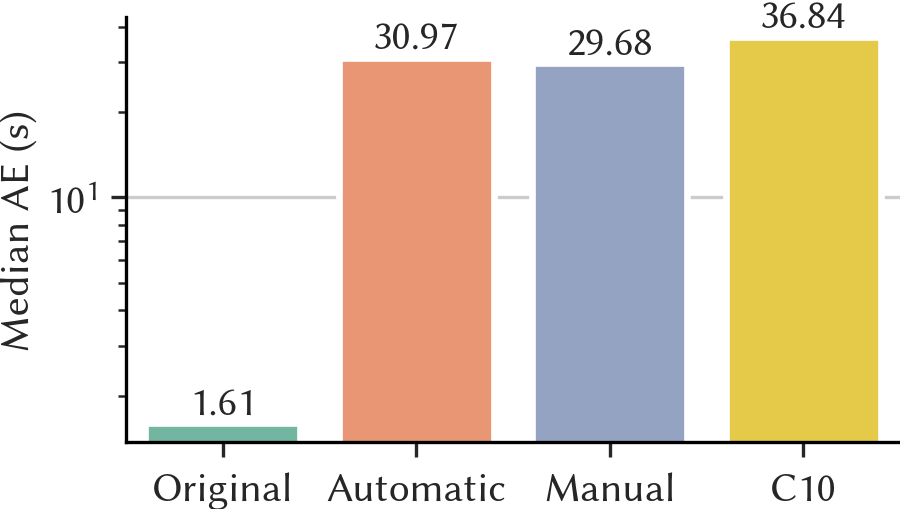

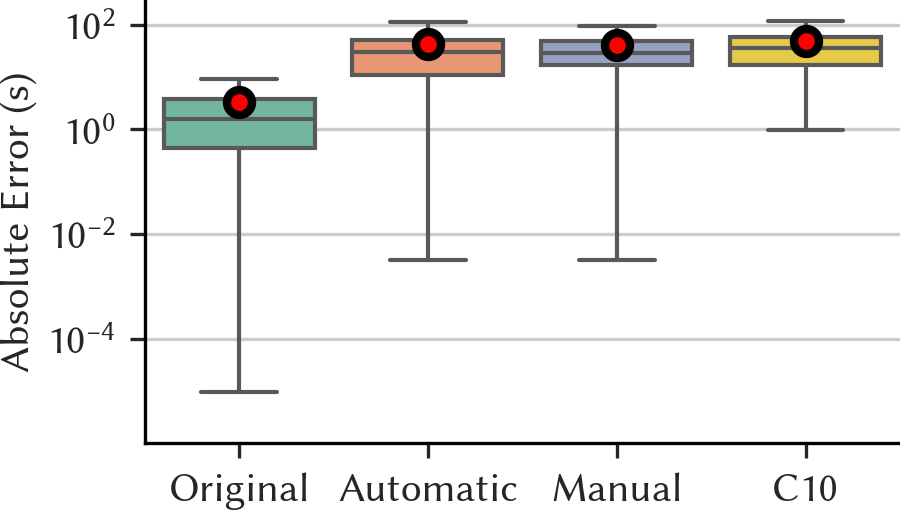

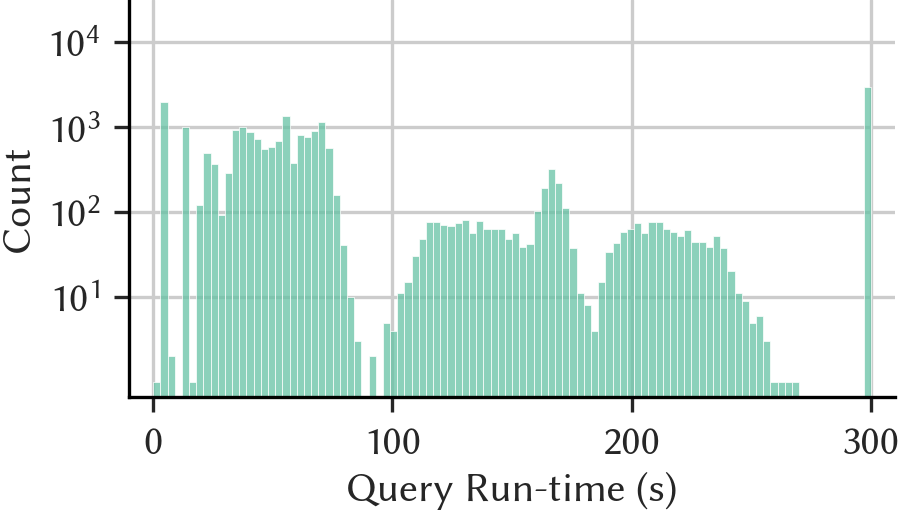

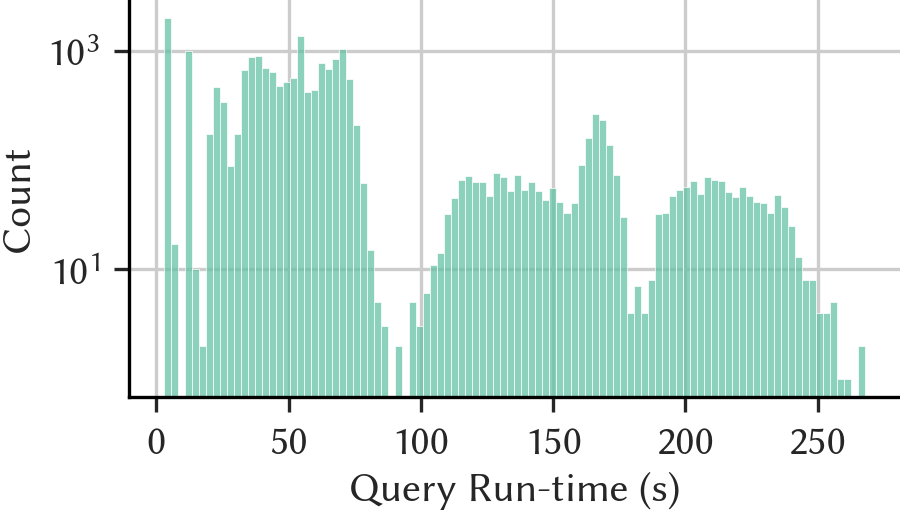

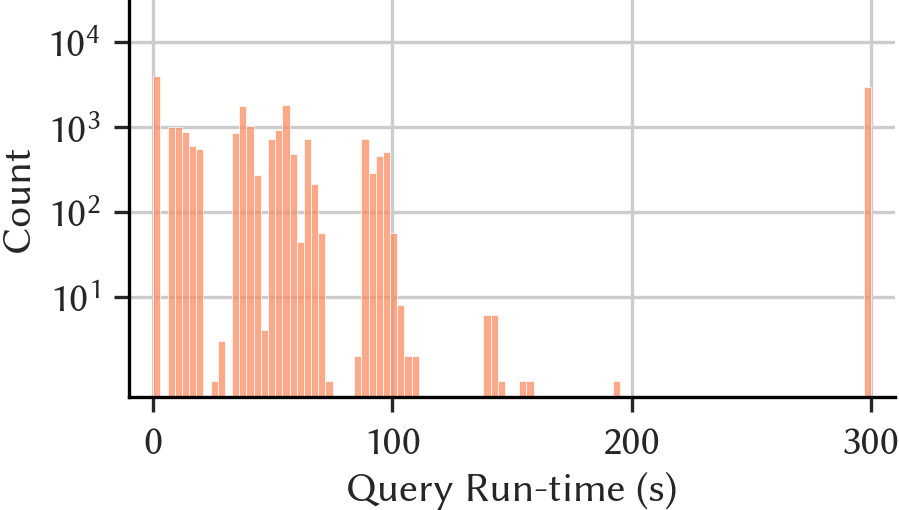

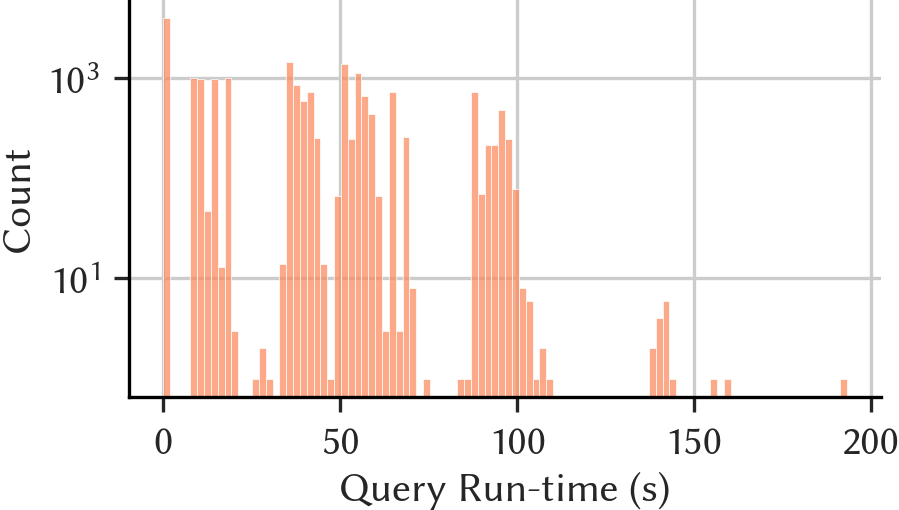

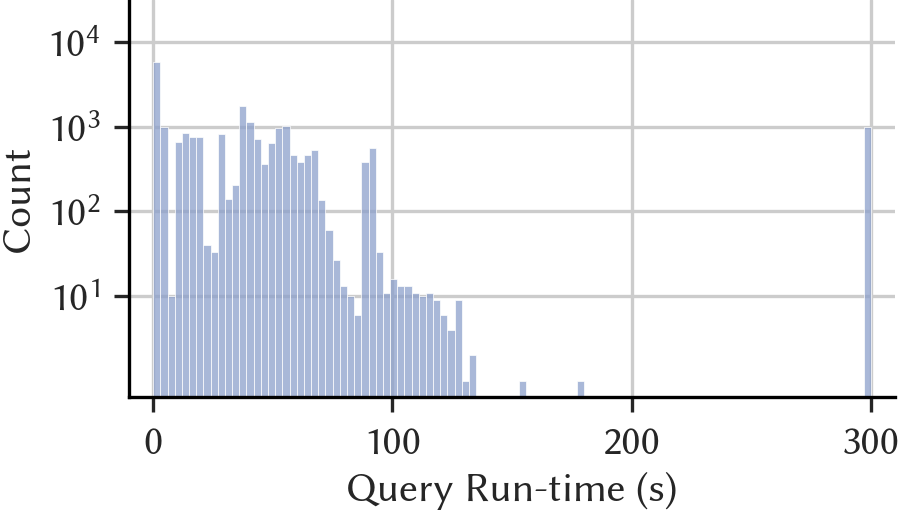

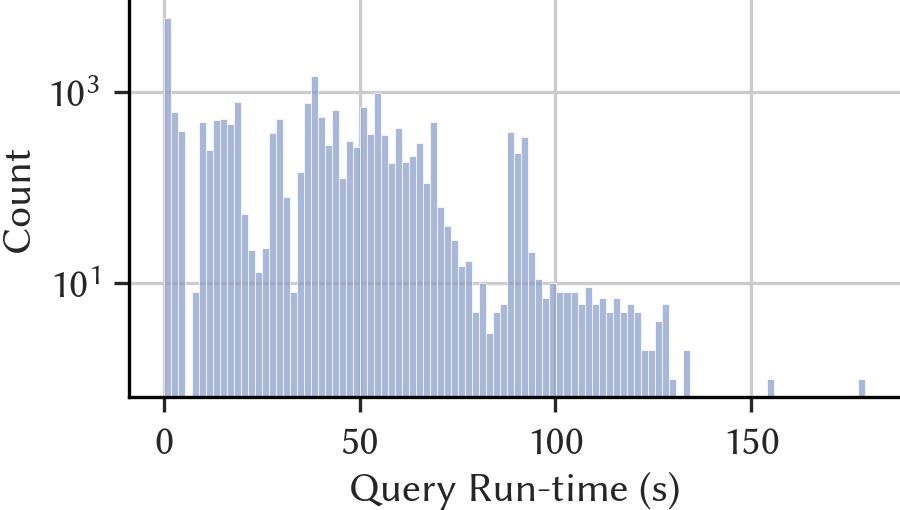

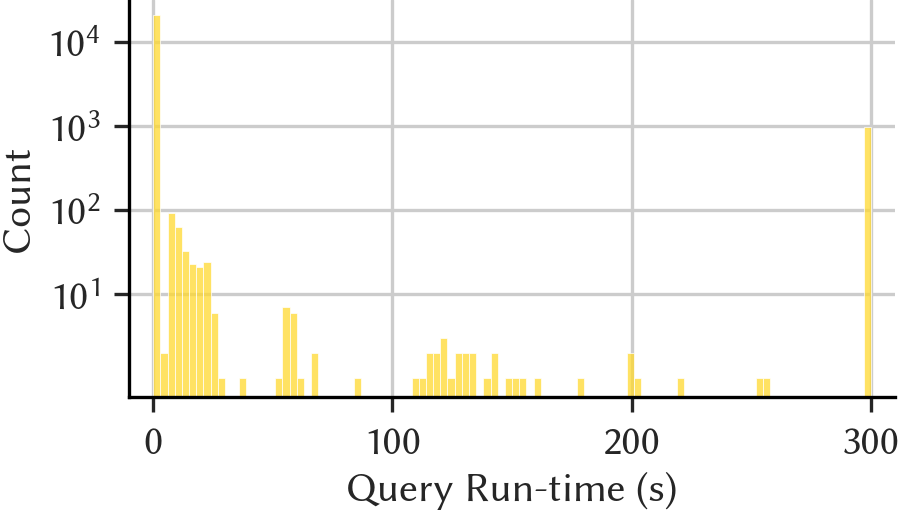

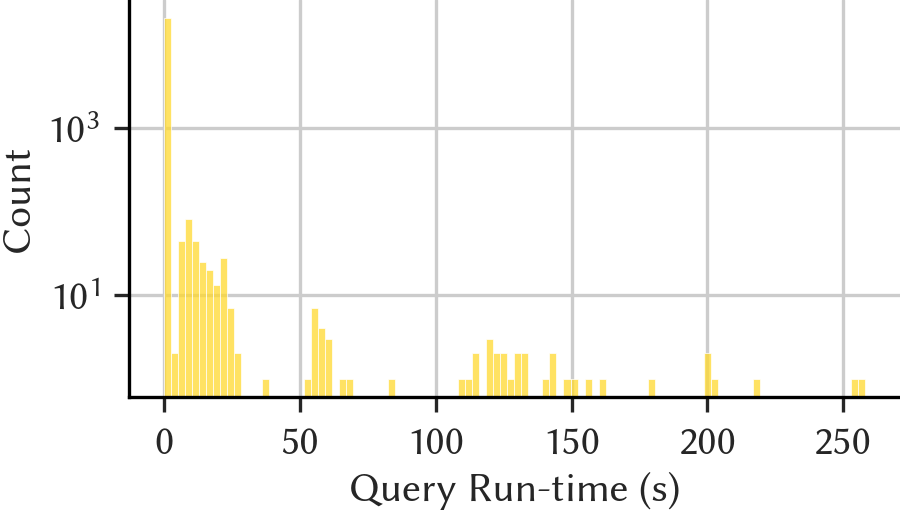

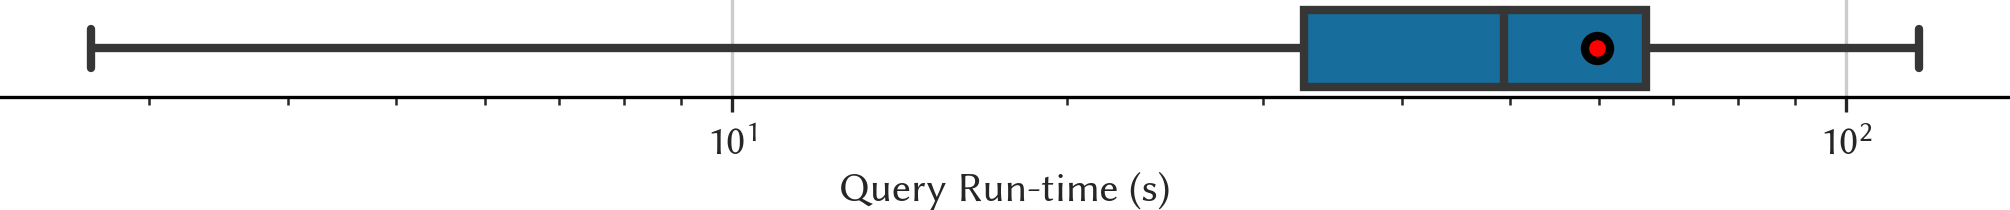

tpch_sf_10
rqs_df


Query   Seed  bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0       1-1  15723                                     1320.965   
1       1-1  15724                                     1322.361   
2       1-1  15725                                     1324.088   
3       1-1  15726                                     1322.425   
4       1-1  15727                                     1318.365   
...     ...    ...                                          ...   
21993   9-1  16716                                      363.924   
21994   9-1  16717                                      365.423   
21995   9-1  16718                                       81.491   
21996   9-1  16719                                       84.389   
21997   9-1  16720                                       83.849   

       bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                          8556.996   
1                                          8552.083   
2                                          8549.571   
3                                          8512.670   
4                                          8503.888   
...                                             ...   
21993                                      3320.751   
21994                                      5116.570   
21995                                      3347.162   
21996                                      3341.013   
21997                                      3332.419   

       bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
21993                                           1.0   
21994                                           1.0   
21995                                           1.0   
21996                                           1.0   
21997                                           1.0   

       bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                          8428.182   
1                                             0.000   
2                                             0.000   
3                                          8585.578   
4                                             0.000   
...                                             ...   
21993                                         1.000   
21994                                         1.000   
21995                                         1.000   
21996                                         1.000   
21997                                         1.000   

       bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                         1355.024   
1                                            0.000   
2                                            0.000   
3                                         1355.536   
4                                            0.000   
...                                            ...   
21993                                        1.000   
21994                                        0.000   
21995                                        1.000   
21996                                        1.000   
21997                                        0.000   

       bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  \
0                                          8447.787   
1                                             0.000   
2                                             0.000   
3                                          8479.459   
4                                             0.000   
...                                             ...   
21993                                         1.000   
21994                                         0.000   
21995                                         1.000   
21996              

pqs_df


Query   Seed  Operator Time  \
0      1-1  15721          7.674   
1      1-1  15723          8.106   
2      1-1  15724          7.986   
3      1-1  15729          8.132   
4      1-1  15735          8.190   
...    ...    ...            ...   
4395   9-1  16683          3.079   
4396   9-1  16691          3.069   
4397   9-1  16703          2.975   
4398   9-1  16708          2.960   
4399   9-1  16709          4.849   

      Predicted_bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0                                              1.267247       
1                                              1.280887       
2                                              1.288864       
3                                              1.267978       
4                                              1.254469       
...                                                 ...       
4395                                           0.311180       
4396                                           0.310307       
4397                                           0.310532       
4398                                           0.309938       
4399                                           0.075462       

      Predicted_bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                              7.877511        
1                                              8.009992        
2                                              7.974811        
3                                              7.869820        
4                                              7.919933        
...                                                 ...        
4395                                           3.038704        
4396                                           3.032281        
4397                                           3.021178        
4398                                           3.029224        
4399                                           5.054270        

      Predicted_bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                              7.818003        
1                                              6.427473        
2                                              6.427473        
3                                              6.427473        
4                                              6.427473        
...                                                 ...        
4395                                           2.063515        
4396                                           2.747115        
4397                                           2.792391        
4398                                           2.784775        
4399                                           1.651270        

      Predicted_bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                              7.673443        
1                                              7.911766        
2                                              7.965259        
3                                              7.814164        
4                                              7.781407        
...                                                 ...        
4395                                           2.902299        
4396                                           2.857508        
4397                                           2.910315        
4398                                           2.887650        
4399                                           4.440726        

      Predicted_bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                              1.228740       
1                                              1.250592       
2                                              1.243632       
3                                              1.228573       
4                                              1.218707       
...                                                 ...       
4395                                           0.284842       
4396

Run-time (ms):  [126362008.64600001, 3413789.94, 107078250.649, 2421774.545]
Mean default run-time (ms):  5744.249870260934
std default run-time (ms):  8419.942115353868
Median default run-time (ms):  2388.1855
tpch_sf_10 configs_hack=None eval numbers
['Original', 'MA', 'µA', 'Combined'] [126362.00864600002, 3413.78994, 107078.25064900001, 2421.7745449999998]
Original  speedup (x): 1.0
MA  speedup (x): 37.015168146520466
µA  speedup (x): 1.180090334686282
Combined  speedup (x): 52.17744521548765


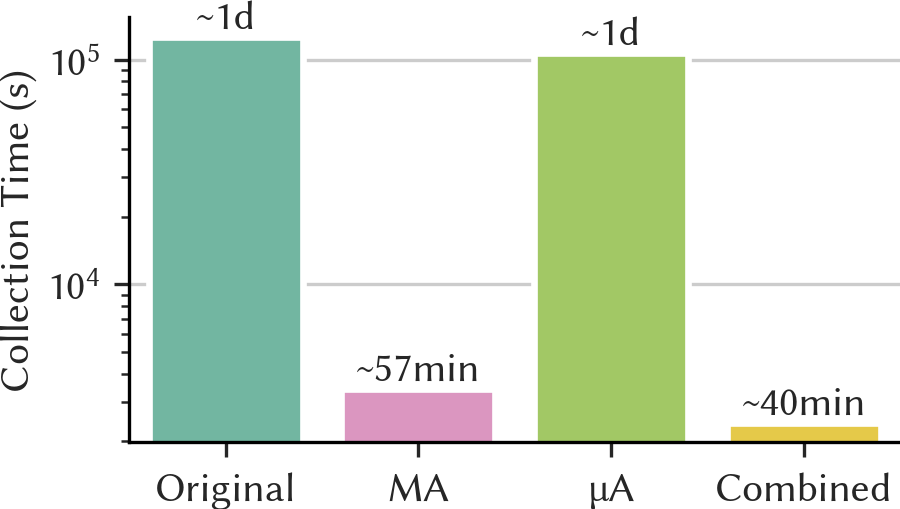

Factor Error


default  bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0     1.042577                                      1.000073   
1     1.005143                                      1.024550   
2     1.016900                                      1.002604   
3     1.028123                                      1.040674   
4     1.033642                                      1.052509   
...        ...                                           ...   
4395  1.001031                                      1.060883   
4396  1.003488                                      1.074013   
4397  1.027667                                      1.022226   
4398  1.034203                                      1.025055   
4399  1.023688                                      1.091938   

      bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         1.026520   
1                                         1.011986   
2                                         1.001403   
3                                         1.033315   
4                                         1.034100   
...                                            ...   
4395                                      1.013261   
4396                                      1.012109   
4397                                      1.015522   
4398                                      1.023387   
4399                                      1.042332   

      bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  
0                                         1.015405  
1                                         1.018279  
2                                         1.027460  
3                                         1.046338  
4                                         1.048995  
...                                            ...  
4395                                      1.081114  
4396                                      1.032315  
4397                                      1.055196  
4398                                      1.002587  
4399                                      1.100656  

[4400 rows x 4 columns]

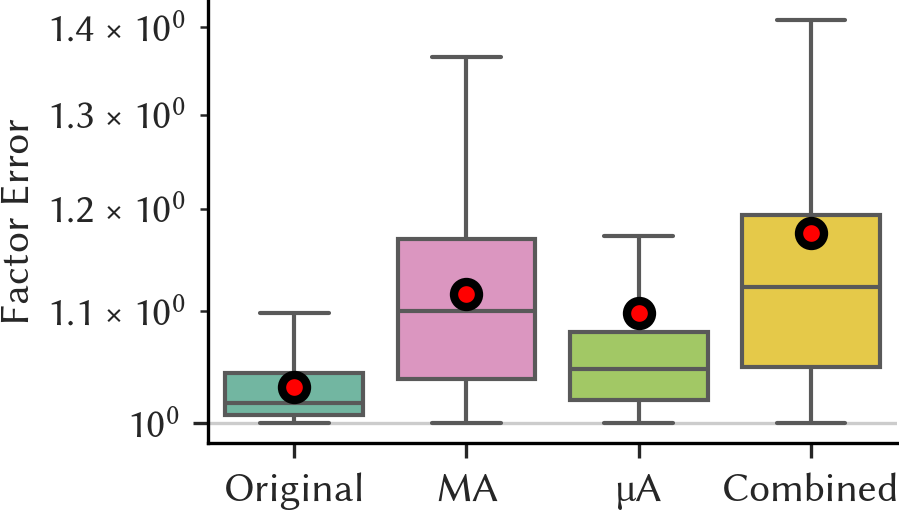

default  bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0     1.042577                                      1.000073   
1     1.005143                                      1.024550   
2     1.016900                                      1.002604   
3     1.028123                                      1.040674   
4     1.033642                                      1.052509   
...        ...                                           ...   
4395  1.001031                                      1.060883   
4396  1.003488                                      1.074013   
4397  1.027667                                      1.022226   
4398  1.034203                                      1.025055   
4399  1.023688                                      1.091938   

      bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         1.026520   
1                                         1.011986   
2                                         1.001403   
3                                         1.033315   
4                                         1.034100   
...                                            ...   
4395                                      1.013261   
4396                                      1.012109   
4397                                      1.015522   
4398                                      1.023387   
4399                                      1.042332   

      bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  
0                                         1.015405  
1                                         1.018279  
2                                         1.027460  
3                                         1.046338  
4                                         1.048995  
...                                            ...  
4395                                      1.081114  
4396                                      1.032315  
4397                                      1.055196  
4398                                      1.002587  
4399                                      1.100656  

[4400 rows x 4 columns]

default
Mean Factor Error:  1.0312438263415262
Median Factor Error:  1.0171935148311844
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721
Mean Factor Error:  1.1159914059751488
Median Factor Error:  1.1003408822553764
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721
Mean Factor Error:  1.0979053004045591
Median Factor Error:  1.046749519384183
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721
Mean Factor Error:  1.1758826354131773
Median Factor Error:  1.1224420599495124


R <= 1.1  1.1 < R < 2  \
default                                       0.944318     0.055682   
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  0.499545     0.500455   
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  0.829773     0.170227   
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  0.435909     0.550000   

                                              2 < R < 5  R >= 5  
default                                        0.000000     0.0  
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721   0.000000     0.0  
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721   0.000000     0.0  
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721   0.014091     0.0

R <= 1.1  1.1 < R < 2  \
default                                             94            6   
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721        50           50   
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721        83           17   
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721        44           55   

                                              2 < R < 5  R >= 5  
default                                               0       0  
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721          0       0  
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721          0       0  
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721          1       0

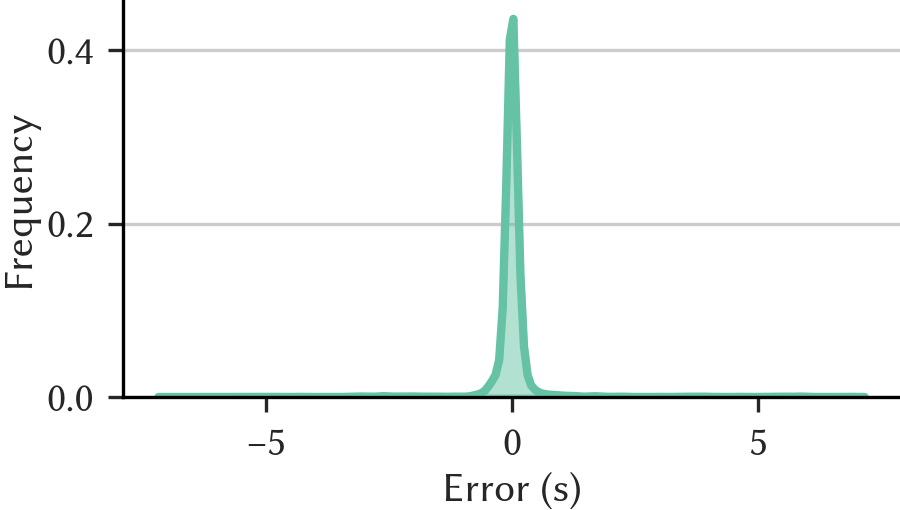

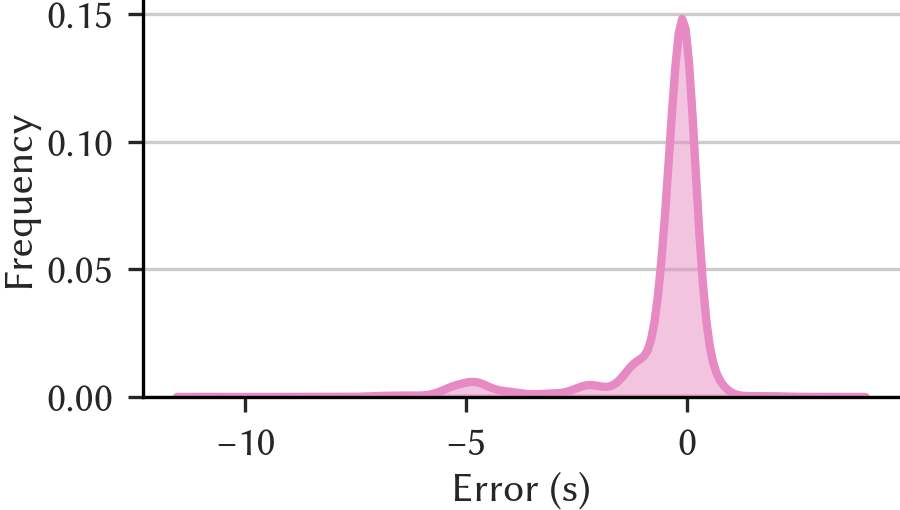

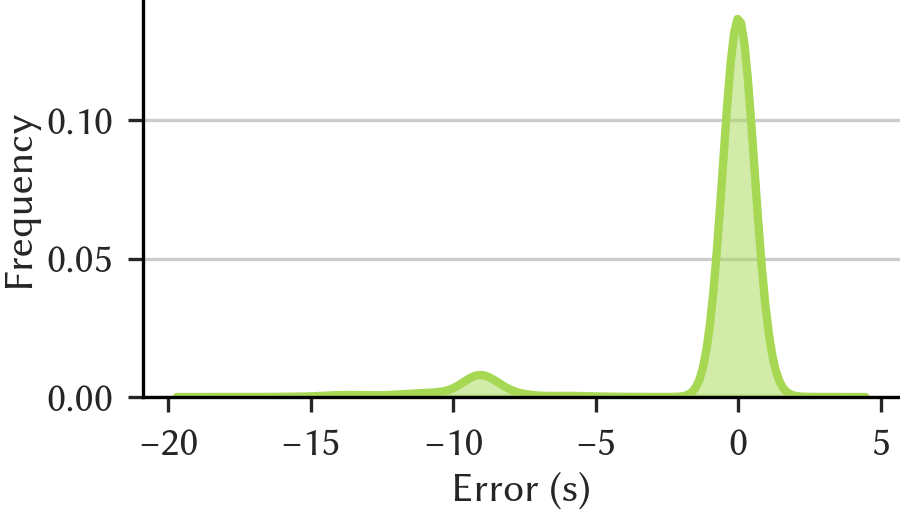

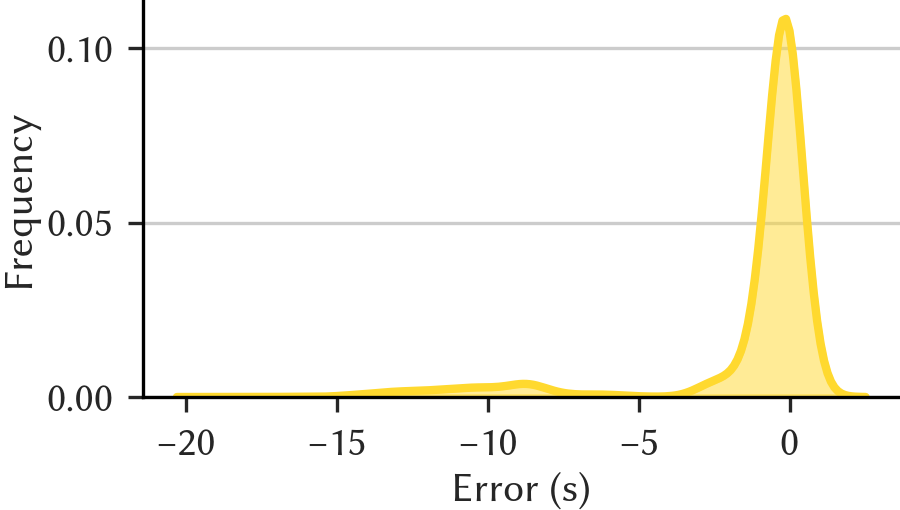

MAE (s)


default                                         0.136508
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721    0.623836
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721    0.982493
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721    1.230681
dtype: float64

['Original', 'MA', 'µA', 'Combined']


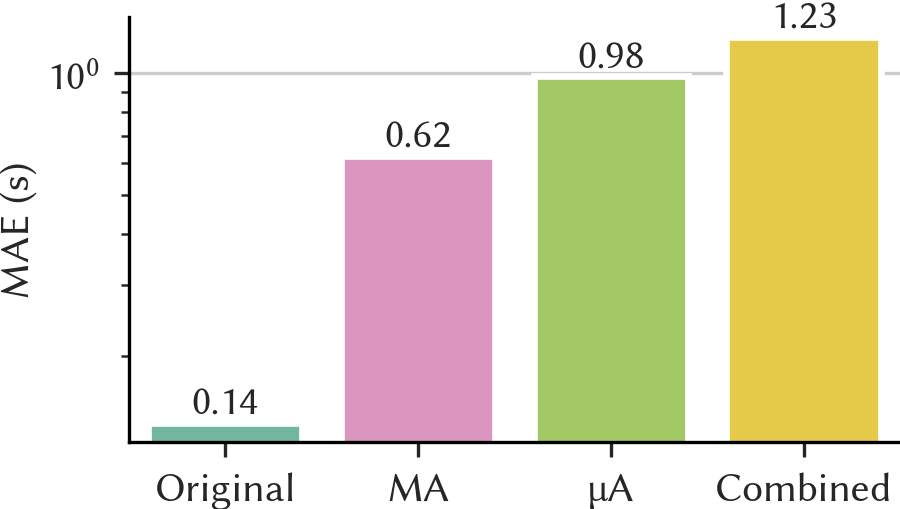

Median AE (s)


default                                         0.039338
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721    0.175019
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721    0.086231
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721    0.173524
dtype: float64

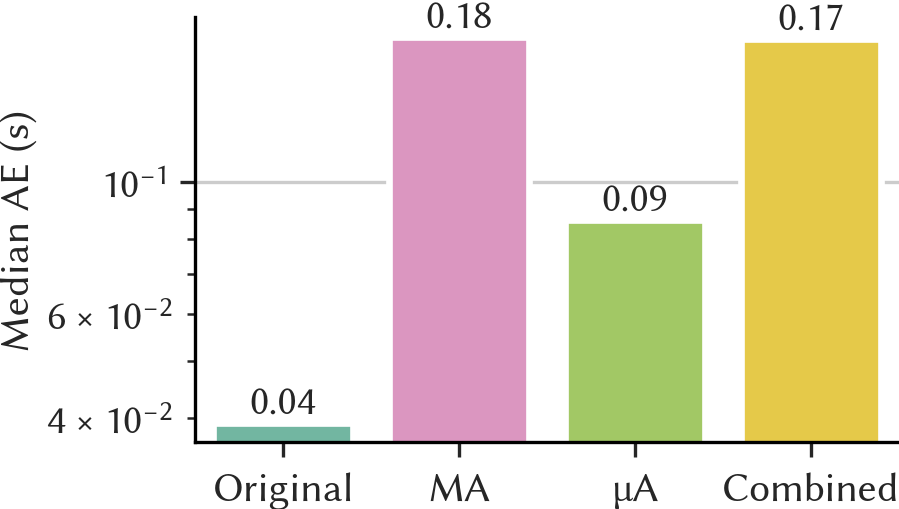

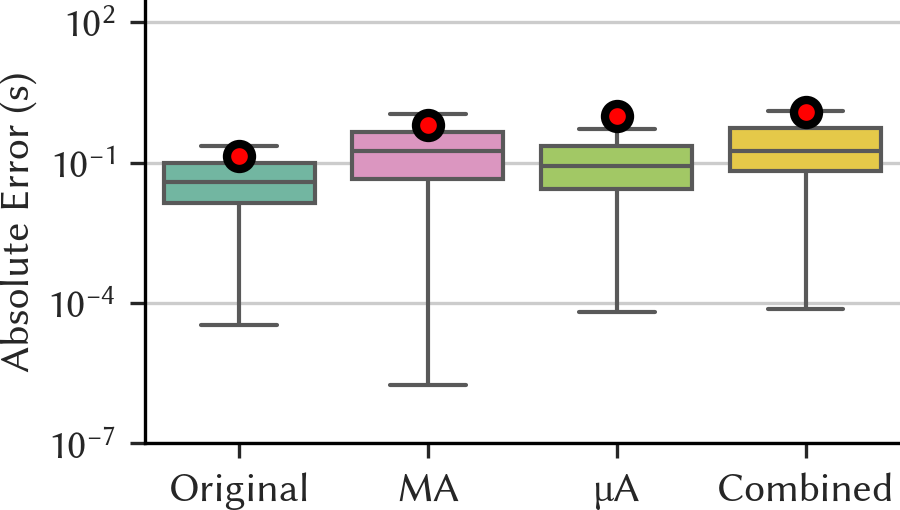

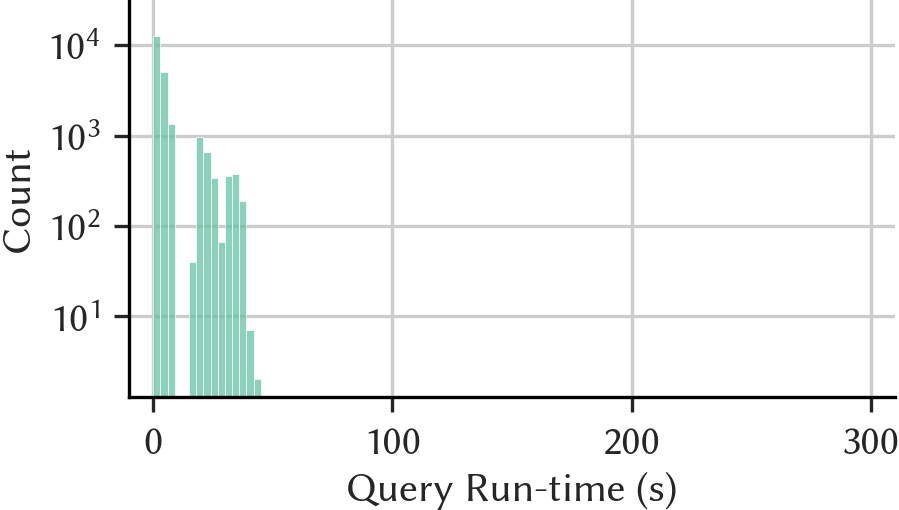

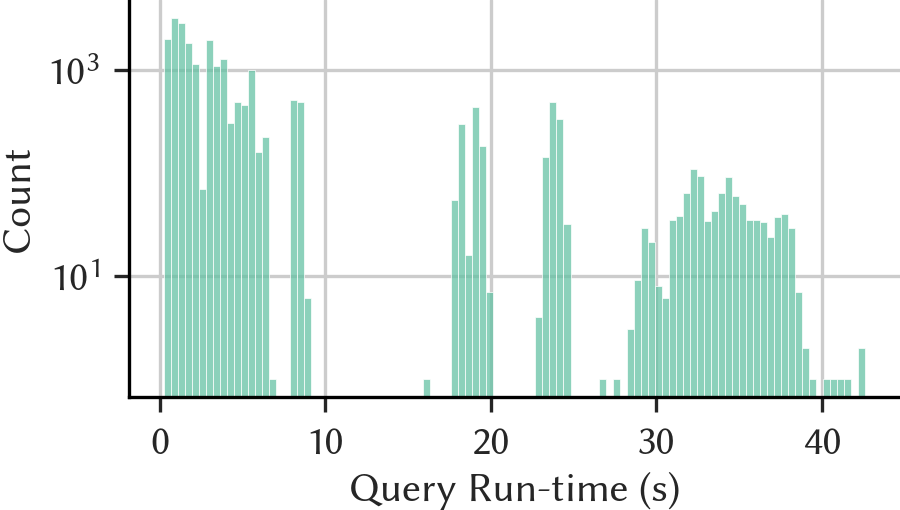

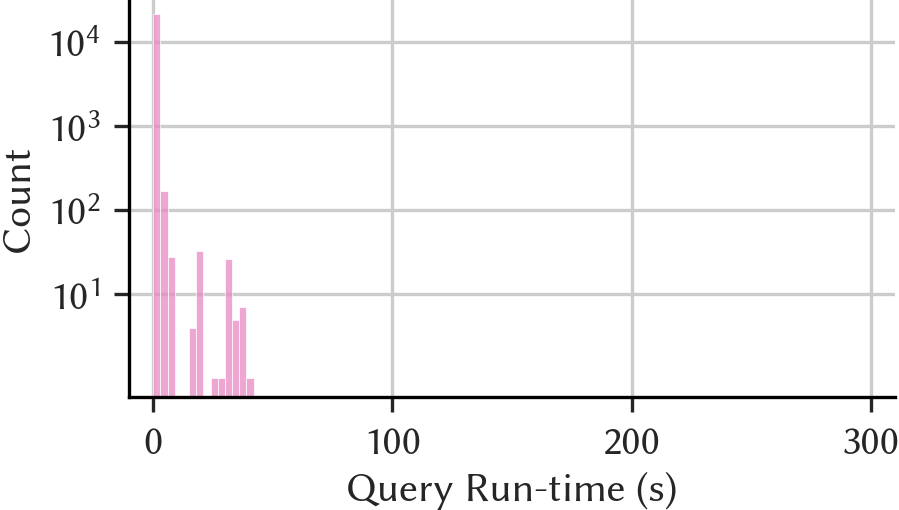

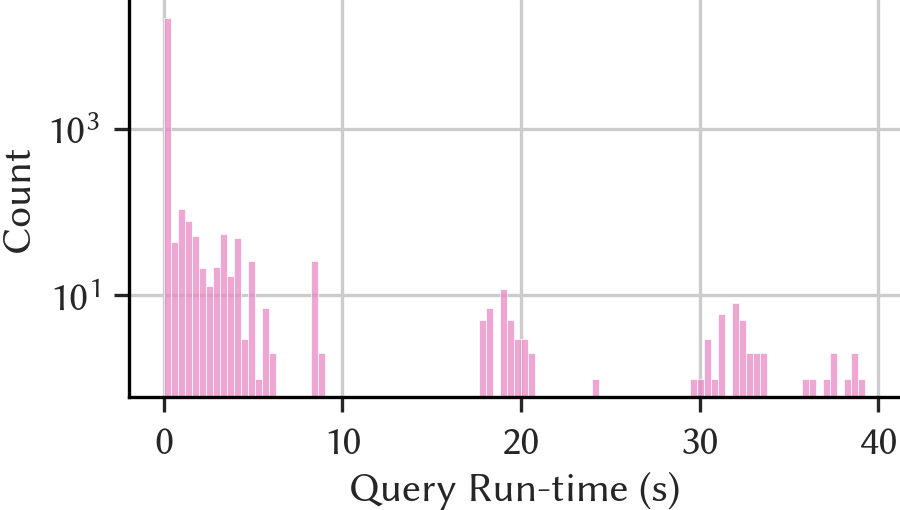

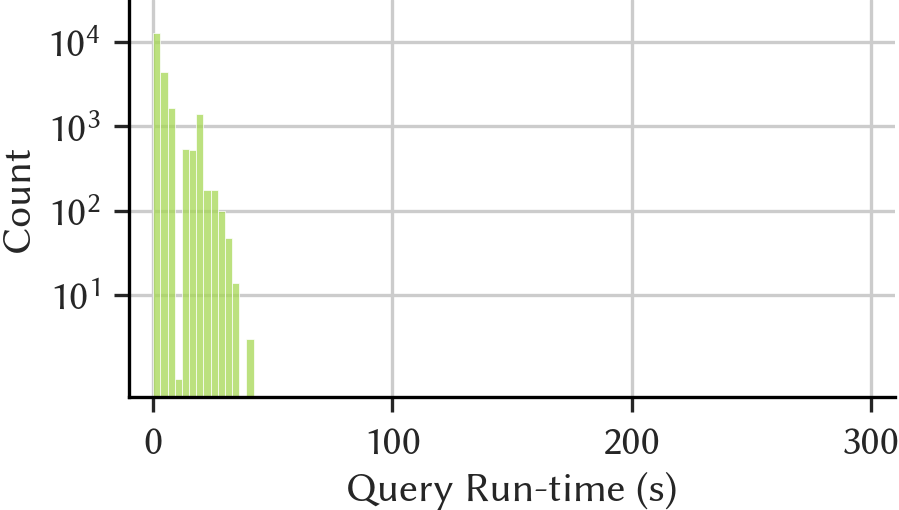

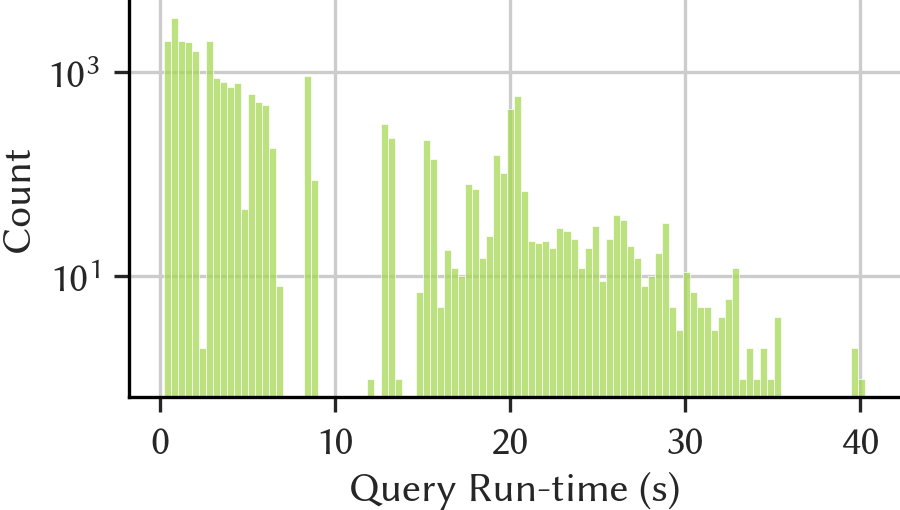

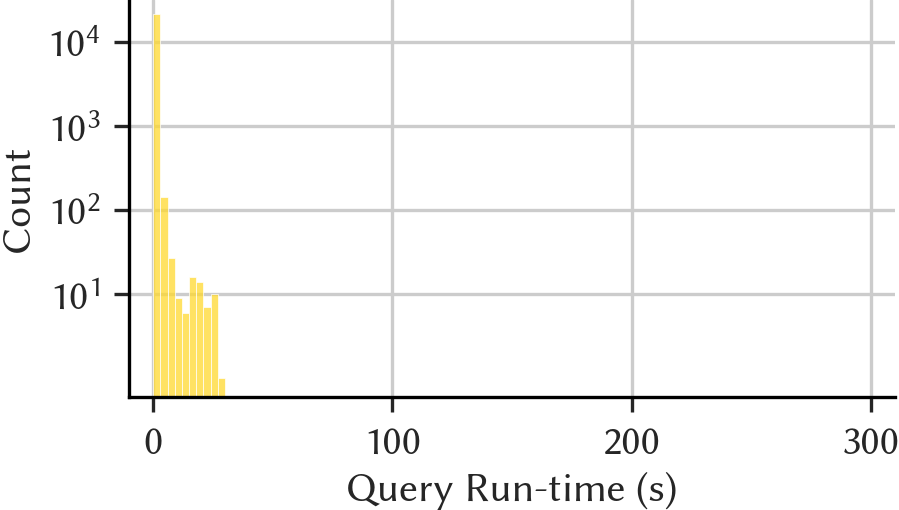

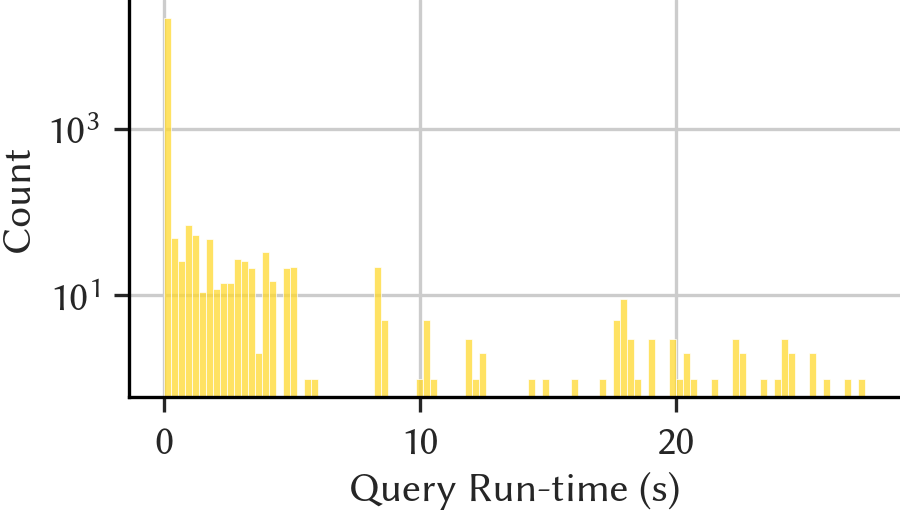

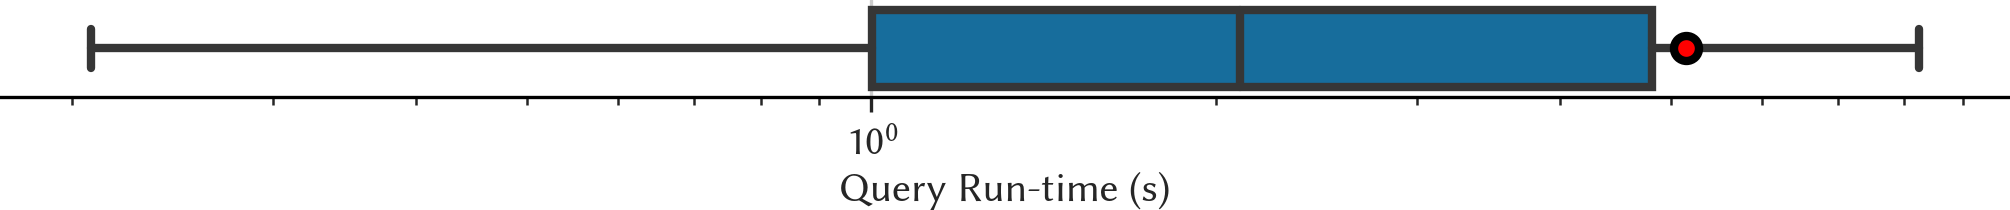

tpch_sf_100
rqs_df


Query   Seed  bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0       1-1  15723                                    15010.848   
1       1-1  15724                                    13217.015   
2       1-1  15725                                    13979.878   
3       1-1  15726                                    13919.986   
4       1-1  15727                                    13913.646   
...     ...    ...                                          ...   
21993   9-1  16716                                    52914.483   
21994   9-1  16717                                    48339.214   
21995   9-1  16718                                    47361.436   
21996   9-1  16719                                    47622.368   
21997   9-1  16720                                    47620.736   

       bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         51397.831   
1                                         57164.526   
2                                         49538.092   
3                                         55713.154   
4                                         62865.045   
...                                             ...   
21993                                     22895.603   
21994                                     23206.164   
21995                                     26536.352   
21996                                     22462.141   
21997                                     23090.234   

       bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
21993                                           2.0   
21994                                           2.0   
21995                                           2.0   
21996                                           2.0   
21997                                           2.0   

       bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                         71172.549   
1                                             2.000   
2                                             0.000   
3                                         71961.938   
4                                             2.000   
...                                             ...   
21993                                         2.000   
21994                                         2.000   
21995                                         2.000   
21996                                         2.000   
21997                                         2.000   

       bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                        12765.244   
1                                            0.000   
2                                            0.000   
3                                        13430.562   
4                                            3.000   
...                                            ...   
21993                                        2.000   
21994                                        1.000   
21995                                        1.000   
21996                                        1.000   
21997                                        1.000   

       bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  \
0                                         69485.349   
1                                             0.000   
2                                             0.000   
3                                         77549.908   
4                                             0.000   
...                                             ...   
21993                                     21873.462   
21994                                         1.000   
21995                                         2.000   
21996              

pqs_df


Query   Seed  Operator Time  \
0      1-1  15721         65.942   
1      1-1  15723         65.469   
2      1-1  15724         66.630   
3      1-1  15729         67.398   
4      1-1  15735         66.358   
...    ...    ...            ...   
3800   9-1  16683         59.704   
3801   9-1  16691         56.806   
3802   9-1  16703         60.589   
3803   9-1  16708         59.628   
3804   9-1  16709         63.227   

      Predicted_bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0                                             12.635946       
1                                             12.600019       
2                                             13.126281       
3                                             12.823589       
4                                             12.874330       
...                                                 ...       
3800                                          44.392025       
3801                                           9.754292       
3802                                          43.494835       
3803                                          44.415020       
3804                                          44.351260       

      Predicted_bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                             54.120613        
1                                             57.686974        
2                                             54.223278        
3                                             54.168674        
4                                             53.649990        
...                                                 ...        
3800                                          16.190378        
3801                                          16.676308        
3802                                          16.534310        
3803                                          16.222570        
3804                                          16.190378        

      Predicted_bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                              73.98701        
1                                              73.98701        
2                                              73.98701        
3                                              73.98701        
4                                              73.98701        
...                                                 ...        
3800                                           66.02304        
3801                                           65.08738        
3802                                           66.37268        
3803                                           66.02304        
3804                                           66.02304        

      Predicted_bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                             68.417850        
1                                             67.835380        
2                                             66.923810        
3                                             63.748000        
4                                             68.702934        
...                                                 ...        
3800                                          69.826250        
3801                                          57.750607        
3802                                          70.810165        
3803                                          70.089066        
3804                                          69.826250        

      Predicted_bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                             23.875965       
1                                             24.077300       
2                                             23.907846       
3                                             11.687002       
4                                             23.755684       
...                                                 ...       
3800                                          47.736588       
3801

Run-time (ms):  [2104363495.608, 929967021.419, 948211973.2989998, 316953667.74399996]
Mean default run-time (ms):  95661.5826715156
std default run-time (ms):  94893.01326898289
Median default run-time (ms):  56183.982
tpch_sf_100 configs_hack=None eval numbers
['Original', 'MA', 'µA', 'Combined'] [2104363.495608, 929967.021419, 948211.9732989998, 316953.667744]
Original  speedup (x): 1.0
MA  speedup (x): 2.26283668897961
µA  speedup (x): 2.2192964810247453
Combined  speedup (x): 6.63934104497466


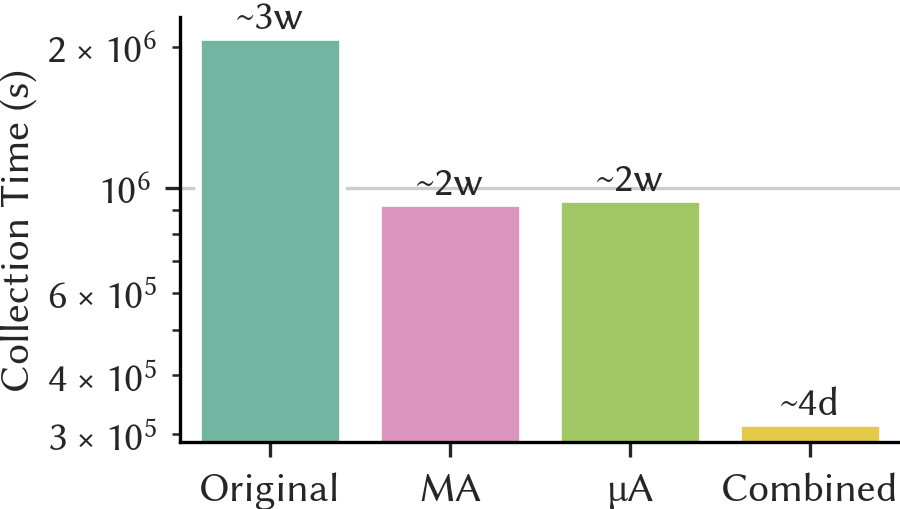

Factor Error


default  bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0     1.006591                                      1.037546   
1     1.028080                                      1.036145   
2     1.002755                                      1.004410   
3     1.005398                                      1.057257   
4     1.019333                                      1.035338   
...        ...                                           ...   
3800  1.038875                                      1.169541   
3801  1.039306                                      1.016629   
3802  1.011034                                      1.168697   
3803  1.039427                                      1.175439   
3804  1.019040                                      1.104374   

      bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         1.218427   
1                                         1.134901   
2                                         1.228808   
3                                         1.244225   
4                                         1.236869   
...                                            ...   
3800                                      3.687622   
3801                                      3.406389   
3802                                      3.664441   
3803                                      3.675620   
3804                                      3.905221   

      bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  
0                                         1.261164  
1                                         1.402505  
2                                         1.404920  
3                                         1.044896  
4                                         1.022914  
...                                            ...  
3800                                      3.800291  
3801                                      4.517593  
3802                                      4.133062  
3803                                      1.062810  
3804                                      4.024538  

[3805 rows x 4 columns]

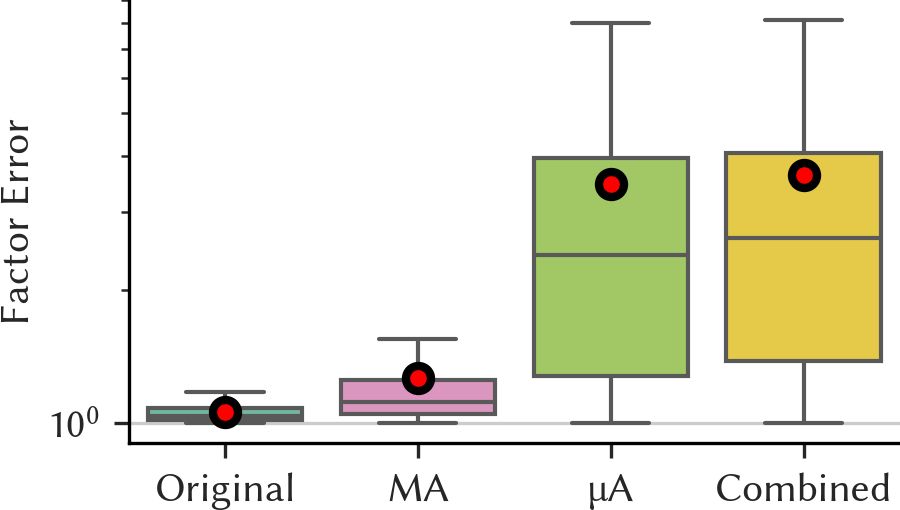

default  bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0     1.006591                                      1.037546   
1     1.028080                                      1.036145   
2     1.002755                                      1.004410   
3     1.005398                                      1.057257   
4     1.019333                                      1.035338   
...        ...                                           ...   
3800  1.038875                                      1.169541   
3801  1.039306                                      1.016629   
3802  1.011034                                      1.168697   
3803  1.039427                                      1.175439   
3804  1.019040                                      1.104374   

      bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         1.218427   
1                                         1.134901   
2                                         1.228808   
3                                         1.244225   
4                                         1.236869   
...                                            ...   
3800                                      3.687622   
3801                                      3.406389   
3802                                      3.664441   
3803                                      3.675620   
3804                                      3.905221   

      bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  
0                                         1.261164  
1                                         1.402505  
2                                         1.404920  
3                                         1.044896  
4                                         1.022914  
...                                            ...  
3800                                      3.800291  
3801                                      4.517593  
3802                                      4.133062  
3803                                      1.062810  
3804                                      4.024538  

[3805 rows x 4 columns]

default
Mean Factor Error:  1.0567495384580825
Median Factor Error:  1.0363088708821344
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721
Mean Factor Error:  1.2657217345666336
Median Factor Error:  1.1158467485837358
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721
Mean Factor Error:  3.4677510016589785
Median Factor Error:  2.393367872962936
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721
Mean Factor Error:  3.6261181682338886
Median Factor Error:  2.619606370149183


R <= 1.1  1.1 < R < 2  \
default                                       0.821813     0.178187   
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  0.454139     0.488830   
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  0.099080     0.366623   
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  0.088568     0.315900   

                                              2 < R < 5    R >= 5  
default                                        0.000000  0.000000  
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721   0.057030  0.000000  
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721   0.331143  0.203154  
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721   0.385020  0.210512

R <= 1.1  1.1 < R < 2  \
default                                             82           18   
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721        45           49   
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721        10           37   
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721         9           32   

                                              2 < R < 5  R >= 5  
default                                               0       0  
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721          6       0  
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721         33      20  
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721         39      21

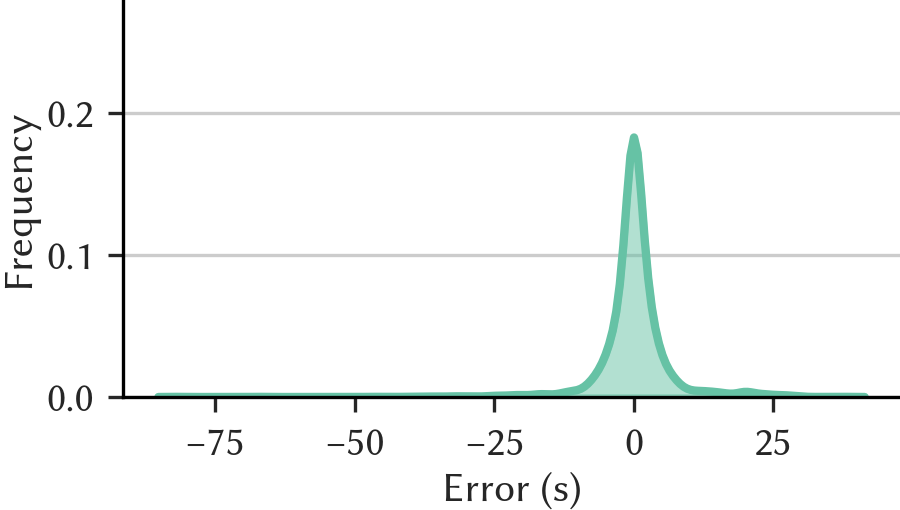

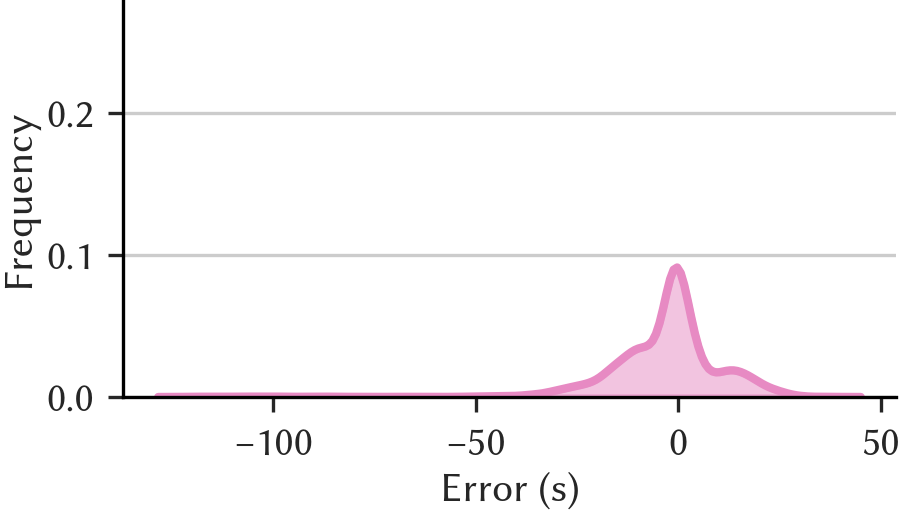

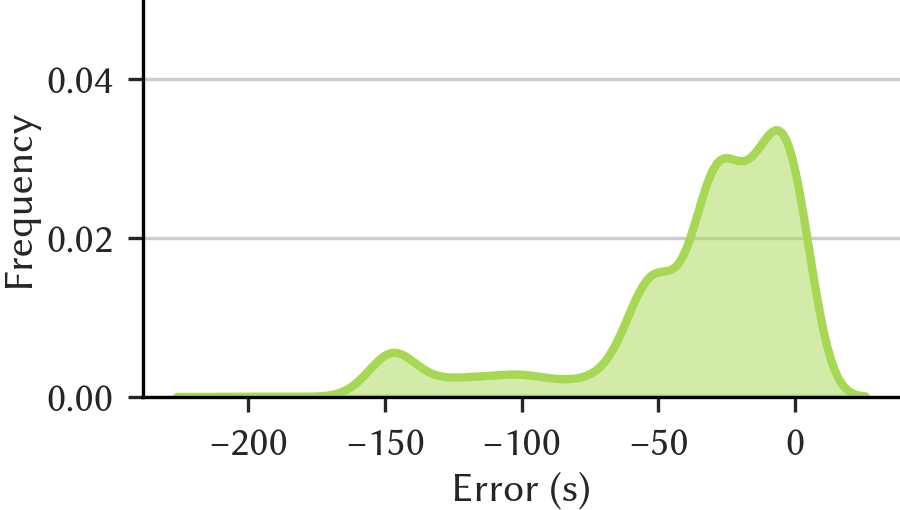

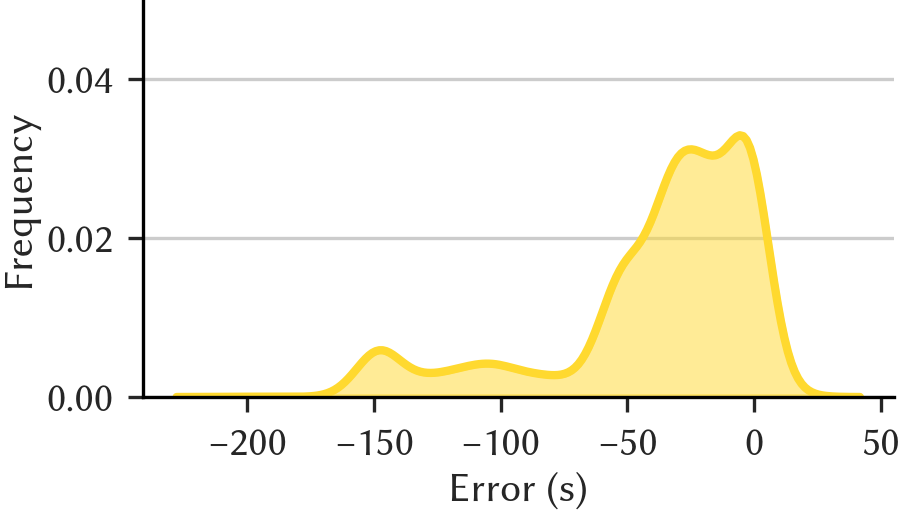

MAE (s)


default                                          3.343730
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721     8.840153
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721    36.821542
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721    38.609099
dtype: float64

['Original', 'MA', 'µA', 'Combined']


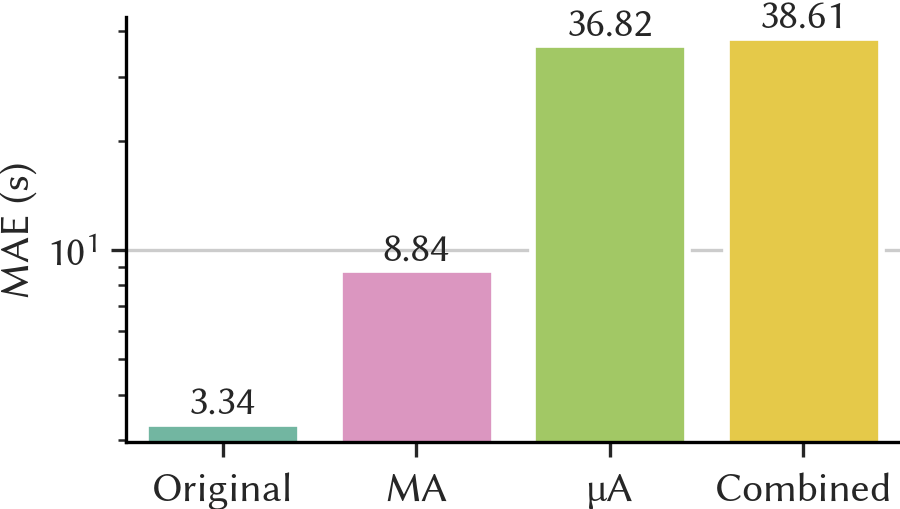

Median AE (s)


default                                          1.606025
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721     5.554757
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721    26.926513
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721    27.495180
dtype: float64

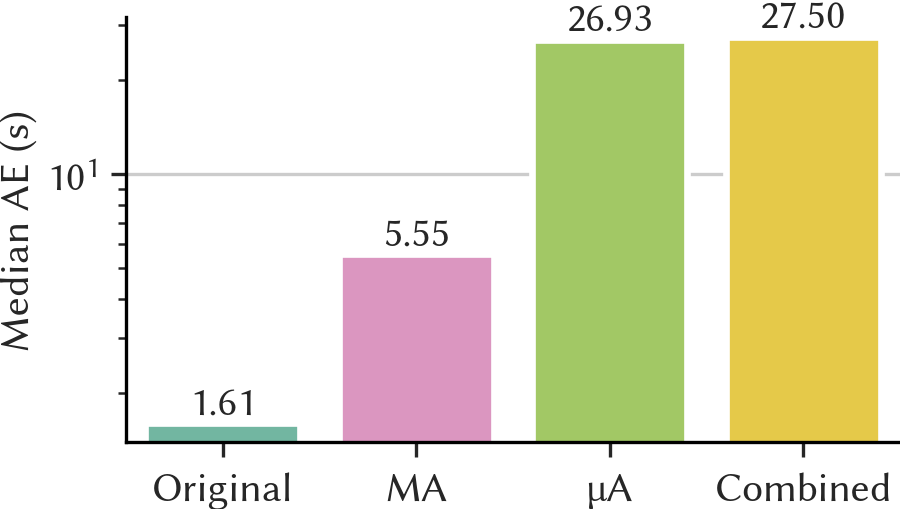

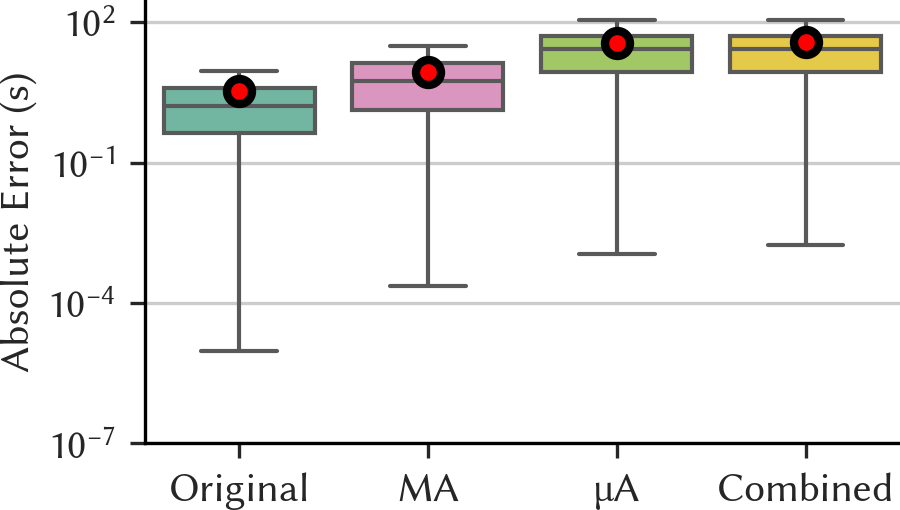

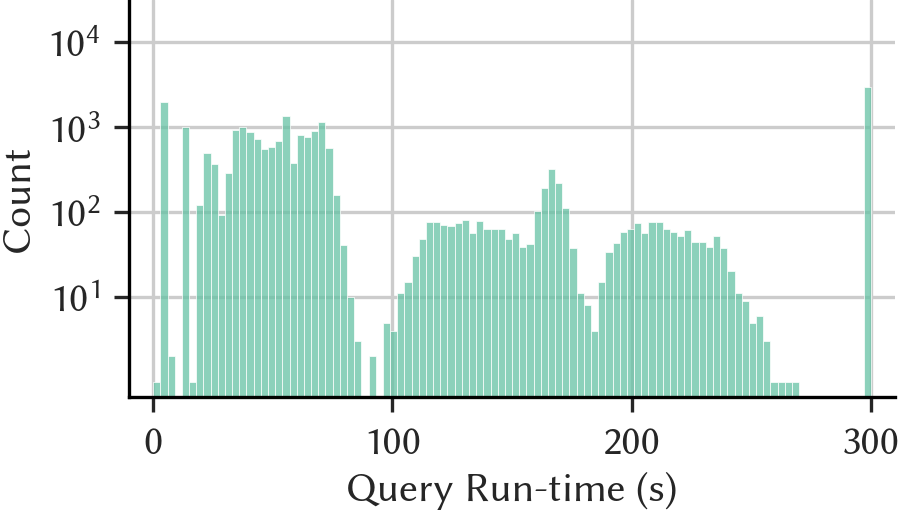

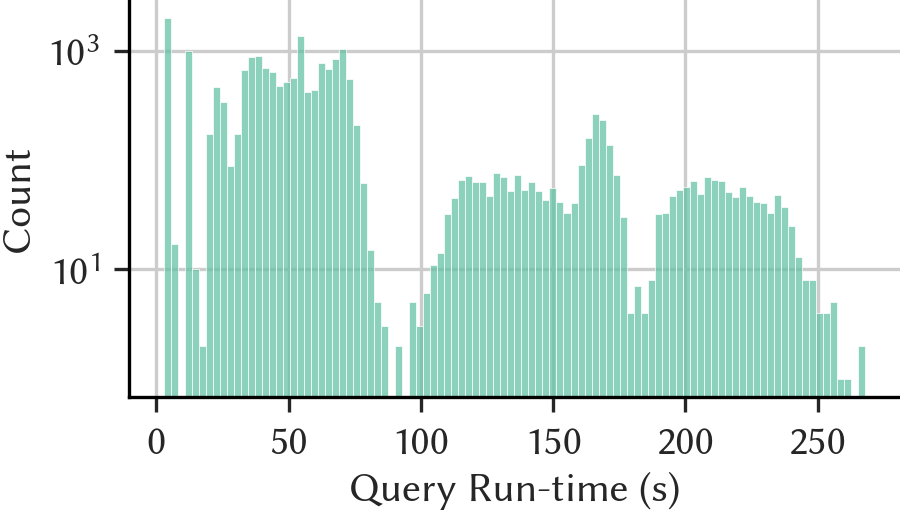

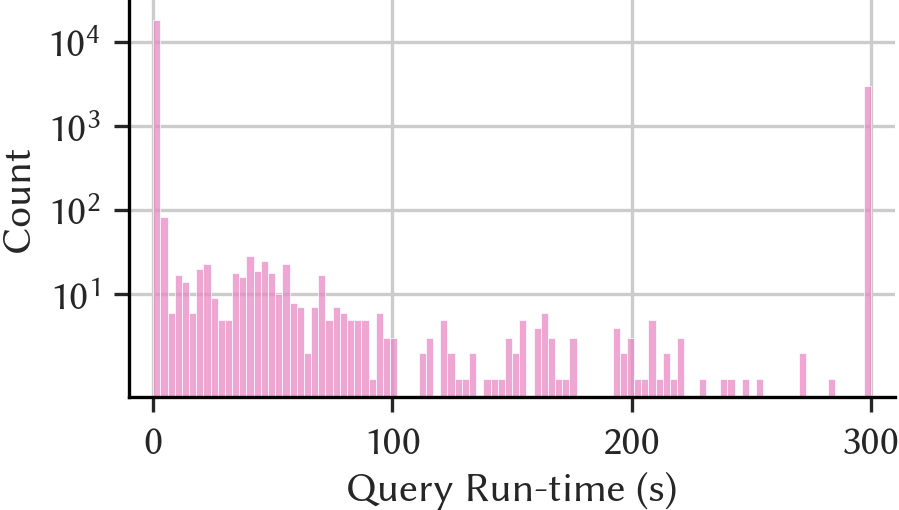

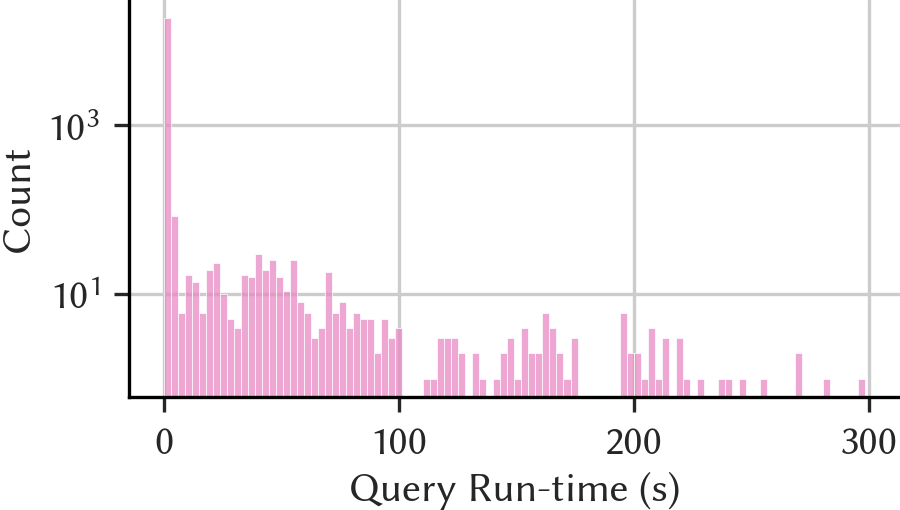

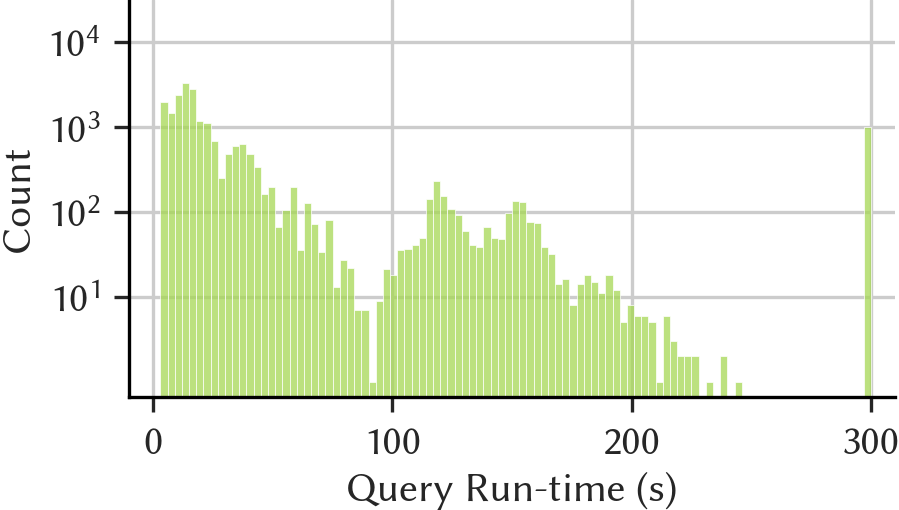

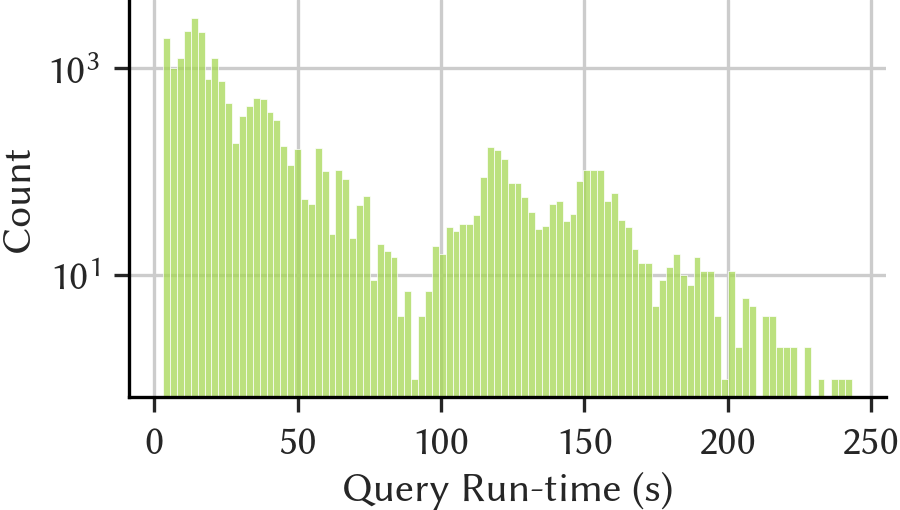

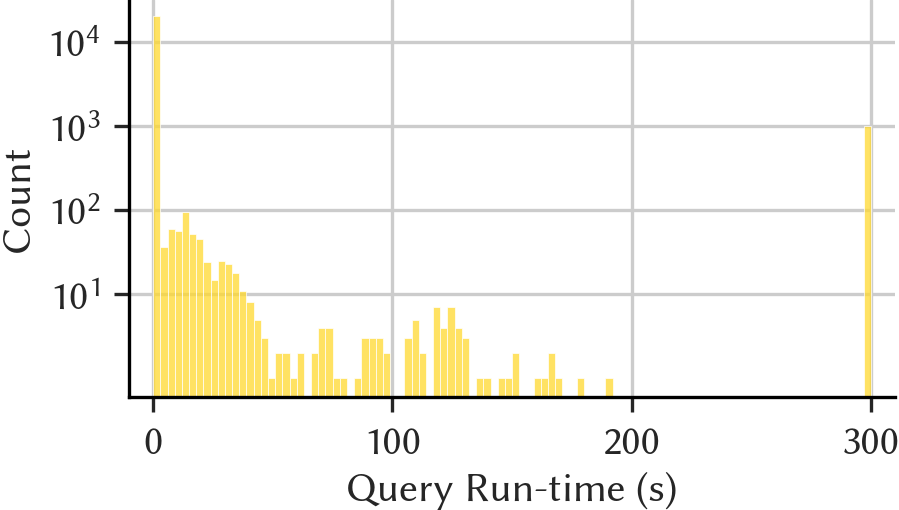

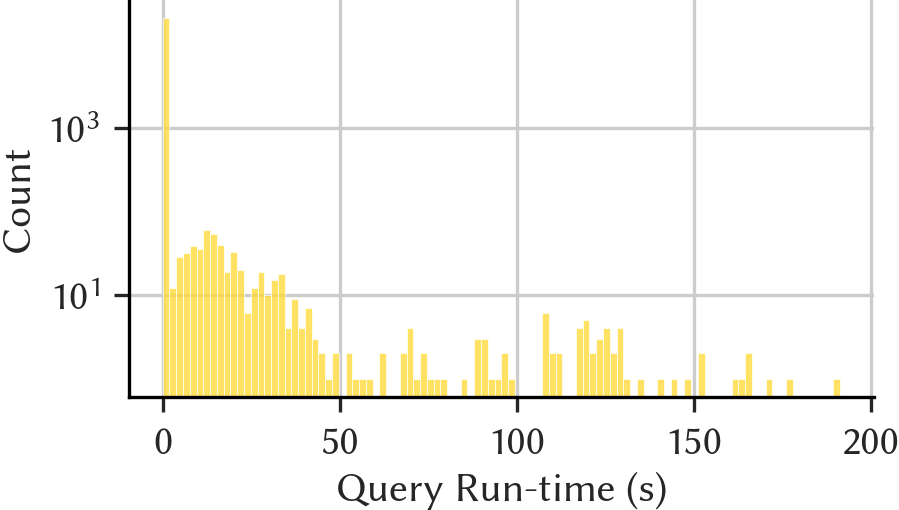

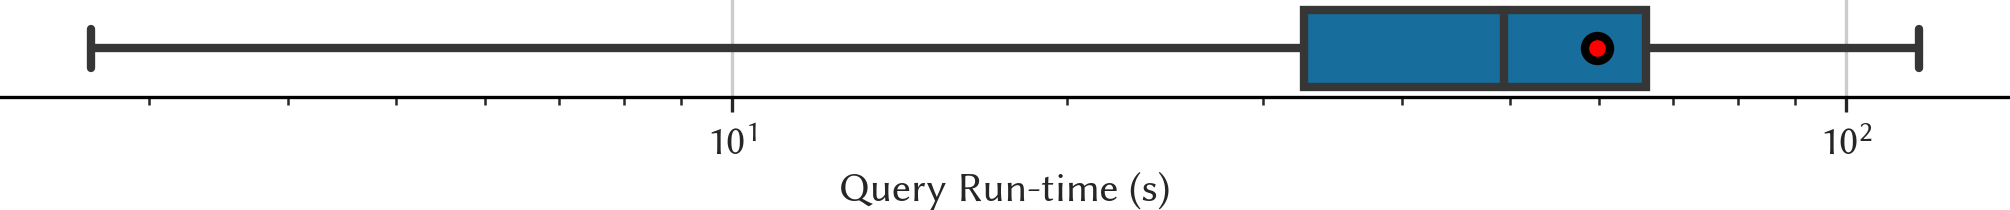

dsb_sf_1
rqs_df


Query   Seed  bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0           query001-1-1  15721                                      134.873   
1           query001-1-1  15722                                          NaN   
2          query001-10-1  15721                                      114.255   
3          query001-10-1  15722                                          NaN   
4          query001-11-1  15721                                       96.339   
...                  ...    ...                                          ...   
10593  query102_spj-97-1  15722                                          NaN   
10594  query102_spj-98-1  15721                                      155.237   
10595  query102_spj-98-1  15722                                          NaN   
10596  query102_spj-99-1  15721                                      156.294   
10597  query102_spj-99-1  15722                                          NaN   

       bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                           136.420   
1                                               NaN   
2                                           112.244   
3                                               NaN   
4                                            96.070   
...                                             ...   
10593                                           NaN   
10594                                       166.568   
10595                                           NaN   
10596                                       156.384   
10597                                           NaN   

       bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                               0.0   
1                                               NaN   
2                                               0.0   
3                                               NaN   
4                                               0.0   
...                                             ...   
10593                                           NaN   
10594                                           1.0   
10595                                           NaN   
10596                                           1.0   
10597                                           NaN   

       bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                           254.340   
1                                               NaN   
2                                             0.000   
3                                               NaN   
4                                           127.032   
...                                             ...   
10593                                           NaN   
10594                                         0.000   
10595                                           NaN   
10596                                         0.000   
10597                                           NaN   

       bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                          255.523   
1                                              NaN   
2                                            0.000   
3                                              NaN   
4                                          195.234   
...                                            ...   
10593                                          NaN   
10594                                        0.000   
10595                                          NaN   
10596                                      306.281   
10597                                          NaN   

       bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  \
0                                           141.306   
1                                               NaN   
2                                             0.000   
3                                               NaN   
4                                             0.000   
...                                             ...   
10593                                    

pqs_df


Query   Seed  Operator Time  \
0          query001-0-1  15722          0.058   
1          query001-1-1  15722          0.123   
2         query001-10-1  15722          0.097   
3         query001-11-1  15722          0.089   
4         query001-12-1  15722          0.937   
...                 ...    ...            ...   
5274  query102_spj-95-1  15722          5.512   
5275  query102_spj-96-1  15722          0.030   
5276  query102_spj-97-1  15722          0.025   
5277  query102_spj-98-1  15722          0.030   
5278  query102_spj-99-1  15722          0.037   

      Predicted_bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0                                              1.570920       
1                                              1.584935       
2                                              1.591797       
3                                              1.571729       
4                                              1.571736       
...                                                 ...       
5274                                           0.021609       
5275                                           0.025067       
5276                                           0.030397       
5277                                           0.025487       
5278                                           0.027380       

      Predicted_bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                              0.363084        
1                                              0.377184        
2                                              0.375800        
3                                              0.363436        
4                                              0.364605        
...                                                 ...        
5274                                           3.155274        
5275                                           0.038438        
5276                                           0.031006        
5277                                           0.034169        
5278                                           0.037253        

      Predicted_bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                              0.598411        
1                                              0.598411        
2                                              0.606218        
3                                              0.692094        
4                                              0.597541        
...                                                 ...        
5274                                           0.071094        
5275                                           0.070084        
5276                                           0.103205        
5277                                           0.085719        
5278                                           0.041776        

      Predicted_bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                              0.444099        
1                                              0.447825        
2                                              0.443485        
3                                              0.439014        
4                                              0.433694        
...                                                 ...        
5274                                           0.121816        
5275                                           0.052976        
5276                                           0.047440        
5277                                           0.042184        
5278                                           0.050354        

      Predicted_bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                              0.405955       
1                                              0.455719       
2                                              0.414875       
3                                              0.419530       
4                                              0.4

Run-time (ms):  [58546157.383, 4200017.587, 2885347.56, 334142.593]
Mean default run-time (ms):  5524.264708718626
std default run-time (ms):  29893.00042414444
Median default run-time (ms):  134.58100000000002
dsb_sf_1 configs_hack=None eval numbers
['Original', 'MA', 'µA', 'Combined'] [58546.157383, 4200.017587, 2885.34756, 334.142593]
Original  speedup (x): 1.0
MA  speedup (x): 13.939502911657687
µA  speedup (x): 20.2908509860767
Combined  speedup (x): 175.21309348012392


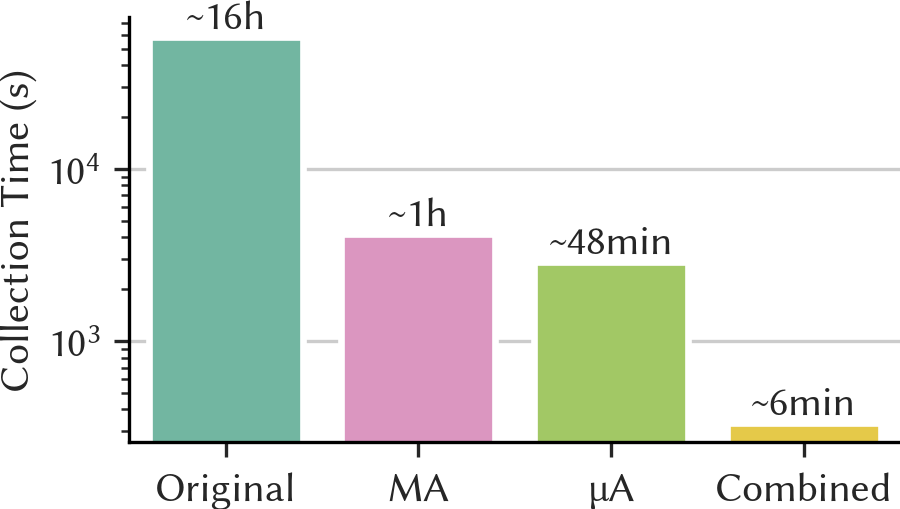

Factor Error


default  bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0     25.761905                                      7.656879   
1     12.176269                                      3.640852   
2     15.756864                                      4.572007   
3     16.787934                                      4.932739   
4      1.595170                                      2.160508   
...         ...                                           ...   
5274   1.138468                                     45.248408   
5275   4.072325                                      1.765856   
5276   4.574576                                      1.897595   
5277   3.653441                                      1.406128   
5278   3.003223                                      1.360926   

      bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         6.260064   
1                                         3.066535   
2                                         3.874225   
3                                         4.083552   
4                                         2.569906   
...                                            ...   
5274                                      1.746916   
5275                                      1.281275   
5276                                      1.240255   
5277                                      1.138983   
5278                                      1.006839   

      bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  
0                                         6.754073  
1                                         3.134865  
2                                         3.819872  
3                                         4.375343  
4                                         2.439099  
...                                            ...  
5274                                     42.355322  
5275                                     16.601123  
5276                                      1.680684  
5277                                      1.464912  
5278                                      2.366085  

[5279 rows x 4 columns]

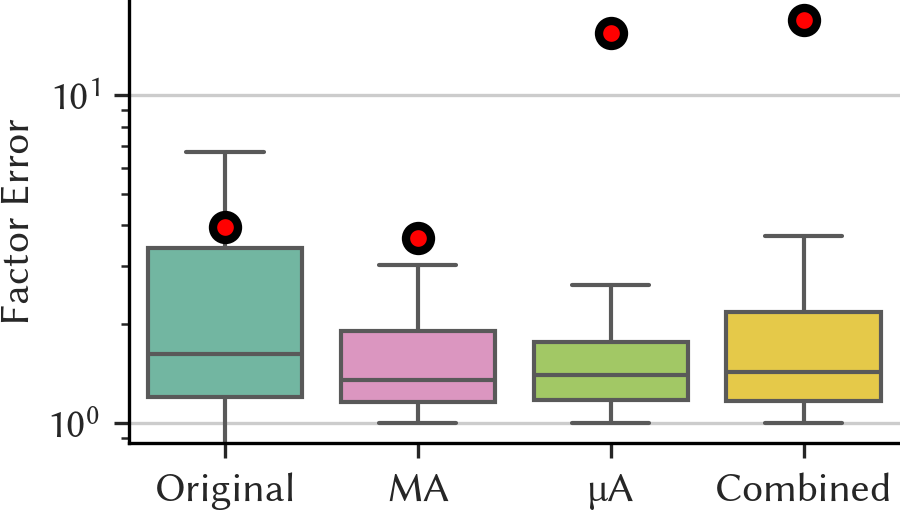

default  bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0     25.761905                                      7.656879   
1     12.176269                                      3.640852   
2     15.756864                                      4.572007   
3     16.787934                                      4.932739   
4      1.595170                                      2.160508   
...         ...                                           ...   
5274   1.138468                                     45.248408   
5275   4.072325                                      1.765856   
5276   4.574576                                      1.897595   
5277   3.653441                                      1.406128   
5278   3.003223                                      1.360926   

      bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         6.260064   
1                                         3.066535   
2                                         3.874225   
3                                         4.083552   
4                                         2.569906   
...                                            ...   
5274                                      1.746916   
5275                                      1.281275   
5276                                      1.240255   
5277                                      1.138983   
5278                                      1.006839   

      bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  
0                                         6.754073  
1                                         3.134865  
2                                         3.819872  
3                                         4.375343  
4                                         2.439099  
...                                            ...  
5274                                     42.355322  
5275                                     16.601123  
5276                                      1.680684  
5277                                      1.464912  
5278                                      2.366085  

[5279 rows x 4 columns]

default
Mean Factor Error:  3.9658089903488976
Median Factor Error:  1.6251763414634146
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721
Mean Factor Error:  3.6676580845157902
Median Factor Error:  1.3475098863636366
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721
Mean Factor Error:  15.46389978383048
Median Factor Error:  1.4048271734783615
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721
Mean Factor Error:  16.884399199085774
Median Factor Error:  1.4317385023165767


R <= 1.1  1.1 < R < 2  \
default                                       0.136768     0.476984   
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  0.159500     0.607312   
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  0.154954     0.642546   
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  0.161773     0.565448   

                                              2 < R < 5    R >= 5  
default                                        0.206100  0.180148  
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721   0.171623  0.061565  
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721   0.127107  0.075393  
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721   0.166698  0.106081

R <= 1.1  1.1 < R < 2  \
default                                             14           48   
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721        16           61   
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721        15           64   
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721        16           57   

                                              2 < R < 5  R >= 5  
default                                              21      18  
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721         17       6  
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721         13       8  
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721         17      11

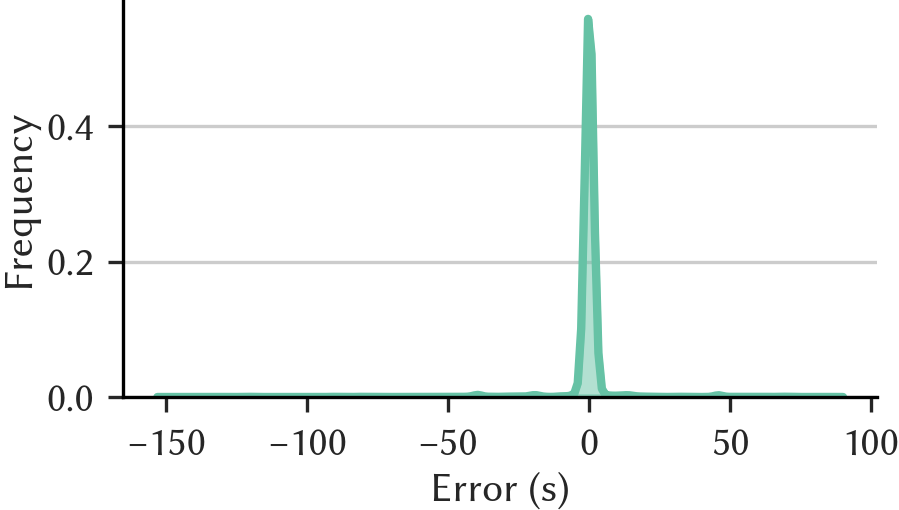

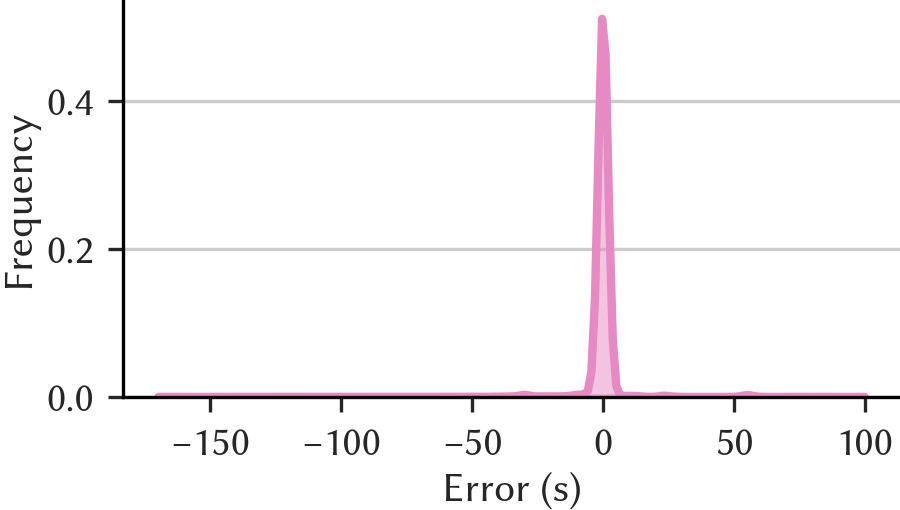

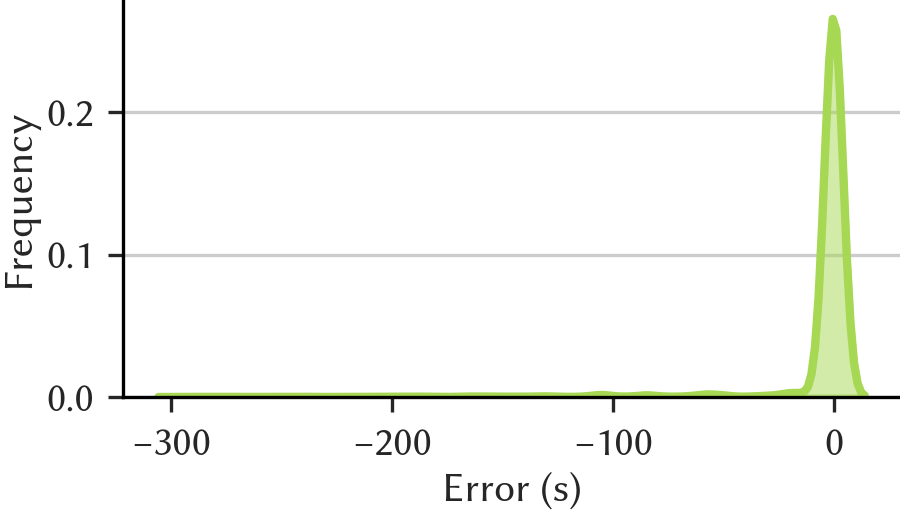

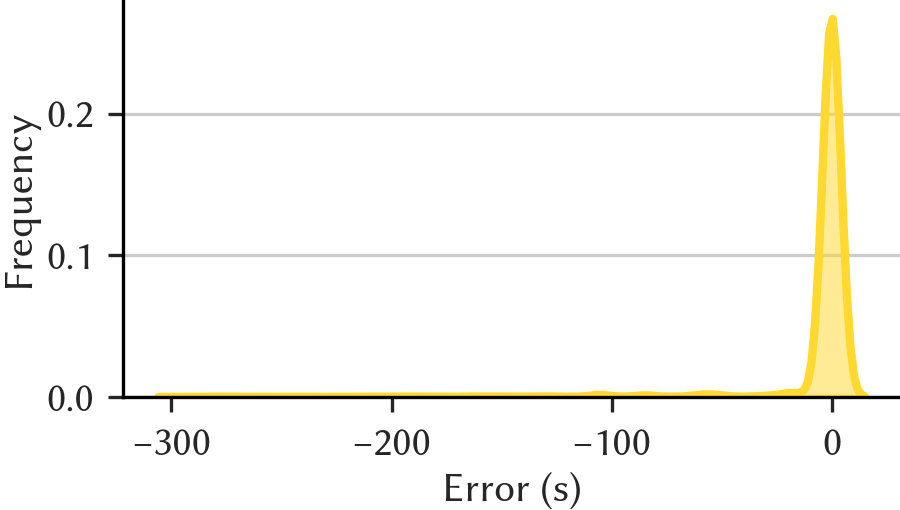

MAE (s)


default                                         1.505314
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721    1.723758
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721    4.107891
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721    4.119084
dtype: float64

['Original', 'MA', 'µA', 'Combined']


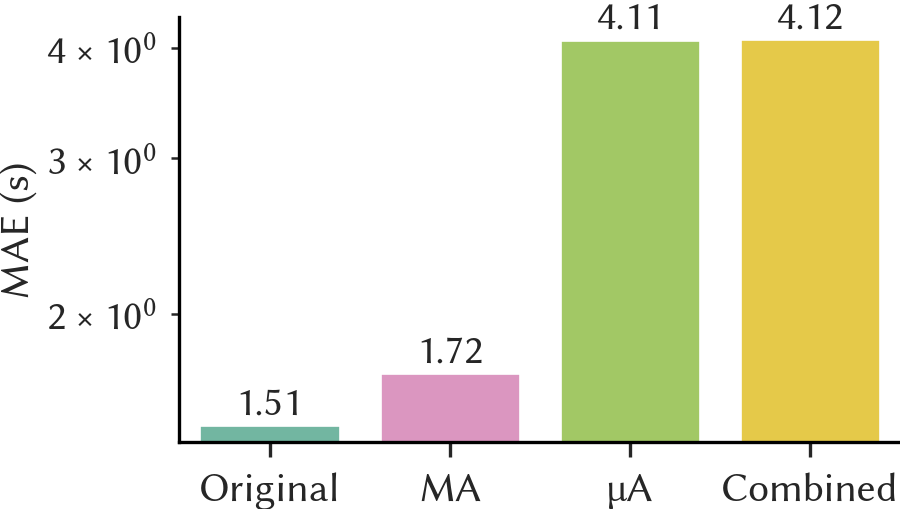

Median AE (s)


default                                         0.049464
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721    0.027308
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721    0.025047
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721    0.026483
dtype: float64

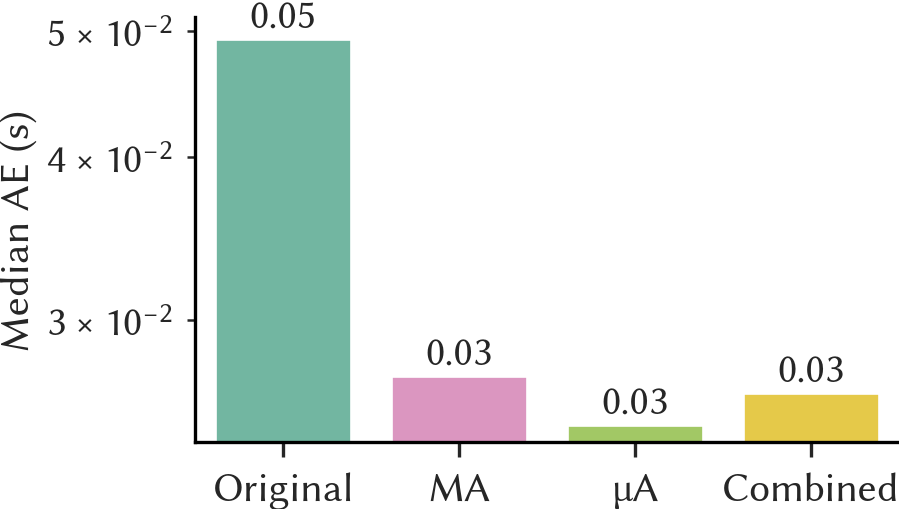

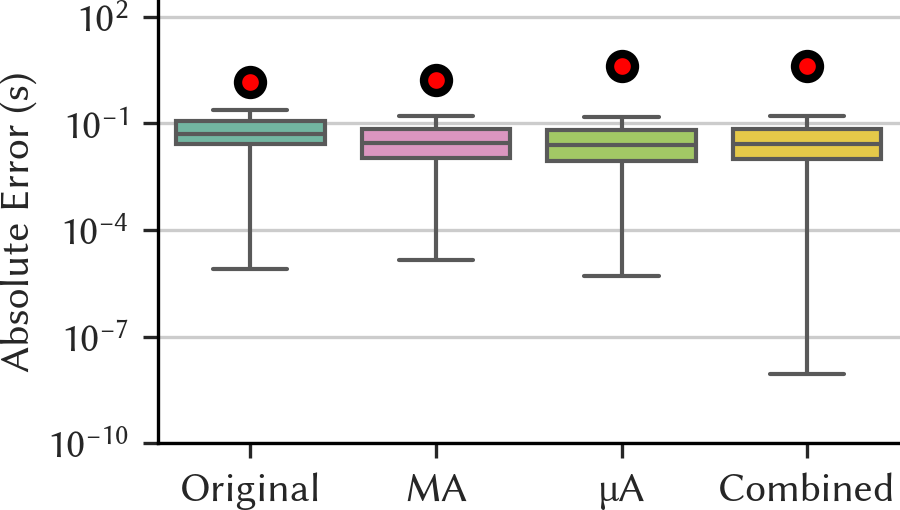

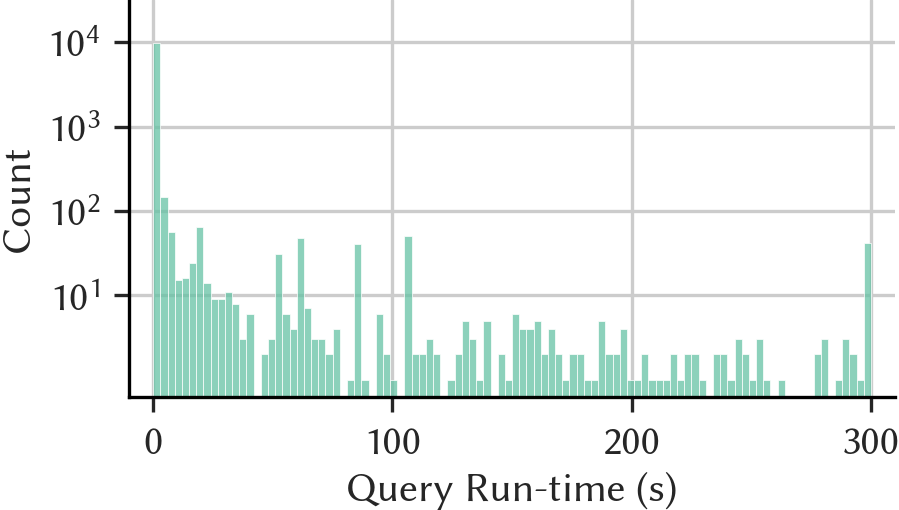

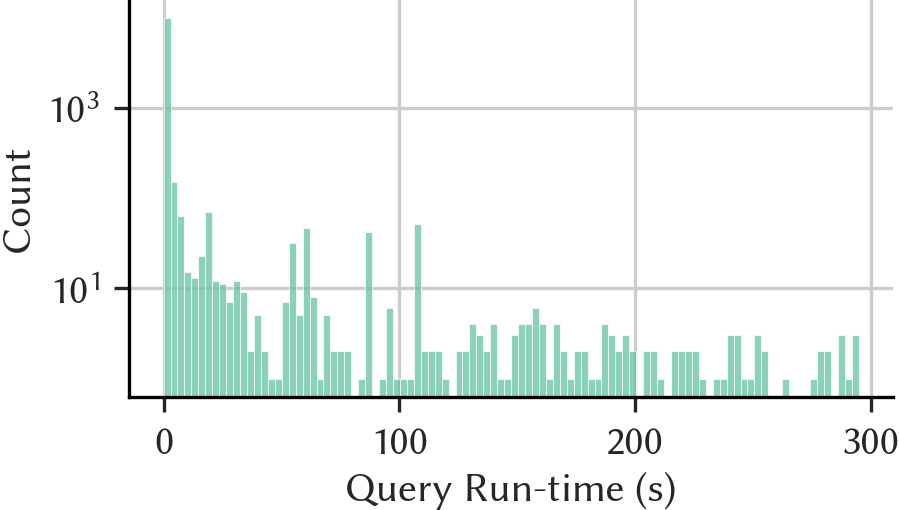

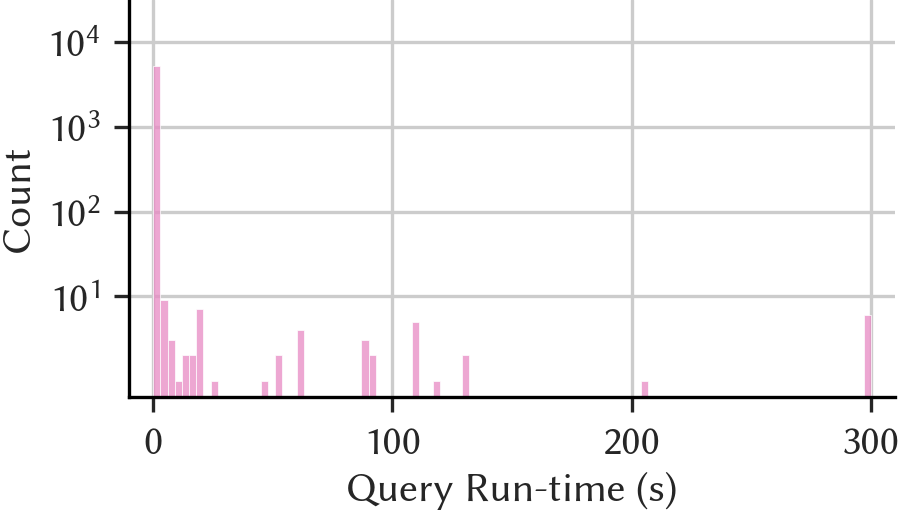

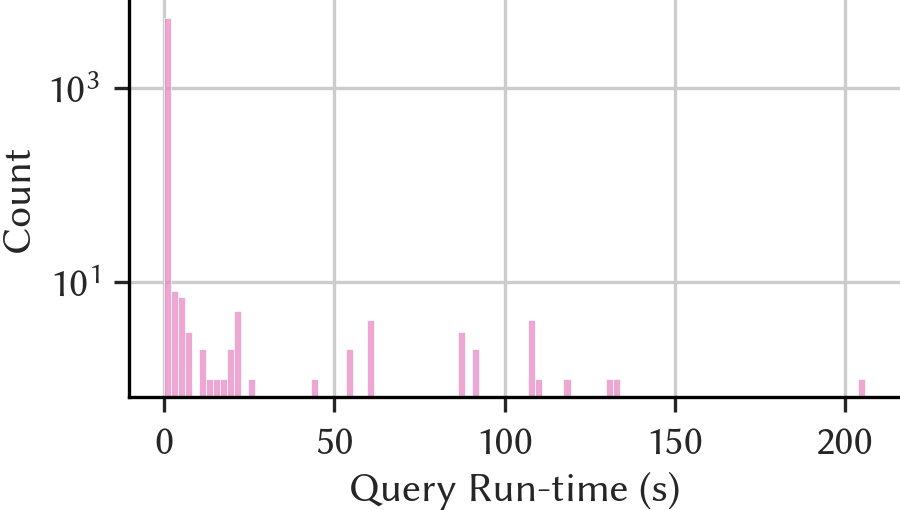

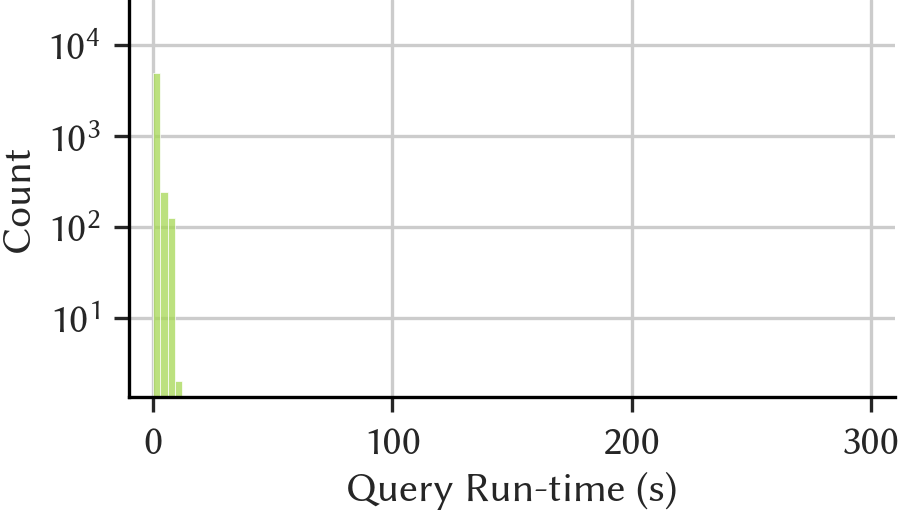

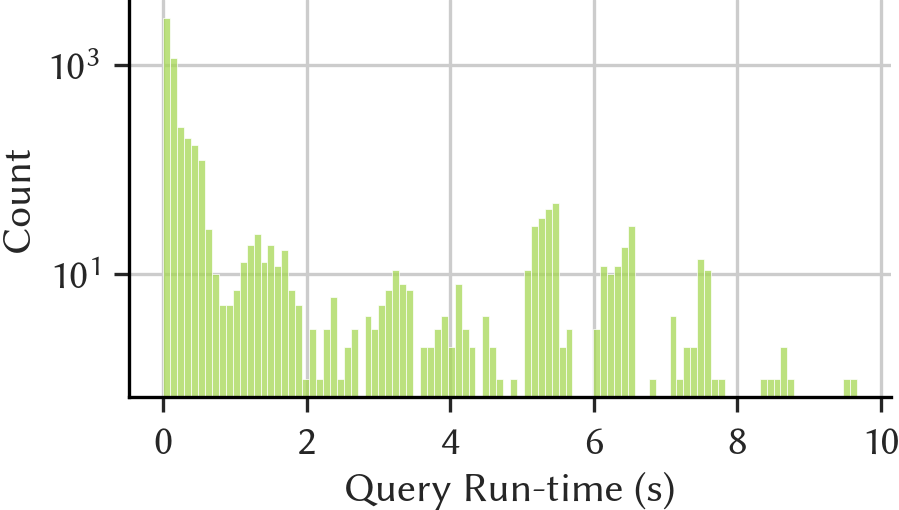

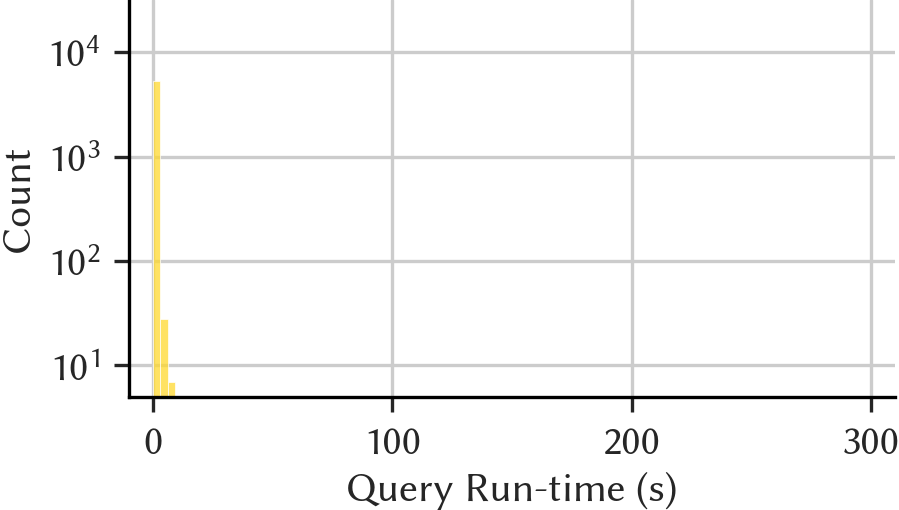

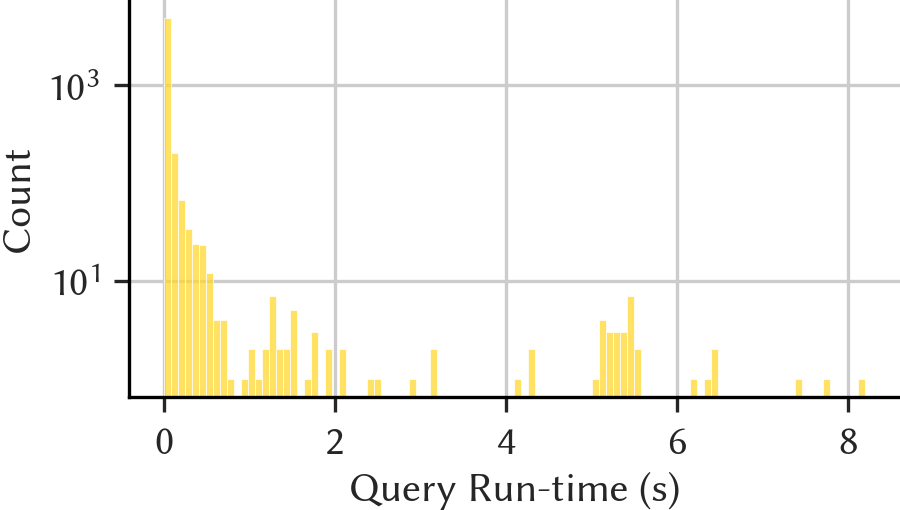

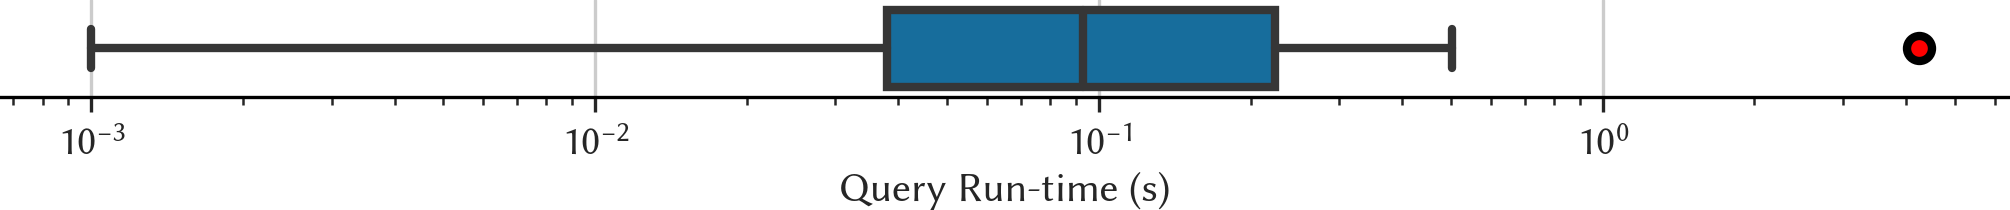

dsb_sf_10
rqs_df


Query   Seed  bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0           query001-1-1  15721                                     3865.495   
1           query001-1-1  15722                                          NaN   
2          query001-10-1  15721                                   204673.942   
3          query001-10-1  15722                                          NaN   
4          query001-11-1  15721                                     3792.300   
...                  ...    ...                                          ...   
10592  query102_spj-97-1  15722                                          NaN   
10593  query102_spj-98-1  15721                                     2100.972   
10594  query102_spj-98-1  15722                                          NaN   
10595  query102_spj-99-1  15721                                      225.688   
10596  query102_spj-99-1  15722                                          NaN   

       bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                          3982.777   
1                                               NaN   
2                                          6455.025   
3                                               NaN   
4                                          3843.397   
...                                             ...   
10592                                           NaN   
10593                                      2541.081   
10594                                           NaN   
10595                                       240.351   
10596                                           NaN   

       bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                               0.0   
1                                               NaN   
2                                               0.0   
3                                               NaN   
4                                               0.0   
...                                             ...   
10592                                           NaN   
10593                                           0.0   
10594                                           NaN   
10595                                           0.0   
10596                                           NaN   

       bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                               0.0   
1                                               NaN   
2                                               0.0   
3                                               NaN   
4                                               0.0   
...                                             ...   
10592                                           NaN   
10593                                           0.0   
10594                                           NaN   
10595                                           1.0   
10596                                           NaN   

       bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                          4116.89   
1                                              NaN   
2                                             0.00   
3                                              NaN   
4                                             0.00   
...                                            ...   
10592                                          NaN   
10593                                         0.00   
10594                                          NaN   
10595                                         1.00   
10596                                          NaN   

       bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  \
0                                          3851.738   
1                                               NaN   
2                                             0.000   
3                                               NaN   
4                                          3795.817   
...                                             ...   
10592                                    

pqs_df


Query   Seed  Operator Time  \
0          query001-0-1  15722          0.969   
1          query001-1-1  15722          3.956   
2         query001-10-1  15722        199.041   
3         query001-11-1  15722          3.739   
4         query001-12-1  15722         57.277   
...                 ...    ...            ...   
4987  query102_spj-95-1  15722          3.411   
4988  query102_spj-96-1  15722          0.277   
4989  query102_spj-97-1  15722          0.176   
4990  query102_spj-98-1  15722          0.426   
4991  query102_spj-99-1  15722          0.140   

      Predicted_bytejack_e1_iea0_ic0_es0_ss1_ssp10_sss15721  \
0                                              7.495233       
1                                              7.578046       
2                                              7.569921       
3                                              7.537127       
4                                              7.495147       
...                                                 ...       
4987                                           1.126294       
4988                                           0.692549       
4989                                           0.141815       
4990                                           0.264773       
4991                                           0.251539       

      Predicted_bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                              1.226214        
1                                              1.361846        
2                                              1.125220        
3                                              1.235327        
4                                              1.231785        
...                                                 ...        
4987                                           5.217756        
4988                                           0.503848        
4989                                           0.250839        
4990                                           0.378613        
4991                                           0.517289        

      Predicted_bytejack_e1_iea1_ic0_es0_ss0_ssp100_sss15721  \
0                                            109.207010        
1                                            109.207010        
2                                            109.207010        
3                                            109.207010        
4                                            109.207010        
...                                                 ...        
4987                                           0.255023        
4988                                           0.453217        
4989                                           0.405017        
4990                                           0.464009        
4991                                           0.449012        

      Predicted_bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0                                              3.571011        
1                                              3.572011        
2                                              3.946320        
3                                              3.570411        
4                                              3.570811        
...                                                 ...        
4987                                           2.231175        
4988                                           0.669082        
4989                                           0.811454        
4990                                           0.691659        
4991                                           0.138893        

      Predicted_bytejack_e1_iea1_ic1_es0_ss1_ssp10_sss15721  \
0                                              0.367966       
1                                              0.402909       
2                                              0.477281       
3                                              0.578012       
4                                              0.3

Run-time (ms):  [204864211.931, 65237368.373, 8824766.927000001, 907663.9780000001]
Mean default run-time (ms):  19334.108336258963
std default run-time (ms):  70293.40341327789
Median default run-time (ms):  864.9405
dsb_sf_10 configs_hack=None eval numbers
['Original', 'MA', 'µA', 'Combined'] [204864.211931, 65237.368373000005, 8824.766927, 907.6639780000002]
Original  speedup (x): 1.0
MA  speedup (x): 3.140289331716633
µA  speedup (x): 23.21468811875398
Combined  speedup (x): 225.7049050050546


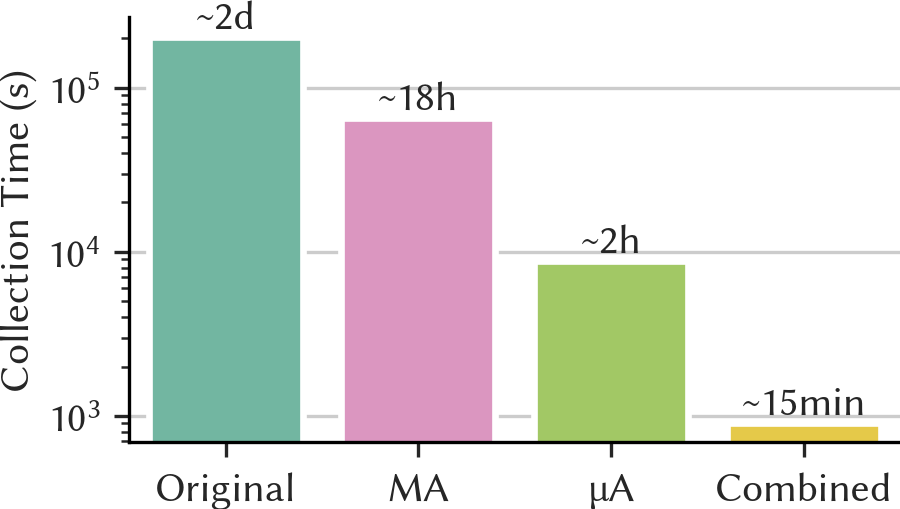

Factor Error


default  bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0     24.362956                                      3.685253   
1      6.000464                                      1.107499   
2      8.434522                                     50.437112   
3      6.323481                                      1.047218   
4      2.425253                                     16.040335   
...         ...                                           ...   
4987   1.218277                                      1.528791   
4988   2.567368                                      2.415460   
4989   1.788301                                      4.610535   
4990   1.116934                                      1.623612   
4991   3.895133                                      1.007968   

      bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         1.265443   
1                                         2.904880   
2                                       176.890726   
3                                         3.026729   
4                                        46.499194   
...                                            ...   
4987                                      1.529685   
4988                                      1.818945   
4989                                      1.425221   
4990                                      1.125159   
4991                                      3.694925   

      bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  
0                                         1.141476  
1                                         4.649191  
2                                       171.365328  
3                                         4.368496  
4                                        66.040540  
...                                            ...  
4987                                      2.263942  
4988                                      2.281490  
4989                                      4.478148  
4990                                      1.656548  
4991                                      4.503176  

[4992 rows x 4 columns]

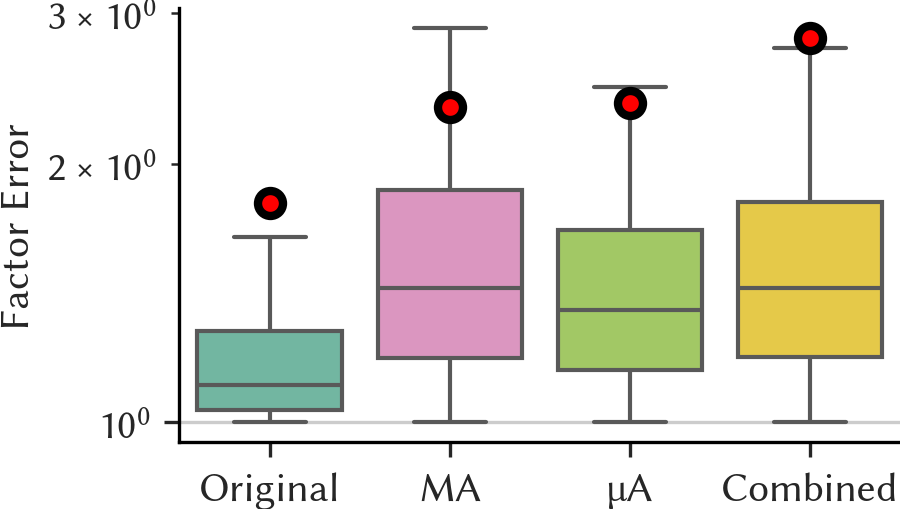

default  bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  \
0     24.362956                                      3.685253   
1      6.000464                                      1.107499   
2      8.434522                                     50.437112   
3      6.323481                                      1.047218   
4      2.425253                                     16.040335   
...         ...                                           ...   
4987   1.218277                                      1.528791   
4988   2.567368                                      2.415460   
4989   1.788301                                      4.610535   
4990   1.116934                                      1.623612   
4991   3.895133                                      1.007968   

      bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  \
0                                         1.265443   
1                                         2.904880   
2                                       176.890726   
3                                         3.026729   
4                                        46.499194   
...                                            ...   
4987                                      1.529685   
4988                                      1.818945   
4989                                      1.425221   
4990                                      1.125159   
4991                                      3.694925   

      bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  
0                                         1.141476  
1                                         4.649191  
2                                       171.365328  
3                                         4.368496  
4                                        66.040540  
...                                            ...  
4987                                      2.263942  
4988                                      2.281490  
4989                                      4.478148  
4990                                      1.656548  
4991                                      4.503176  

[4992 rows x 4 columns]

default
Mean Factor Error:  1.803598639489676
Median Factor Error:  1.105545636311629
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721
Mean Factor Error:  2.333604776341193
Median Factor Error:  1.4332644415929159
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721
Mean Factor Error:  2.3592625285960045
Median Factor Error:  1.3523577809685308
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721
Mean Factor Error:  2.8070068235304606
Median Factor Error:  1.43562576869111


R <= 1.1  1.1 < R < 2  \
default                                       0.486779     0.444311   
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  0.144431     0.638822   
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721  0.176082     0.707532   
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721  0.152444     0.643630   

                                              2 < R < 5    R >= 5  
default                                        0.040665  0.028245  
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721   0.171675  0.045072  
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721   0.098357  0.018029  
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721   0.161859  0.042067

R <= 1.1  1.1 < R < 2  \
default                                             49           44   
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721        14           64   
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721        18           71   
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721        15           64   

                                              2 < R < 5  R >= 5  
default                                               4       3  
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721         17       5  
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721         10       2  
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721         16       4

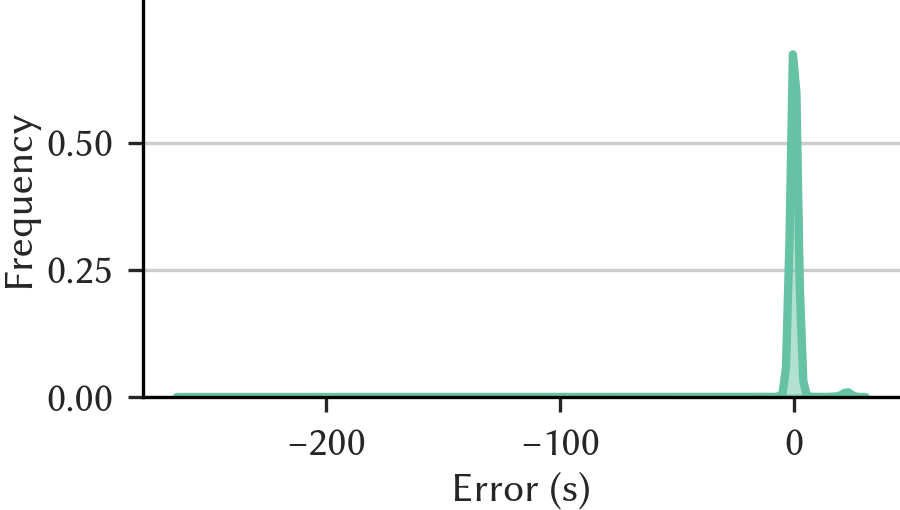

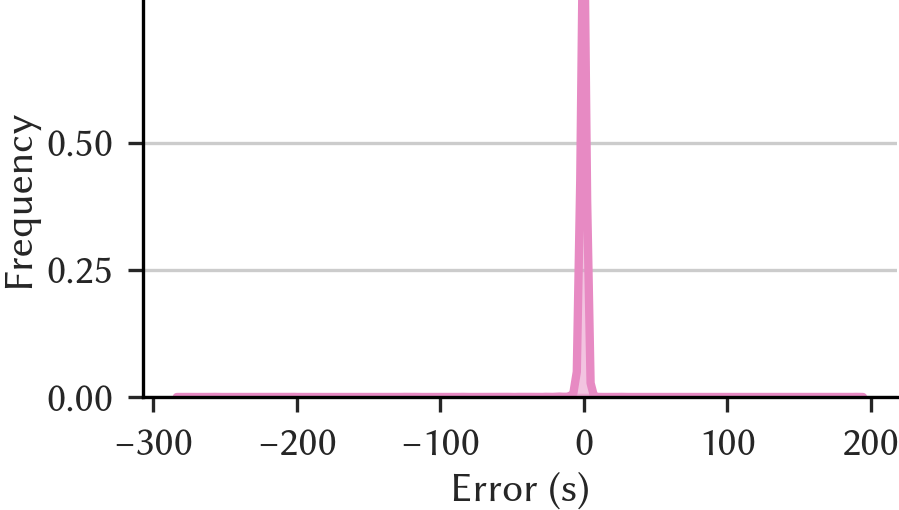

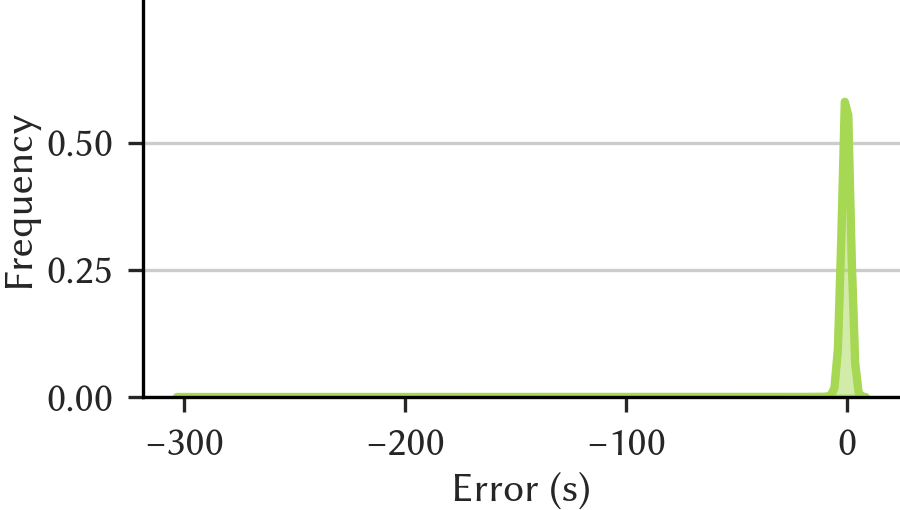

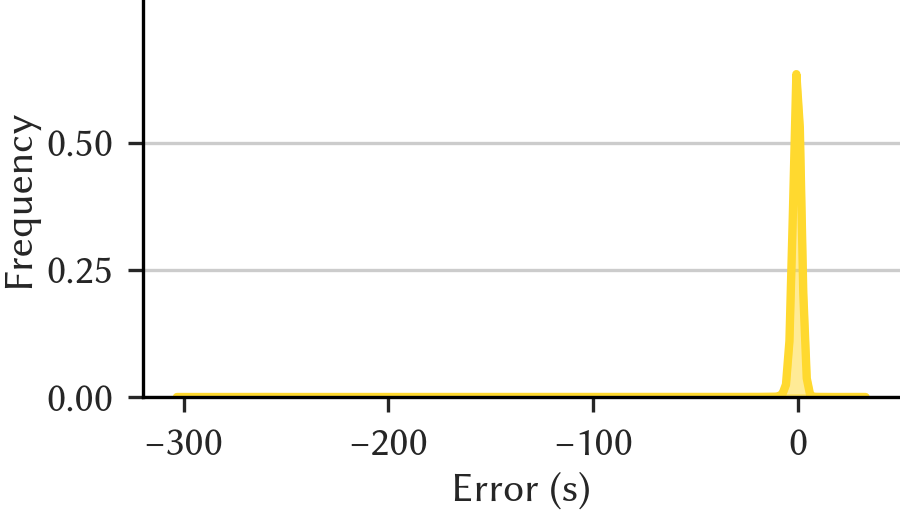

MAE (s)


default                                         0.925824
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721    0.983621
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721    0.924583
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721    1.027723
dtype: float64

['Original', 'MA', 'µA', 'Combined']


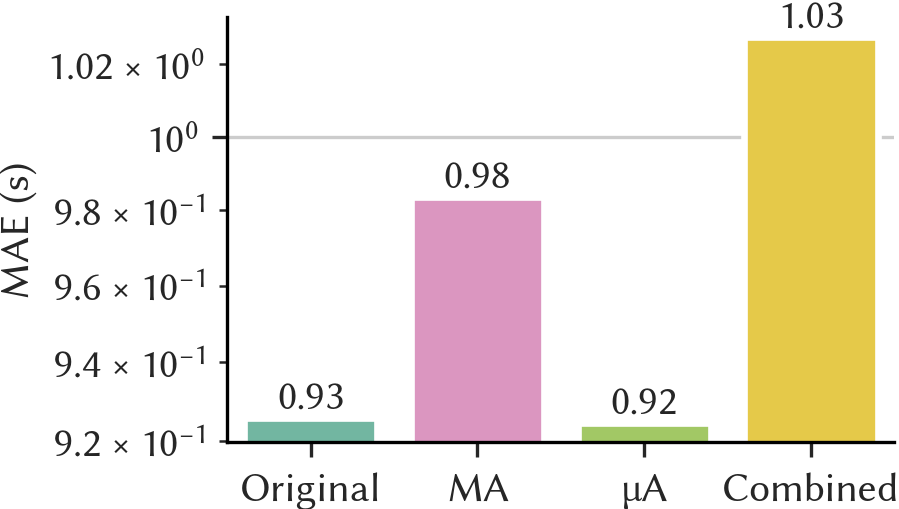

Median AE (s)


default                                         0.062584
bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721    0.218794
bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721    0.160972
bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721    0.194484
dtype: float64

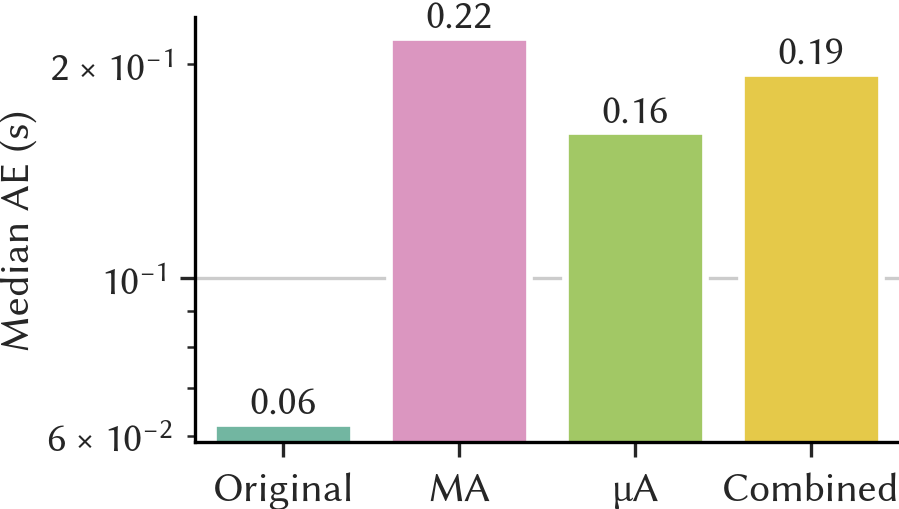

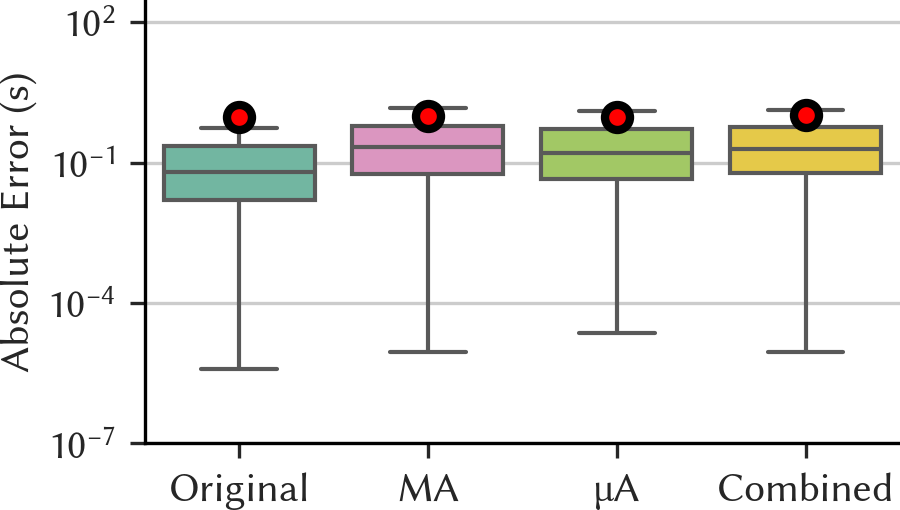

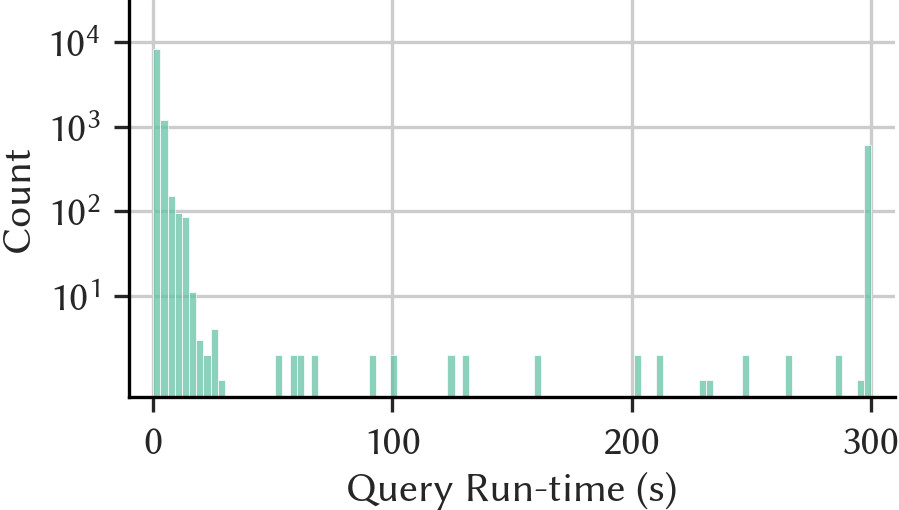

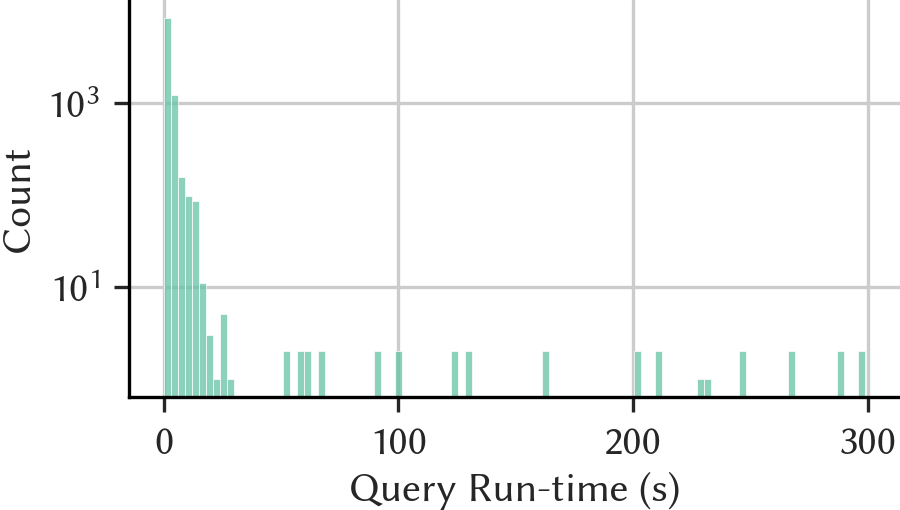

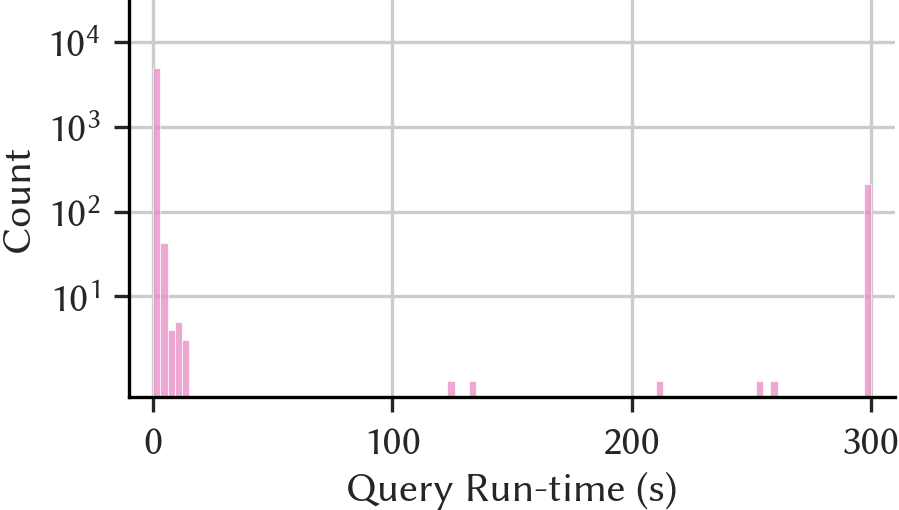

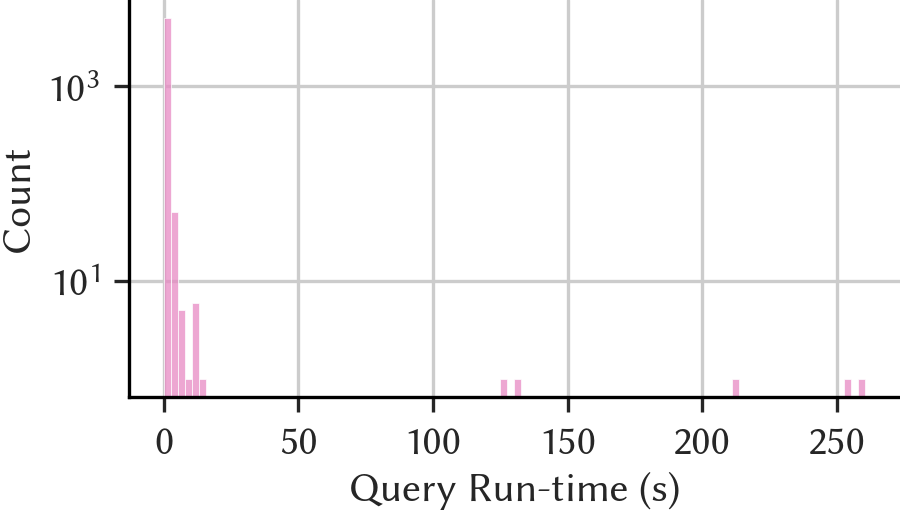

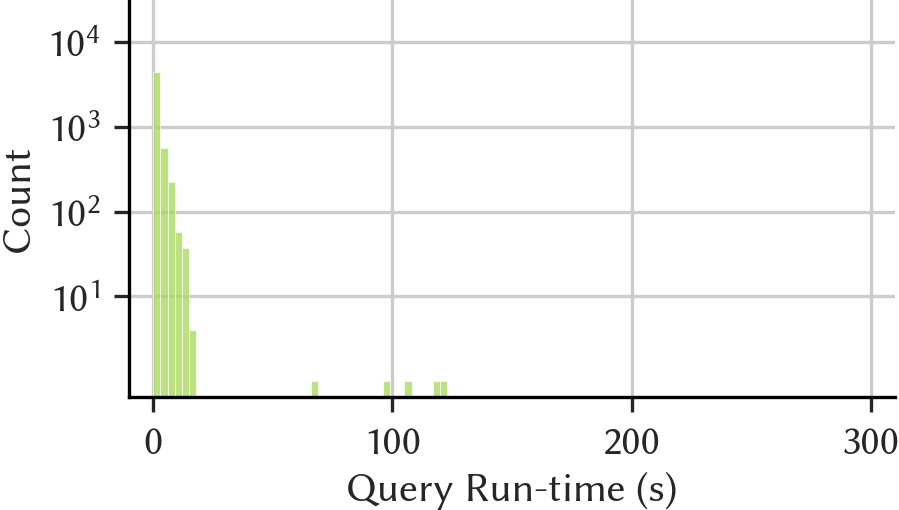

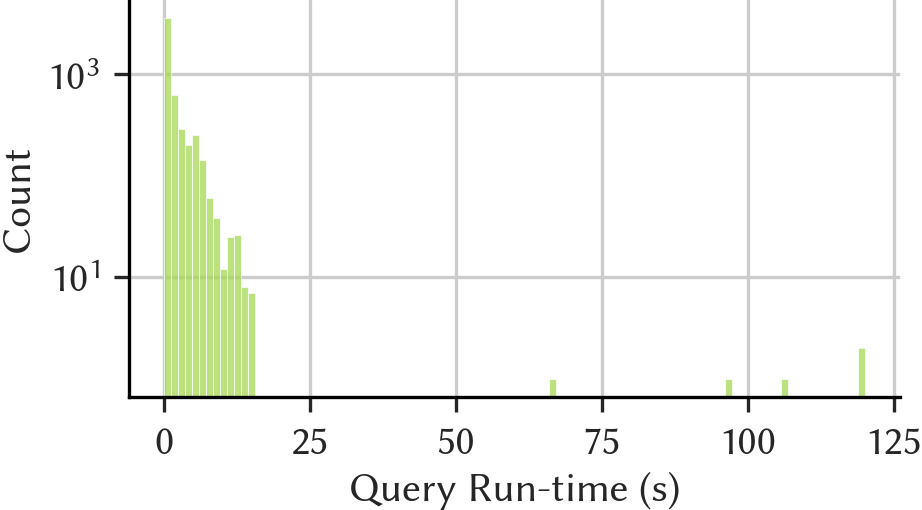

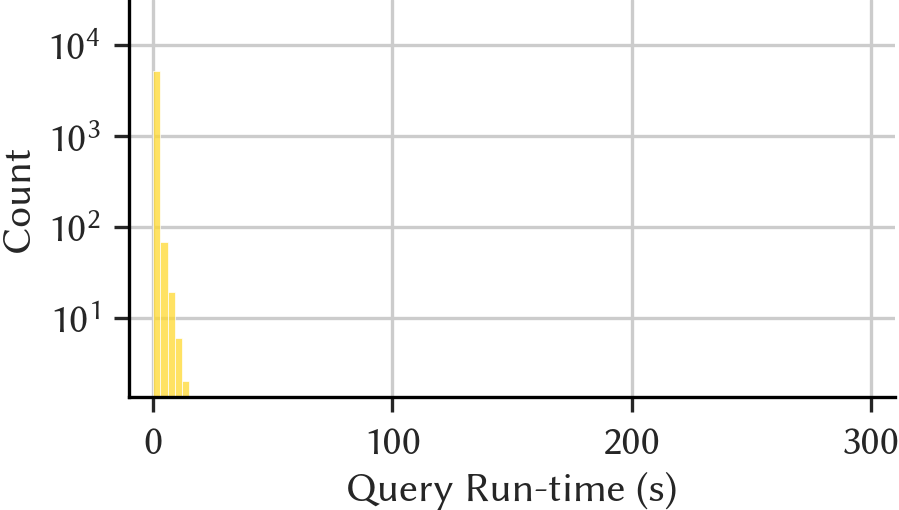

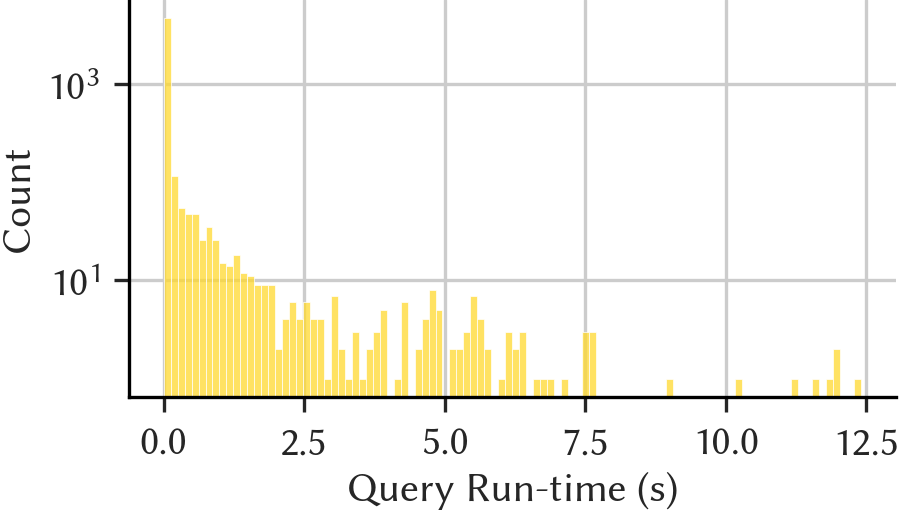

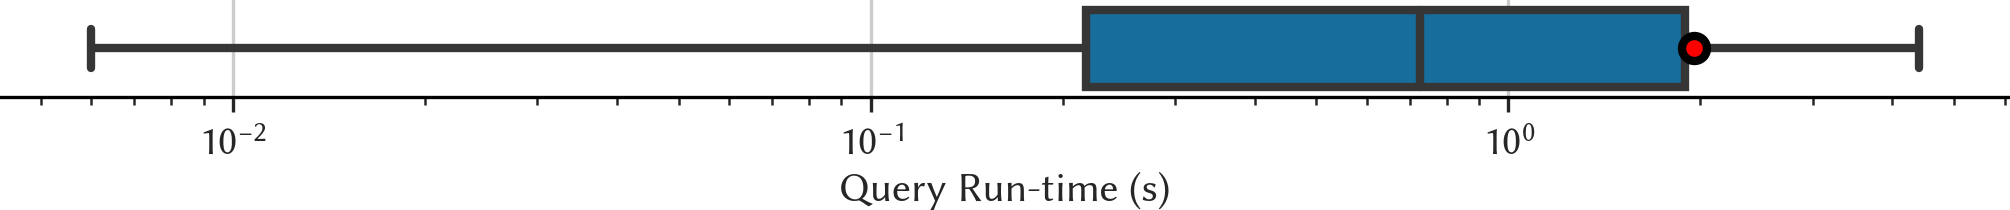

In [4]:
def plot_results(expt_name, configs_hack=None):
    # configs_hack reuses this code for the sampling experiments.
    print(expt_name)

    fig_dir = PLOT_ROOT / f"results_{expt_name}"
    fig_dir.mkdir(exist_ok=True, parents=True)
    
    pqs_df = read_query_seed_csv(MODEL_ROOT / f"{expt_name}/prediction_query_seed.csv")
    eqs_df = pd.read_csv(MODEL_ROOT / f"{expt_name}/error_query_seed.csv")
    rqs_df = read_query_seed_csv(MODEL_ROOT / f"{expt_name}/runtime_query_seed.csv")
    r_df = read_runtime_csv(MODEL_ROOT / f"{expt_name}/runtime.csv")

    print("rqs_df")
    display(rqs_df)
    print("pqs_df")
    display(pqs_df)
    
    configs = [
        "default",
        "nts_b10_r15721",
        "sts_b10_r15721",
        'bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721',
        'bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721',
        'bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721',
    ]
    
    rename = {
        "default": "Original",
        "nts_b10_r15721": "Automatic",
        "sts_b10_r15721": "Manual",
        "bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721": "µA",
        "bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721": "MA",
        "bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721": "Combined",
        "bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721": "C10",
    }
    colors = {c: col for c, col in zip(configs, sns.color_palette("Set2"))}
    colors["bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721"] = colors["bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721"]
        
    suffix = ""
    if configs_hack is not None:
        configs = ["default", "nts_b10_r15721", "sts_b10_r15721", "bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721"]
        suffix = "_sample"
    else:
        configs = [x for x in configs if "ts_b10" not in x]
    
    names = [rename[c] for c in configs]

    runtimes_ms = [rqs_df[c].sum() for c in configs]
    print("Run-time (ms): ", runtimes_ms)
    runtimes_readable = [prettify_time(x/1000) for x in runtimes_ms]
    
    print("Mean default run-time (ms): ", rqs_df["default"].mean())
    print("std default run-time (ms): ", rqs_df["default"].std())
    print("Median default run-time (ms): ", rqs_df["default"].median())

    xticklabels = [str(x) for x in names]
    palette = [colors[c] for c in configs]

    fig_quarter()
    runtimes_s = [x / 1000 for x in runtimes_ms]
    print(f"{expt_name} {configs_hack=} eval numbers")
    print(names, runtimes_s)
    for name, runtime in zip(names, runtimes_s):
        print(name, " speedup (x):", runtimes_s[0] / runtime)
    ax = sns.barplot(x=names, y=runtimes_s, hue=names, palette=palette, dodge=False)
    runtimes_labels = [f"~{b}" for a, b in zip(runtimes_s, runtimes_readable)]
    for container, label in zip(ax.containers, runtimes_labels):
        ax.bar_label(container, fmt=label, padding=0)
    ax.set_yscale("log")
    ax.set_ylabel("Collection Time (s)")
    
    h, l = ax.get_legend_handles_labels()
    make_legend(h, l, fig_dir / f"legend{suffix}.pdf", len(names))
    ax.legend_.remove()
    plt.tight_layout()
    plt.savefig(fig_dir / f"runtime_dataset{suffix}.pdf")
    plt.show()
    
    ptargets = [f"Predicted_{c}" for c in configs]
    targets = ["Operator Time"] + ptargets
    
    factor_errors = {}
    for c in configs:
        a = pqs_df["Operator Time"].div(pqs_df[f"Predicted_{c}"], axis=0)
        b = pqs_df["Operator Time"].rdiv(pqs_df[f"Predicted_{c}"], axis=0)
        factor_errors[c] = pd.concat([a,b]).groupby(level=0).max()
    factor_errors = pd.DataFrame(factor_errors)
    print("Factor Error")
    display(factor_errors)
    fig_quarter()
    ax = sns.boxplot(data=factor_errors, palette=palette, linewidth=0.5)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(xticklabels)
    ax.set_yscale("log")
    ax.set_ylabel("Factor Error")
    plt.tight_layout()
    plt.savefig(fig_dir / f"factor_error{suffix}.pdf")
    plt.show()
    
    display(factor_errors)
    
    factor_errors_table = {}
    cutoff1 = 1.1
    cutoff2 = 2
    cutoff3 = 5
    for c in configs:
        print(c)
        print("Mean Factor Error: ", factor_errors[c].mean())
        print("Median Factor Error: ", factor_errors[c].median())
        factor_errors_table[c] = [
            (factor_errors[c] <= cutoff1).mean(),
            ((cutoff1 < factor_errors[c]) & (factor_errors[c] < cutoff2)).mean(),
            ((cutoff2 < factor_errors[c]) & (factor_errors[c] < cutoff3)).mean(),
            (factor_errors[c] >= cutoff3).mean(),
        ]
    factor_errors_table = pd.DataFrame(factor_errors_table).T
    factor_errors_table.columns = [
        f"R <= {cutoff1}",
        f"{cutoff1} < R < {cutoff2}",
        f"{cutoff2} < R < {cutoff3}",
        f"R >= {cutoff3}",
    ]
    display(factor_errors_table)
    factor_errors_table = (factor_errors_table * 100).round(0).astype(int)
    display(factor_errors_table)
    factor_errors_table.index = names
    factor_errors_table.to_csv(fig_dir / f"factor_error{suffix}.csv")
    
    with open(fig_dir / f"factor_error{suffix}.tex", "w") as f:
        print(r"\begin{tabular}{|r|rrrr|}", file=f)
        print(r"\hline", file=f)
        print(r" & \multicolumn{4}{c|}{\textbf{Factor Error}} \\", file=f)
        print(f"& {cutoff1} $\le$ & [{cutoff1},{cutoff2}] & [{cutoff2},{cutoff3}] & $\ge$ {cutoff3} \\\\", file=f)
        print(r"\hline", file=f)
        for row in factor_errors_table.itertuples():
            print(r"{} & {}\% & {}\% & {}\% & {}\% \\".format(*[r"\textbf{" + x + r"}" if i == 0 else x for i, x in enumerate(row)]), file=f)
        print(r"\hline", file=f)
        print(r"\end{tabular}", file=f)
    
    for c in configs:
        errors = pqs_df[f"Predicted_{c}"] - pqs_df["Operator Time"]
        # https://stackoverflow.com/questions/65759931/seaborn-kde-plot-plotting-probabilities-instead-of-density-histplot-without-bar
        fig_quarter()
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_quarter[0], figsize_quarter[1]))
        ax = sns.histplot(data=errors, color=colors[c], stat="proportion", bins=100, kde=True, kde_kws={"cut": 3})
        ax.containers[0].remove()
        ax.relim()
        ax.autoscale_view()
        # Following Fig 7 of prior work, we'll call it Frequency even if I find that somewhat misleading
        # https://15799.courses.cs.cmu.edu/spring2022/papers/14-behavior2/p1733-marcus.pdf
        ax.set_ylabel("Frequency")
        ax.set_xlabel("Error (s)")
        if "dsb_sf_10" == expt_name:
            ax.set_ylim(top=0.78)
            ax.set_yticks([0,0.25,0.5])
        elif "tpch_sf_100" == expt_name:
            if c in ["default", "bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721"]:
                ax.set_ylim(top=0.28)
            else:
                ax.set_ylim(top=0.05)
        line = ax.lines[0]
        ax.fill_between(line.get_xdata(), line.get_ydata(), color=colors[c], alpha=0.5)
        ax.grid(axis="x")
        plt.tight_layout()
        plt.savefig(fig_dir / f"errors_{c}{suffix}.pdf")
        plt.show()

    fig_quarter()
    mae_df = eqs_df[configs].mean()
    print("MAE (s)")
    display(mae_df)
    print(xticklabels)
    ax = sns.barplot(x=xticklabels, y=mae_df.values, hue=xticklabels, dodge=False, palette=palette)
    for container in ax.containers:
        ax.bar_label(container, fmt="{:.2f}")
    ax.set_yscale("log")
    ax.set_ylabel("MAE (s)")
    ax.legend_.remove()
    plt.tight_layout()
    plt.savefig(fig_dir / f"ae_mean{suffix}.pdf")
    plt.show()

    fig_quarter()
    medae_df = eqs_df[configs].median()
    print("Median AE (s)")
    display(medae_df)
    ax = sns.barplot(x=xticklabels, y=medae_df.values, hue=xticklabels, dodge=False, palette=palette)
    for container in ax.containers:
        ax.bar_label(container, fmt="{:.2f}")
    ax.set_yscale("log")
    ax.set_ylabel("Median AE (s)")
    ax.legend_.remove()
    plt.tight_layout()
    plt.savefig(fig_dir / f"ae_median{suffix}.pdf")
    plt.show()

    fig_quarter()
    ax = sns.boxplot(eqs_df[configs], showfliers=False, palette=palette, linewidth=0.5)
    ax.set_yscale("log")
    if expt_name == "tpch_sf_100" and configs_hack:
        ax.set_ylim(bottom=10**-6, top=300)
        ax.set_yticks([10**-4, 10**-2, 10**0, 10**2])
    else:
        if expt_name == "dsb_sf_1":
            ax.set_ylim(bottom=10**-10, top=300)
        else:
            ax.set_ylim(bottom=10**-7, top=300)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(xticklabels)
    ax.set_ylabel("Absolute Error (s)")
    plt.tight_layout()
    plt.savefig(fig_dir / f"ae_boxplot{suffix}.pdf")
    plt.show()
    
    for c in configs:
        fig_quarter()
        ax = sns.histplot(rqs_df[c] / (1e3), bins=100, binrange=(0,300), color=colors[c])
        ax.set_xlabel("Query Run-time (s)")
        ax.set_yscale("log")
        ax.set_yticks([10**1, 10**2, 10**3, 10**4])
        ax.set_ylim(top=10**(4.5))
        ax.set_xticks([0,100,200,300])
        ax.set_xlim(-10,310)
        plt.tight_layout()
        plt.savefig(fig_dir / f"runtime_{c}{suffix}.pdf")
        plt.show()
        meow = rqs_df[c]
        meow = meow[meow != 300000]
        ax = sns.histplot(meow / (1e3), bins=100, color=colors[c])
        ax.set_xlabel("Query Run-time (s)")
        ax.set_yscale("log")
        plt.tight_layout()
        plt.savefig(fig_dir / f"runtime_{c}{suffix}_no_timeout.pdf")
        plt.show()
    
    fig_quarter()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_half[0], figsize_quarter[1]/2))
    ax = sns.boxplot(pqs_df["Operator Time"], orient="h", ax=ax)
    ax.set_yticks([])
    ax.get_yaxis().set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xscale("log")
    ax.set_xlabel("Query Run-time (s)")
    plt.tight_layout()
    plt.savefig(fig_dir / f"runtime_query_boxplot{suffix}.pdf")
    plt.show()
    plt.close()


plot_results("tpch_sf_10", configs_hack=True)
plot_results("tpch_sf_100", configs_hack=True)
    
plot_results("tpch_sf_10")
plot_results("tpch_sf_100")
plot_results("dsb_sf_1")
plot_results("dsb_sf_10")

tpch_sf_100
Note: timeouts ignored.


Query   Seed  Bytejack     default  \
0       1-1  15721     False   69169.641   
1       2-1  15721     False   43684.502   
2       3-1  15721     False   64244.210   
3       4-1  15721     False   69339.647   
4       5-1  15721     False  157453.035   
...     ...    ...       ...         ...   
18995  17-1  16720      True  214055.907   
18996  19-1  16720      True    4049.580   
18997  20-1  16720      True  132324.775   
18998  21-1  16720      True   52197.002   
18999  22-1  16720      True    4475.080   

       bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  
0                                         75961.420  
1                                         86698.276  
2                                         75837.089  
3                                         39528.942  
4                                        164366.047  
...                                             ...  
18995                                         0.000  
18996                                         0.000  
18997                                         0.000  
18998                                         1.000  
18999                                         0.000  

[19000 rows x 5 columns]

Activations


array([    0,     0,     0, ..., 18474, 18475, 18476])

Proportion serviced


array([ 0.        ,  0.        ,  0.        , ..., 97.23157895,
       97.23684211, 97.24210526])

0        6.916964e+01
1        1.128541e+02
2        1.770984e+02
3        2.464380e+02
4        4.038910e+02
             ...     
18995    1.205394e+06
18996    1.205398e+06
18997    1.205530e+06
18998    1.205582e+06
18999    1.205587e+06
Name: default, Length: 19000, dtype: float64

0           75.961420
1          162.659696
2          238.496785
3          278.025727
4          442.391774
             ...     
18995    30042.982839
18996    30042.982839
18997    30042.982839
18998    30042.983839
18999    30042.983839
Name: bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721, Length: 19000, dtype: float64

0       -6.791779e+00
1       -4.980555e+01
2       -6.139843e+01
3       -3.158773e+01
4       -3.850074e+01
             ...     
18995    1.175351e+06
18996    1.175355e+06
18997    1.175487e+06
18998    1.175539e+06
18999    1.175544e+06
Length: 19000, dtype: float64

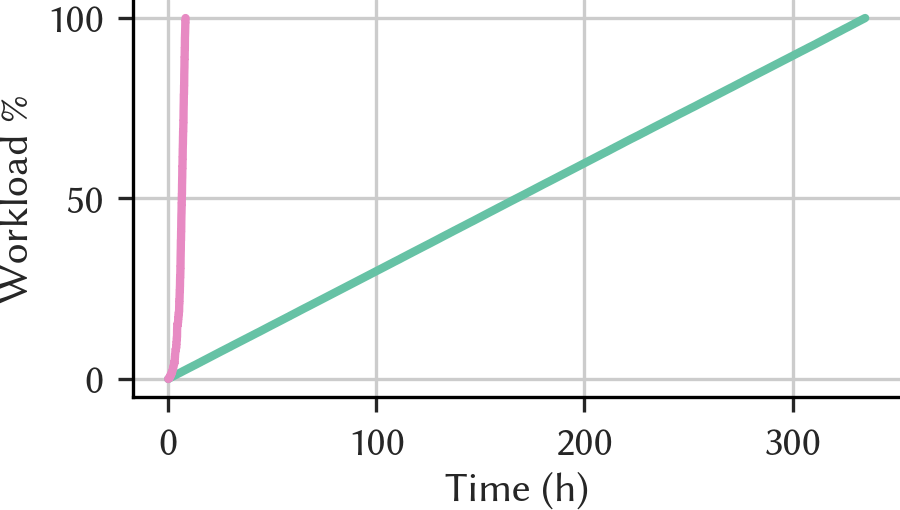

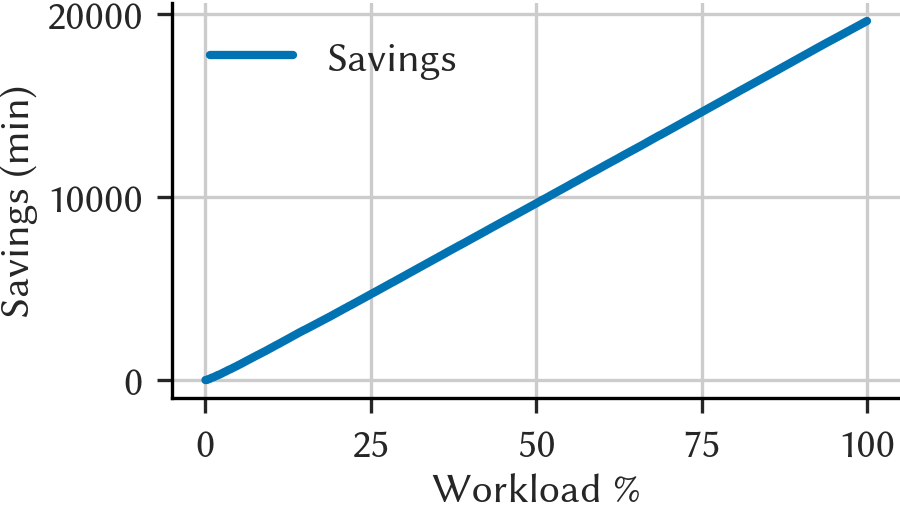

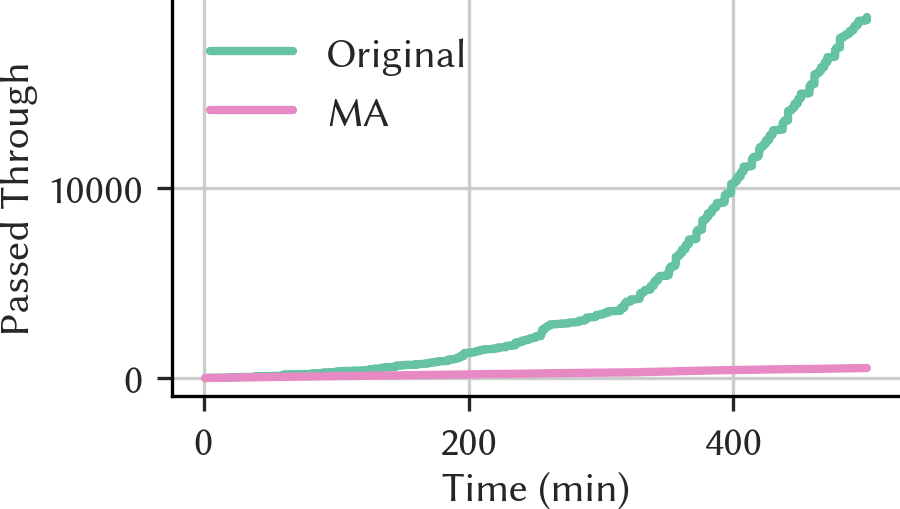

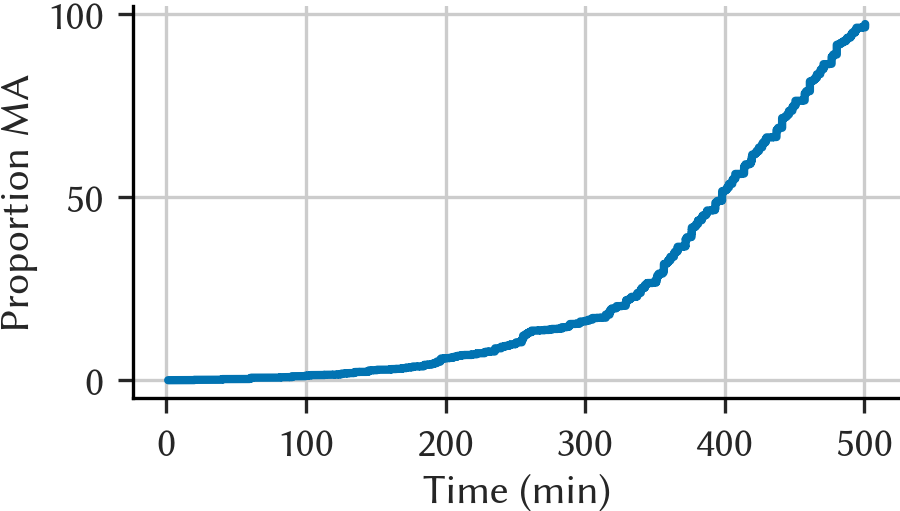

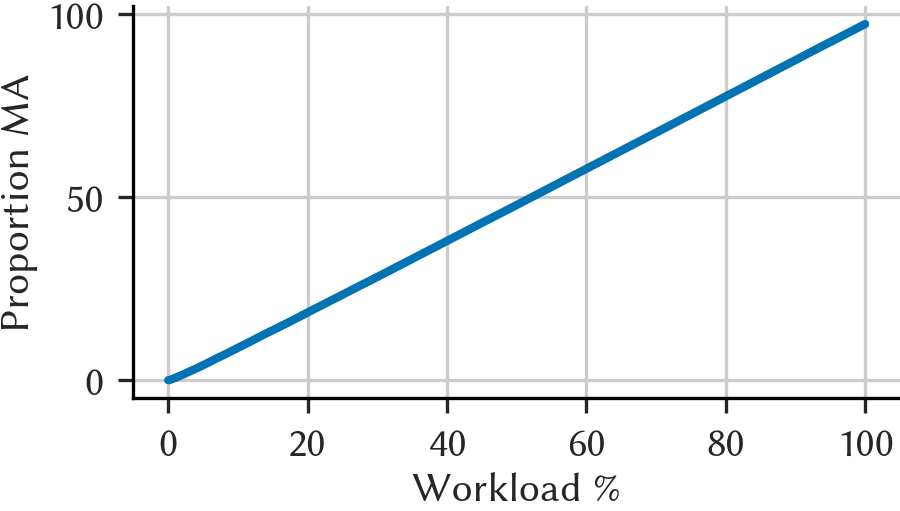

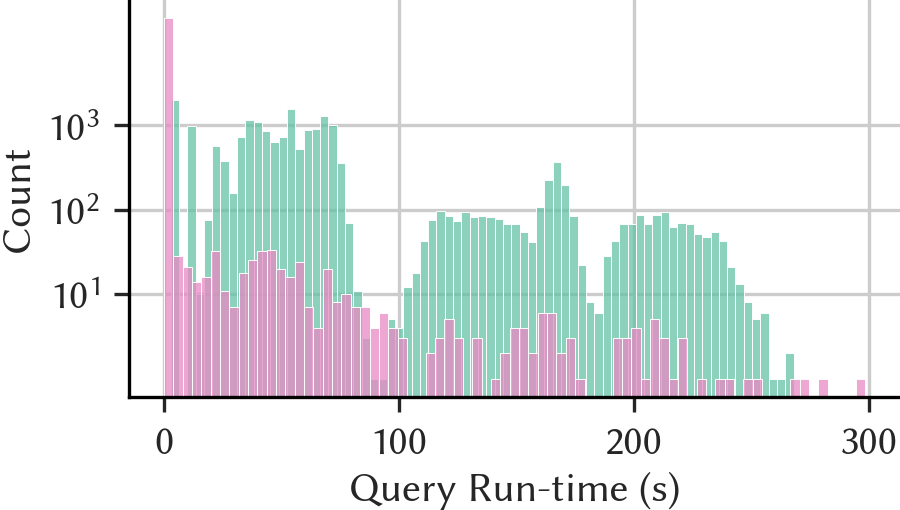

dsb_sf_10
Note: timeouts ignored.


Query   Seed  Bytejack    default  \
0          query001-0-1  15721     False    957.181   
1          query001-1-1  15721      True   3920.229   
2          query001-2-1  15721      True  61526.321   
3          query001-3-1  15721     False    602.526   
4          query001-4-1  15721      True   1174.488   
...                 ...    ...       ...        ...   
4989  query102_spj-95-1  15721      True   4361.937   
4990  query102_spj-96-1  15721      True    566.445   
4991  query102_spj-97-1  15721      True    462.072   
4992  query102_spj-98-1  15721      True    770.006   
4993  query102_spj-99-1  15721      True    412.283   

      bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721  
0                                          889.377  
1                                            0.000  
2                                            0.000  
3                                          646.466  
4                                            0.000  
...                                            ...  
4989                                         0.000  
4990                                         0.000  
4991                                         0.000  
4992                                         0.000  
4993                                         1.000  

[4994 rows x 5 columns]

Activations


array([   0,    1,    2, ..., 4407, 4408, 4409])

Proportion serviced


array([0.00000000e+00, 2.00240288e-02, 4.00480577e-02, ...,
       8.82458951e+01, 8.82659191e+01, 8.82859431e+01])

0           0.957181
1           4.877410
2          66.403731
3          67.006257
4          68.180745
            ...     
4989    10480.397685
4990    10480.964130
4991    10481.426202
4992    10482.196208
4993    10482.608491
Name: default, Length: 4994, dtype: float64

0          0.889377
1          0.889377
2          0.889377
3          1.535843
4          1.535843
           ...     
4989    1377.711734
4990    1377.711734
4991    1377.711734
4992    1377.711734
4993    1377.712734
Name: bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721, Length: 4994, dtype: float64

0          0.067804
1          3.988033
2         65.514354
3         65.470414
4         66.644902
           ...     
4989    9102.685951
4990    9103.252396
4991    9103.714468
4992    9104.484474
4993    9104.895757
Length: 4994, dtype: float64

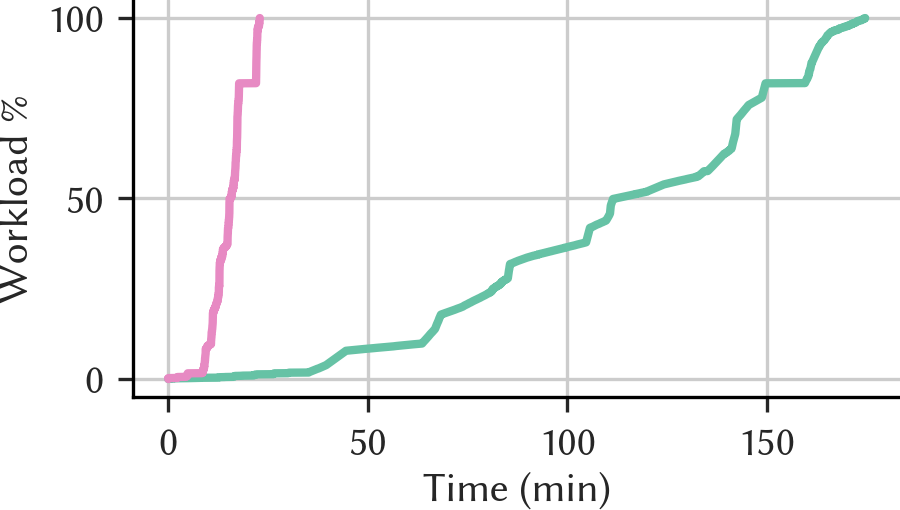

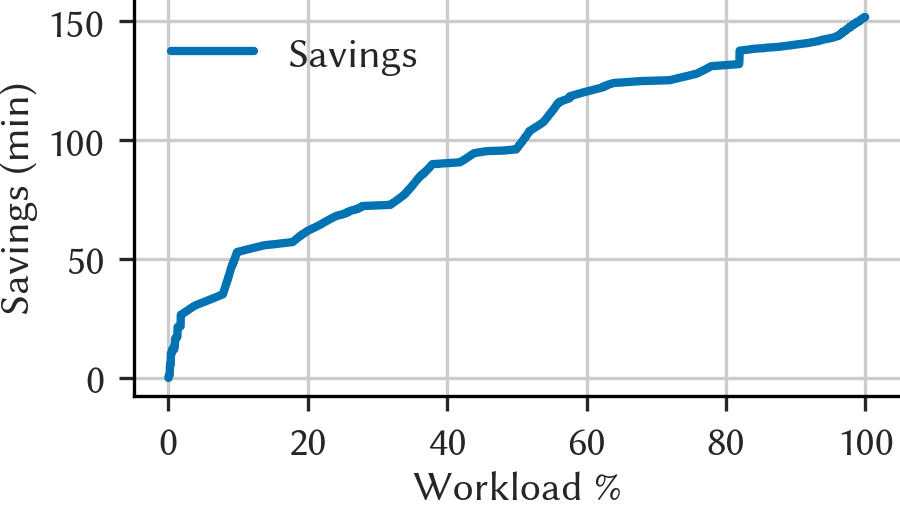

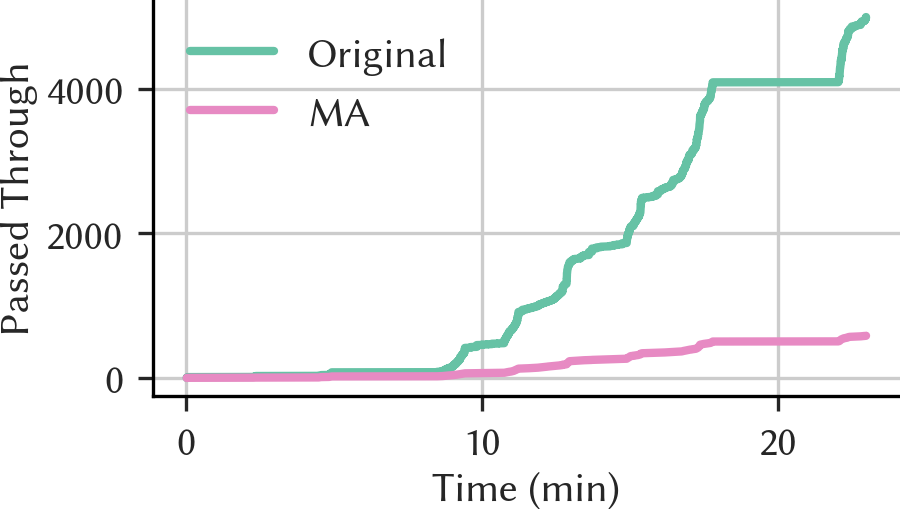

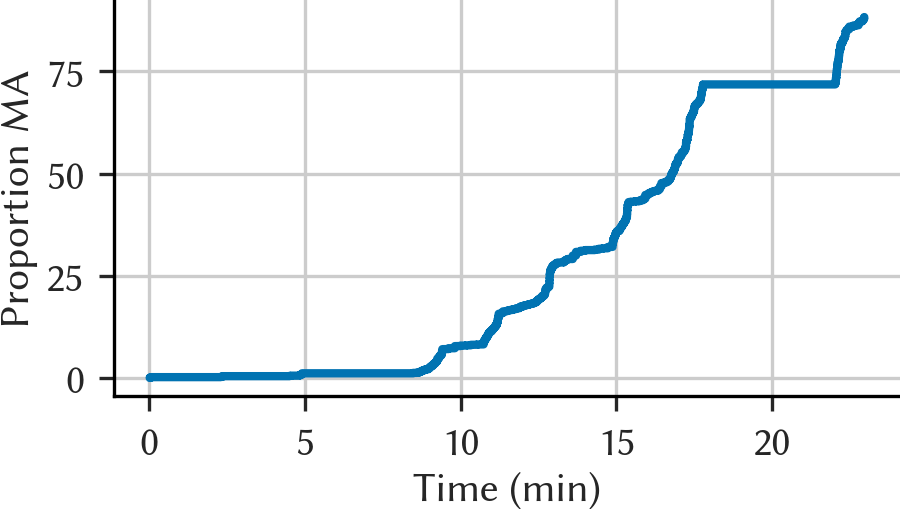

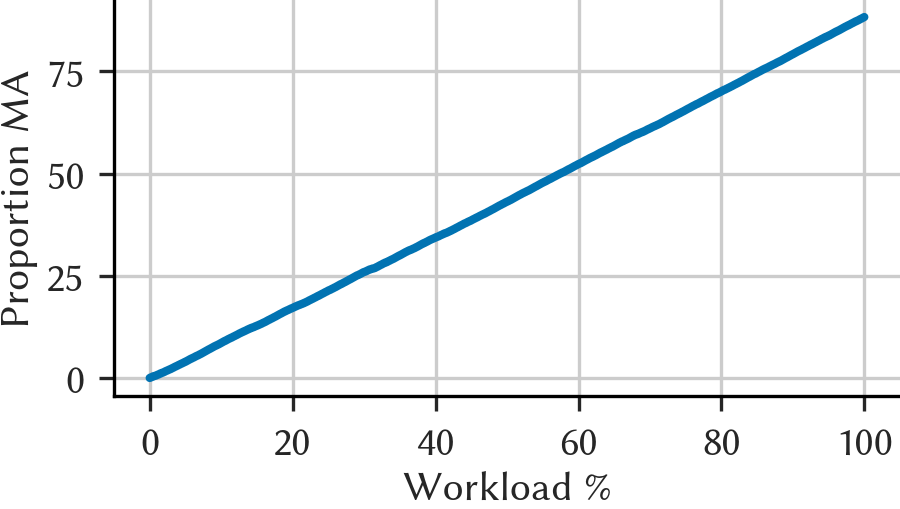

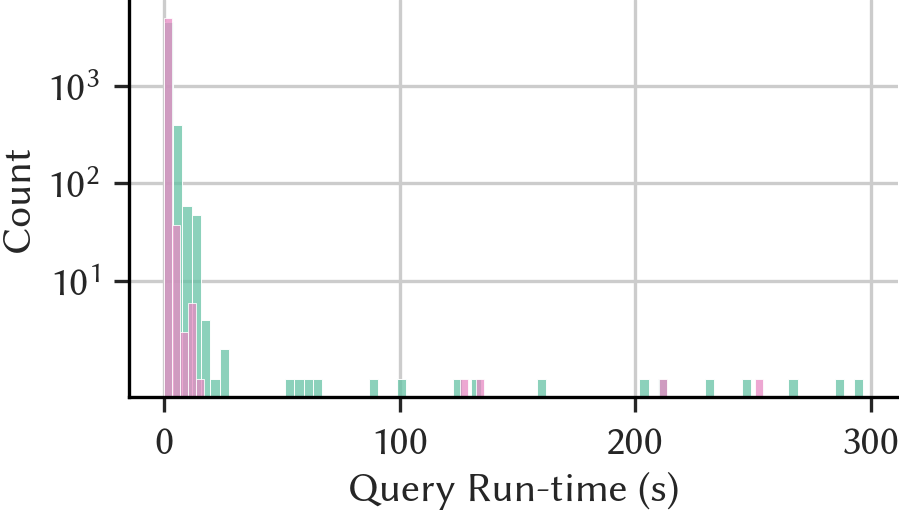

In [5]:
def plot_macacc_sens(expt_name):
    print(expt_name)
    
    fig_dir = PLOT_ROOT / f"results_{expt_name}"
    fig_dir.mkdir(exist_ok=True, parents=True)
    
    configs = [
        "default",
        "nts_b10_r15721",
        "sts_b10_r15721",
        'bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721',
        'bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721',
        'bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721',
    ]
    
    rename = {
        "default": "Original",
        "nts_b10_r15721": "Automatic",
        "sts_b10_r15721": "Manual",
        "bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721": "µA",
        "bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721": "MA",
        "bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721": "Combined",
        "bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721": "C10",
    }
    colors = {c: col for c, col in zip(configs, sns.color_palette("Set2"))}
    
    configs = ["default", "bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721"]
    names = [rename[c] for c in configs]
    
    def bytejacked(fp):
        prefix = r"{'Bytejack': 'true',"
        fp = Path(fp)
        if not fp.exists():
            return False
        with open(fp) as f:
            for line in f:
                return line.startswith(prefix)
        return False

    rqs_df = pd.read_csv(MODEL_ROOT / f"{expt_name}/runtime_query_seed.csv")
    if "dsb" in expt_name:
        rqs_df["Query"] = rqs_df.Query.astype(str)
        rqs_df["Qsort1"] = rqs_df.Query.str.split("-").apply(lambda x: x[0]).astype(str)
        rqs_df["Qsort2"] = rqs_df.Query.str.split("-").apply(lambda x: x[1]).astype(int)
        rqs_df["Qsort3"] = rqs_df.Query.str.split("-").apply(lambda x: x[2]).astype(int)
        rqs_df = rqs_df[rqs_df.Seed == 15721]
        rqs_df = rqs_df.sort_values(["Seed", "Qsort1", "Qsort2", "Qsort3"])
        rqs_df["fp"] = rqs_df.apply(lambda row: ARTIFACT_ROOT / f"experiment/bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721/dsb/sf_10/default/{row.Seed}/{row.Qsort1}-{row.Qsort2}-{row.Qsort3}.res", axis=1)
        rqs_df["Bytejack"] = rqs_df["fp"].apply(bytejacked)
    else:
        rqs_df["Qnum1"] = rqs_df.Query.str.split("-").apply(lambda x: x[0]).astype(int)
        rqs_df["Qnum2"] = rqs_df.Query.str.split("-").apply(lambda x: x[1]).astype(int)
        rqs_df = rqs_df.sort_values(["Seed", "Qnum1", "Qnum2"])
        rqs_df["fp"] = rqs_df.apply(lambda row: ARTIFACT_ROOT / f"experiment/bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721/tpch/sf_100/{row.Seed}/{row.Qnum1}-{row.Qnum2}.res", axis=1)
        rqs_df["Bytejack"] = rqs_df["fp"].apply(bytejacked)
    rqs_df = rqs_df.reset_index(drop=True)
    rqs_df = rqs_df[["Query", "Seed", "Bytejack", "default", "bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721"]]
    rqs_df = rqs_df[~rqs_df.isin([300000]).any(axis=1)]
    print("Note: timeouts ignored.")
    rqs_df = rqs_df.reset_index(drop=True)
    display(rqs_df)

    # Remember: base timings in (ms)
    print("Activations")
    activations = rqs_df.Bytejack.cumsum().values
    display(activations)

    print("Proportion serviced")
    serviced = activations / rqs_df.shape[0] * 100
    display(serviced)

    default = rqs_df.default.cumsum() / 1e3
    bytejack = rqs_df.bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721.cumsum() / 1e3
    savings = default - bytejack
    
    display(default)
    display(bytejack)
    display(savings)

    if "tpch" in expt_name:
        fig, ax = plt.subplots(nrows=1, ncols=1)
        s = pd.Series(rqs_df.index.values / rqs_df.shape[0] * 100, index=default.values / (60 * 60), name="Original")
        s.plot(ax=ax, color=colors["default"])
        s = pd.Series(rqs_df.index.values / rqs_df.shape[0] * 100, index=bytejack.values / (60 * 60), name="MA")
        s.plot(ax=ax, color=colors["bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721"])
        ax.set_xlabel("Time (h)")
        ax.set_ylabel("Workload %")
    else:
        fig, ax = plt.subplots(nrows=1, ncols=1)
        s = pd.Series(rqs_df.index.values / rqs_df.shape[0] * 100, index=default.values / 60, name="Original")
        s.plot(ax=ax, color=colors["default"])
        s = pd.Series(rqs_df.index.values / rqs_df.shape[0] * 100, index=bytejack.values / 60, name="MA")
        s.plot(ax=ax, color=colors["bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721"])
        ax.set_xlabel("Time (min)")
        ax.set_ylabel("Workload %")
    ax.legend()
    h, l = ax.get_legend_handles_labels()
    make_legend(h, l, fig_dir / f"ma_legend.pdf", len(names))
    ax.legend_.remove()
    plt.tight_layout()
    plt.savefig(fig_dir / f"ma_sens_line.pdf")    
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    s = pd.Series((default - bytejack).values / 60, index=rqs_df.index.values / rqs_df.shape[0] * 100, name="Savings")
    s.plot(ax=ax)
    ax.set_ylabel("Savings (min)")
    ax.set_xlabel("Workload %")
    ax.legend()
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    s = pd.Series(rqs_df.index.values, index=bytejack / (60), name="Original")
    s.plot(ax=ax, color=colors["default"])
    s = pd.Series(rqs_df.index.values - activations, index=bytejack / (60), name="MA")
    s.plot(ax=ax, color=colors["bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721"])
    ax.set_ylabel("Passed Through")
    ax.set_xlabel("Time (min)")
    ax.legend()
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1)
    s = pd.Series(serviced, index=bytejack / (60))
    s.plot(ax=ax)
    ax.set_ylabel("Proportion MA")
    ax.set_xlabel("Time (min)")
    plt.show()
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    s = pd.Series(serviced, index=rqs_df.index.values / rqs_df.shape[0] * 100)
    s.plot(ax=ax)
    ax.set_ylabel("Proportion MA")
    ax.set_xlabel("Workload %")
    plt.show()

    fig_quarter()
    ax = sns.histplot(rqs_df["default"] / 1e3, bins=75, color=colors["default"])
    ax = sns.histplot(rqs_df["bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721"] / 1e3, bins=75, color=colors["bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721"], ax=ax)
    ax.set_xlabel("Query Run-time (s)")
    ax.set_yscale("log")
    ax.set_yticks([10**1, 10**2, 10**3])
    plt.tight_layout()
    plt.savefig(fig_dir / f"ma_sens_hist.pdf")
    plt.show()
    
    
plot_macacc_sens("tpch_sf_100")
plot_macacc_sens("dsb_sf_10")

tpch_sf_100
Before filter: 22000, after filter: 21000, removed: 1000 which is 4.55%.


Run-time (ms)  Collection Time (s)  Collection Time (min)
10    7.885520e+06          7885.519620             131.425327
20    9.008592e+06          9008.592463             150.143208
30    1.076391e+07         10763.906172             179.398436
40    1.325332e+07         13253.319846             220.888664
50    1.210451e+07         12104.506011             201.741767
60    1.862600e+07         18625.995817             310.433264
70    1.704560e+07         17045.603748             284.093396
80    1.749972e+07         17499.721984             291.662033
90    1.499629e+07         14996.286642             249.938111
100   1.506322e+07         15063.218233             251.053637
10    1.170169e+07         11701.687552             195.028126
20    1.566196e+07         15661.960779             261.032680
30    1.298465e+07         12984.645163             216.410753
40    1.296404e+07         12964.043613             216.067394
50    1.860482e+07         18604.821610             310.080360
60    1.464885e+07         14648.854318             244.147572
70    2.005123e+07         20051.234174             334.187236
80    1.589244e+07         15892.437031             264.873951
90    2.561612e+07         25616.115074             426.935251
100   1.856467e+07         18564.673596             309.411227
10    8.689274e+06          8689.273799             144.821230
20    8.368726e+06          8368.726407             139.478773
30    1.315496e+07         13154.957694             219.249295
40    1.297099e+07         12970.993599             216.183227
50    1.419241e+07         14192.414471             236.540241
60    1.374479e+07         13744.788475             229.079808
70    1.751336e+07         17513.362313             291.889372
80    1.747251e+07         17472.512886             291.208548
90    1.688830e+07         16888.302452             281.471708
100   1.494489e+07         14944.886648             249.081444

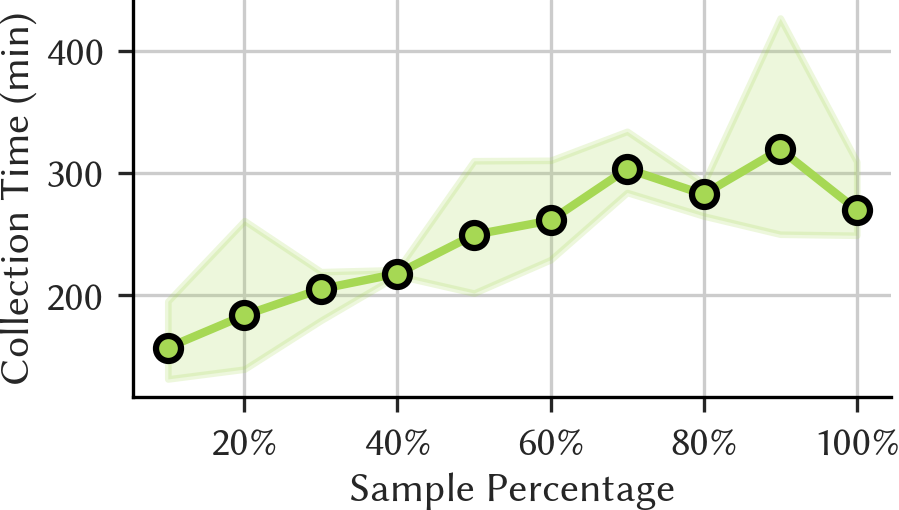

MAE (s)
10   48.695840
20   45.621987
30   44.155615
40   42.747802
50   39.530304
60   38.533595
70   36.671849
80   37.139690
90   36.517045
100  37.658361
10   46.584901
20   46.190969
30   44.368511
40   39.998637
50   40.797474
60   38.210613
70   37.439663
80   36.374384
90   36.118223
100  37.191369
10   50.196225
20   45.512047
30   45.356627
40   42.870919
50   41.868716
60   39.951077
70   37.292955
80   36.106478
90   37.068057
100  36.623605

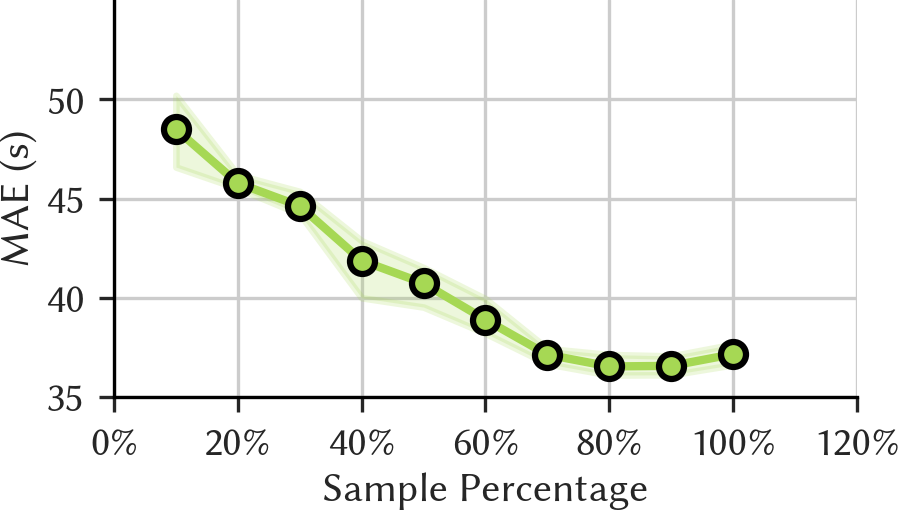

dsb_sf_10
Before filter: 10599, after filter: 10599, removed: 0 which is 0.00%.


Run-time (ms)  Collection Time (s)  Collection Time (min)
10      522972.529           522.972529               8.716209
20      692538.710           692.538710              11.542312
30      770593.754           770.593754              12.843229
40      843738.474           843.738474              14.062308
50      766703.495           766.703495              12.778392
60      774882.572           774.882572              12.914710
70      825962.932           825.962932              13.766049
80      870205.105           870.205105              14.503418
90      944488.604           944.488604              15.741477
100     996933.053           996.933053              16.615551
10      638852.264           638.852264              10.647538
20      713905.599           713.905599              11.898427
30      608156.680           608.156680              10.135945
40      652729.674           652.729674              10.878828
50      761431.050           761.431050              12.690518
60      922857.103           922.857103              15.380952
70      852647.663           852.647663              14.210794
80     1048918.775          1048.918775              17.481980
90      822219.319           822.219319              13.703655
100     932529.155           932.529155              15.542153
10      570792.078           570.792078               9.513201
20      659746.565           659.746565              10.995776
30      683038.739           683.038739              11.383979
40      781596.414           781.596414              13.026607
50      817619.010           817.619010              13.626983
60      892262.933           892.262933              14.871049
70      957718.953           957.718953              15.961983
80      934806.771           934.806771              15.580113
90      926666.027           926.666027              15.444434
100     931799.335           931.799335              15.529989

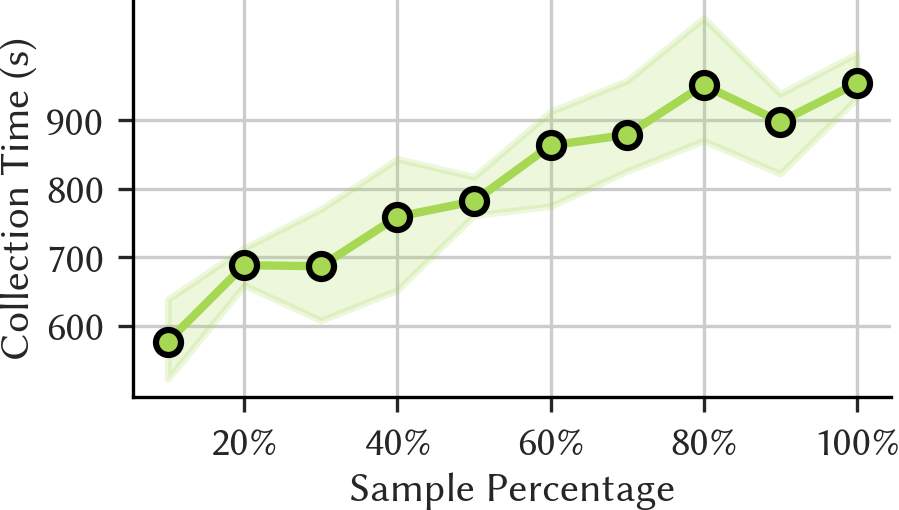

MAE (s)
10   1.271214
20   1.254440
30   1.195215
40   1.184249
50   1.168331
60   1.095024
70   1.058892
80   1.009826
90   1.005903
100  0.995262
10   1.302198
20   1.248969
30   1.237793
40   1.210505
50   1.109347
60   1.102332
70   1.063294
80   1.079167
90   1.008967
100  1.015330
10   1.258593
20   1.209948
30   1.206972
40   1.154067
50   1.128718
60   1.084519
70   1.057943
80   1.020657
90   1.035742
100  0.975959

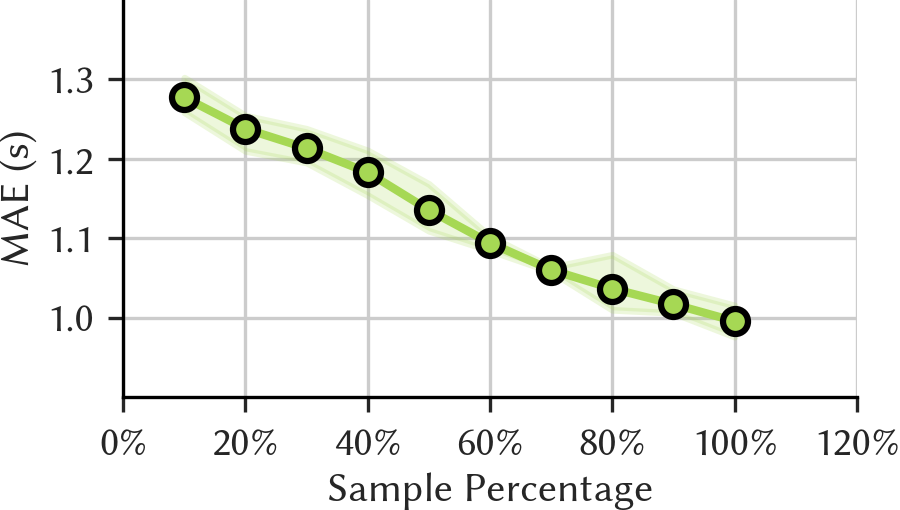

In [6]:
# muA Sensitivity
def plot_muacc_sens(expt_name):
    print(expt_name)
    
    fig_dir = PLOT_ROOT / f"results_{expt_name}"
    fig_dir.mkdir(exist_ok=True, parents=True)
    
    configs = [
        "default",
        "nts_b10_r15721",
        "sts_b10_r15721",
        'bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721',
        'bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721',
        'bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721',
    ]
    
    rename = {
        "default": "Original",
        "nts_b10_r15721": "Automatic",
        "sts_b10_r15721": "Manual",
        "bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721": "µA",
        "bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721": "MA",
        "bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721": "Combined",
        "bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721": "C10",
    }
    colors = {c: col for c, col in zip(configs, sns.color_palette("Set2"))}
    
    if "dsb" in expt_name:
        configs = [x for x in configs if "ts_b10" not in x]
    
    names = [rename[c] for c in configs]
    
    configs = [
        *[f"bytejack_e1_iea1_ic1_es1_ss1_ssp{n}_sss15721" for n in range(10,101,10)],
        *[f"bytejack_e1_iea1_ic1_es1_ss1_ssp{n}_sss15722" for n in range(10,101,10)],
        *[f"bytejack_e1_iea1_ic1_es1_ss1_ssp{n}_sss15723" for n in range(10,101,10)],
    ]

    df = pd.read_csv(MODEL_ROOT / f"{expt_name}/runtime_query_seed.csv")
    df = df[configs]
    # Remove the entries that timed out to avoid misleading implications.
    len_old = df.shape[0]
    df = df[~df.isin([300000]).any(1)]
    len_new = df.shape[0]
    print(f"Before filter: {len_old}, after filter: {len_new}, removed: {len_old - len_new} which is {(len_old - len_new) / len_old * 100:.2f}%.")
    df = df[configs].sum()
    df.index = list(range(10,101,10)) + list(range(10,101,10)) + list(range(10,101,10))
    df = df.to_frame(name="Run-time (ms)")
    df["Collection Time (s)"] = df["Run-time (ms)"] / 1000
    df["Collection Time (min)"] = df["Run-time (ms)"] / (1000 * 60)
    display(df)
    runtime_target = "Collection Time (min)" if "tpch" in expt_name else "Collection Time (s)"
    ax = sns.lineplot(x=df.index, y=df[runtime_target], color=colors["bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721"], marker="o", markeredgecolor="black")
    ax.xaxis.set_major_formatter(PercentFormatter())
    ax.set_xlabel("Sample Percentage")
    
    if expt_name == "dsb_sf_10":
        ax.set_yticks([600, 700, 800, 900])
    
    plt.tight_layout()
    plt.savefig(fig_dir / f"mu_sens_runtime.pdf")
    plt.show()
        
    df = pd.read_csv(MODEL_ROOT / f"{expt_name}/summary.csv")
    df = df.set_index("Experiment").T
    df = df[configs].T
    df.index = list(range(10,101,10)) + list(range(10,101,10)) + list(range(10,101,10))
    display(df[["MAE (s)"]])
    ax = sns.lineplot(x=df.index, y=df["MAE (s)"], color=colors["bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721"], marker="o", markeredgecolor="black")
    ax.set_xticks(ax.get_xticks()) # lol.
    ax.set_yticks(ax.get_yticks())
    ax.set_xticklabels([x.get_text() + "%" for x in ax.get_xticklabels()])
    ax.set_xlabel("Sample Percentage")
    
    if expt_name == "tpch_sf_100":
        ax.set_yticks([35,40,45,50])
    elif expt_name == "dsb_sf_10":
        ax.set_yticks([1.0, 1.1, 1.2, 1.3])
    
    plt.tight_layout()
    plt.savefig(fig_dir / f"mu_sens_mae.pdf")
    plt.show()
    
plot_muacc_sens("tpch_sf_100")
plot_muacc_sens("dsb_sf_10")

Experiment          Config    FP   Time (hr)
0         µA  TPC-H (SF 100)   999   83.250000
1         MA      DSB (SF 1)     6    0.500000
2         MA     DSB (SF 10)   212   17.666667
3         MA  TPC-H (SF 100)  3000  250.000000
4   Combined  TPC-H (SF 100)  1000   83.333333
5   Original      DSB (SF 1)    56    4.666667
6   Original     DSB (SF 10)   627   52.250000
7   Original  TPC-H (SF 100)  2983  248.583333

HACK


Experiment          Config    FP   Time (hr)  tpch10raw  tpch100raw  \
0          µA  TPC-H (SF 100)   999   83.250000  35.100558  584.545415   
1          MA      DSB (SF 1)     6    0.500000  35.100558  584.545415   
2          MA     DSB (SF 10)   212   17.666667  35.100558  584.545415   
3          MA  TPC-H (SF 100)  3000  250.000000  35.100558  584.545415   
4    Combined  TPC-H (SF 100)  1000   83.333333  35.100558  584.545415   
5    Original      DSB (SF 1)    56    4.666667  35.100558  584.545415   
6    Original     DSB (SF 10)   627   52.250000  35.100558  584.545415   
7    Original  TPC-H (SF 100)  2983  248.583333  35.100558  584.545415   
8          µA     DSB (SF 10)     0    0.000000  35.100558  584.545415   
9    Combined     DSB (SF 10)     0    0.000000  35.100558  584.545415   
10         µA      DSB (SF 1)     0    0.000000  35.100558  584.545415   
11   Combined      DSB (SF 1)     0    0.000000  35.100558  584.545415   

      dsb1raw   dsb10raw  tpch10norm  tpch100norm     dsb1norm   dsb10norm  
0   16.262821  56.906726  237.175717    14.241836   511.903792  146.292023  
1   16.262821  56.906726    1.424479     0.085537     3.074497    0.878631  
2   16.262821  56.906726   50.331584     3.022292   108.632236   31.044954  
3   16.262821  56.906726  712.239390    42.768277  1537.248626  439.315384  
4   16.262821  56.906726  237.413130    14.256092   512.416209  146.438461  
5   16.262821  56.906726   13.295135     0.798341    28.695308    8.200554  
6   16.262821  56.906726  148.858033     8.938570   321.284963   91.816915  
7   16.262821  56.906726  708.203367    42.525923  1528.537551  436.825930  
8   16.262821  56.906726    0.000000     0.000000     0.000000    0.000000  
9   16.262821  56.906726    0.000000     0.000000     0.000000    0.000000  
10  16.262821  56.906726    0.000000     0.000000     0.000000    0.000000  
11  16.262821  56.906726    0.000000     0.000000     0.000000    0.000000

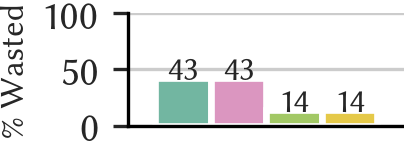

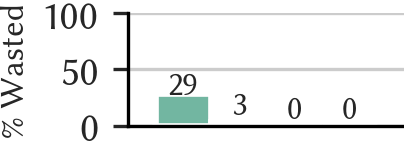

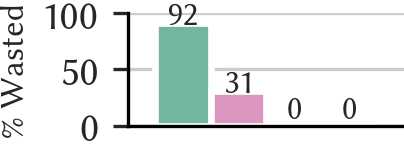

In [7]:
def plot_timeouts():
    fig_dir = PLOT_ROOT / f"results_combined"
    fig_dir.mkdir(exist_ok=True, parents=True)
    
    configs = [
        "default",
        "nts_b10_r15721",
        "sts_b10_r15721",
        'bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721',
        'bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721',
        'bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721',
    ]

    rename = {
        "default": "Original",
        "nts_b10_r15721": "Automatic",
        "sts_b10_r15721": "Manual",
        "bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721": "µA",
        "bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721": "MA",
        "bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721": "Combined",
        "bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721": "C10",
    }
    colors = {rename[c]: col for c, col in zip(configs, sns.color_palette("Set2"))}

    configs = [x for x in configs if "ts_b" not in x]
    
    names = [rename[c] for c in configs]
    
    timeouts = []
    for expt_name in configs:
        for benchmark in ["tpch", "dsb"]:
            sfs = [1,10] if benchmark == "dsb" else [10,100]
            for sf in sfs:
                for fp in Path(f"./artifact/experiment/{expt_name}/{benchmark}/sf_{sf}/").glob("**/*.timeout"):
                    query = fp.stem
                    seed = fp.parent.name
                    config = ("DSB" if benchmark == "dsb" else "TPC-H") + f" (SF {sf})"
                    timeouts.append((expt_name, config, benchmark, sf, seed, query, fp))
    timeouts = pd.DataFrame(timeouts, columns=["Experiment", "Config", "Benchmark", "SF", "Seed", "Query", "FP"])
    timeouts = timeouts.groupby(["Experiment", "Config"])["FP"].count().reset_index()
    timeouts["Time (hr)"] = timeouts["FP"] * 300 / (60 * 60)
    timeouts["Experiment"] = timeouts["Experiment"].map(rename)
    display(timeouts)
    print("HACK") # instead of figuring out the pandas invocation...
    timeouts.loc[len(timeouts)] = ["µA", "DSB (SF 10)", 0, 0]
    timeouts.loc[len(timeouts)] = ["Combined", "DSB (SF 10)", 0, 0]
    timeouts.loc[len(timeouts)] = ["µA", "DSB (SF 1)", 0, 0]
    timeouts.loc[len(timeouts)] = ["Combined", "DSB (SF 1)", 0, 0]
    timeouts["tpch10raw"] = 126362008.64600001 / (1000 * 60 * 60)
    timeouts["tpch100raw"] = 2104363495.608 / (1000 * 60 * 60)
    timeouts["dsb1raw"] = 58546157.383 / (1000 * 60 * 60)
    timeouts["dsb10raw"] = 204864211.931 / (1000 * 60 * 60)
    timeouts["tpch10norm"] = timeouts["Time (hr)"] / timeouts["tpch10raw"] * 100
    timeouts["tpch100norm"] = timeouts["Time (hr)"] / timeouts["tpch100raw"] * 100
    timeouts["dsb1norm"] = timeouts["Time (hr)"] / timeouts["dsb1raw"] * 100
    timeouts["dsb10norm"] = timeouts["Time (hr)"] / timeouts["dsb10raw"] * 100
    display(timeouts)
    
    fig_quarter()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_quarter[0] / 2, .4))
    ax = sns.barplot(data=timeouts[timeouts.Config == "TPC-H (SF 100)"], x="Config", y="tpch100norm", hue="Experiment", hue_order=names, palette=colors, ax=ax)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f", padding=-1.1, fontsize=4)
    ax.set_yticks([0, 50, 100])
    ax.set_xlabel("")
    ax.set(xticklabels=[])
    ax.set_ylabel("% Wasted", fontsize=4)
    ax.tick_params(bottom=False)
    ax.legend_.remove()
    plt.savefig(fig_dir / "timeout_tpch_100.pdf")
    plt.show()
    
    fig_quarter()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_quarter[0] / 2, .4))
    ax = sns.barplot(data=timeouts[timeouts.Config == "DSB (SF 1)"], x="Config", y="dsb1norm", hue="Experiment", hue_order=names, palette=colors, ax=ax)
    for i, container in enumerate(ax.containers):
        ax.bar_label(container, fmt="%.0f", padding=-1.1 if i <= 0 else 0, fontsize=4)
    ax.set_yticks([0, 50, 100])
    ax.set_xlabel("")
    ax.set(xticklabels=[])
    ax.set_ylabel("% Wasted", fontsize=4)
    ax.tick_params(bottom=False)
    ax.legend_.remove()
    plt.savefig(fig_dir / "timeout_dsb_1.pdf")
    plt.show()
    
    fig_quarter()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_quarter[0] / 2, .4))
    ax = sns.barplot(data=timeouts[timeouts.Config == "DSB (SF 10)"], x="Config", y="dsb10norm", hue="Experiment", hue_order=names, palette=colors, ax=ax)
    for i, container in enumerate(ax.containers):
        ax.bar_label(container, fmt="%.0f", padding=-1.1 if i <= 1 else 0, fontsize=4)
    ax.set_yticks([0, 50, 100])
    ax.set_xlabel("")
    ax.set(xticklabels=[])
    ax.set_ylabel("% Wasted", fontsize=4)
    ax.tick_params(bottom=False)
    ax.legend_.remove()
    plt.savefig(fig_dir / "timeout_dsb_10.pdf")
    plt.show()
    
plot_timeouts()

tpch_sf_10


Experiment         Node Type   Original            µA      Time (s)     Ratio
4                 Index Scan  54053.364  41938.225653  12115.138347  1.288881
0                  Aggregate  20705.105  15725.268153   4979.836847  1.316677
6                 Merge Join   1889.228   1143.466000    745.762000  1.652194
8                   Seq Scan  15627.899  15064.134998    563.764002  1.037424
3                  Hash Join  12907.406  12407.827000    499.579000  1.040263
2               Gather Merge   4734.213   4262.522142    471.690858  1.110660
1           Bitmap Heap Scan    876.527    829.811000     46.716000  1.056297
7                Nested Loop   1366.666   1329.668947     36.997053  1.027824
9                       Sort    895.421    878.267999     17.153001  1.019530
5            Index-Only Scan    482.980    471.490000     11.490000  1.024370

Experiment  index         Node Type   Original            µA      Time (s)  \
2               6        Merge Join   1889.228   1143.466000    745.762000   
1               0         Aggregate  20705.105  15725.268153   4979.836847   
0               4        Index Scan  54053.364  41938.225653  12115.138347   
5               2      Gather Merge   4734.213   4262.522142    471.690858   
6               1  Bitmap Heap Scan    876.527    829.811000     46.716000   
4               3         Hash Join  12907.406  12407.827000    499.579000   
3               8          Seq Scan  15627.899  15064.134998    563.764002   
7               7       Nested Loop   1366.666   1329.668947     36.997053   
9               5   Index-Only Scan    482.980    471.490000     11.490000   
8               9              Sort    895.421    878.267999     17.153001   

Experiment     Ratio  
2           1.652194  
1           1.316677  
0           1.288881  
5           1.110660  
6           1.056297  
4           1.040263  
3           1.037424  
7           1.027824  
9           1.024370  
8           1.019530

Experiment    Node Type      Original            µA    Num Tuples     Ratio
0             Aggregate  9.067906e+10  5.997588e+10  3.070318e+10  1.511925
6            Merge Join  1.633850e+10  9.930724e+09  6.407777e+09  1.645248
3             Hash Join  7.169029e+10  7.049171e+10  1.198577e+09  1.017003
7           Nested Loop  2.276157e+09  2.242733e+09  3.342377e+07  1.014903

Experiment  index    Node Type      Original            µA    Num Tuples  \
1               6   Merge Join  1.633850e+10  9.930724e+09  6.407777e+09   
0               0    Aggregate  9.067906e+10  5.997588e+10  3.070318e+10   
2               3    Hash Join  7.169029e+10  7.049171e+10  1.198577e+09   
3               7  Nested Loop  2.276157e+09  2.242733e+09  3.342377e+07   

Experiment     Ratio  
1           1.645248  
0           1.511925  
2           1.017003  
3           1.014903

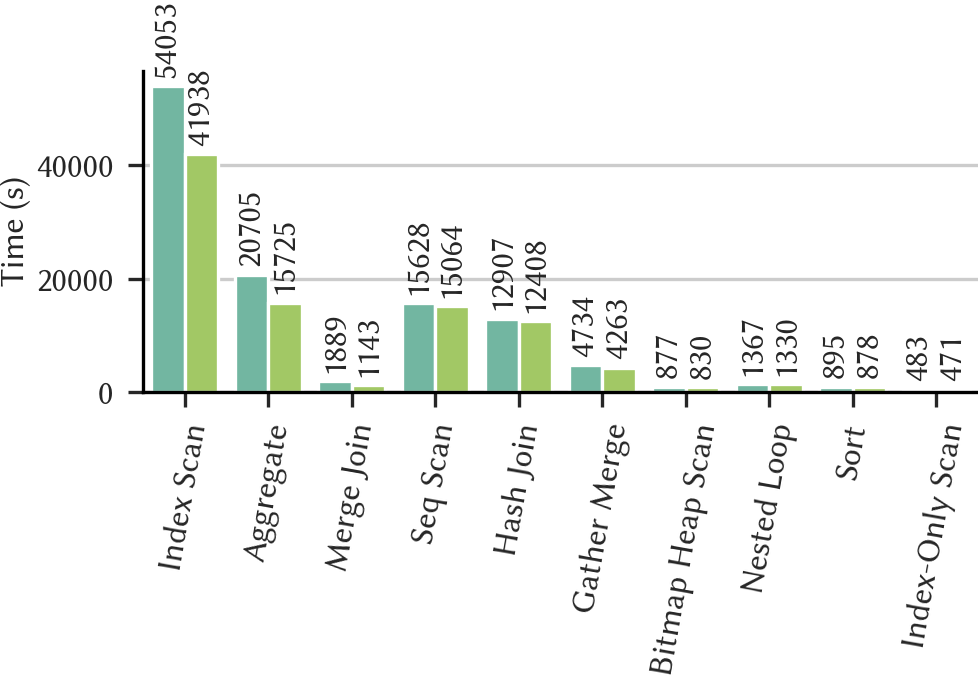

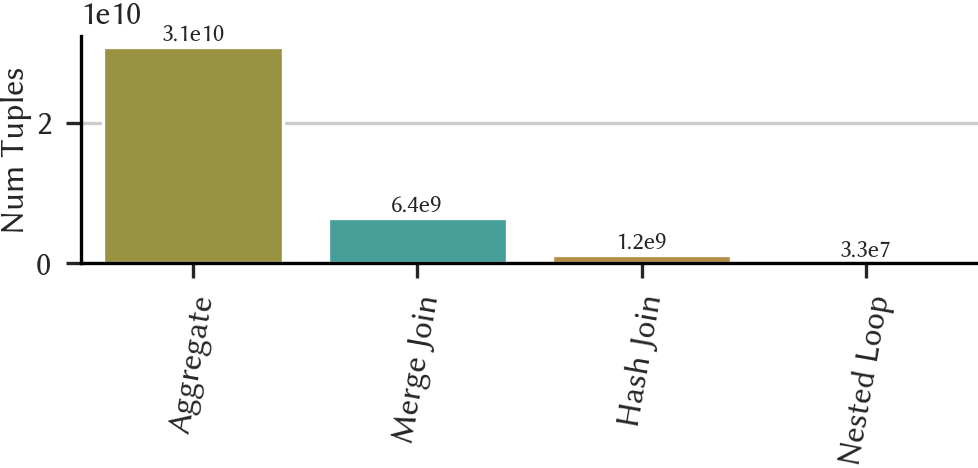

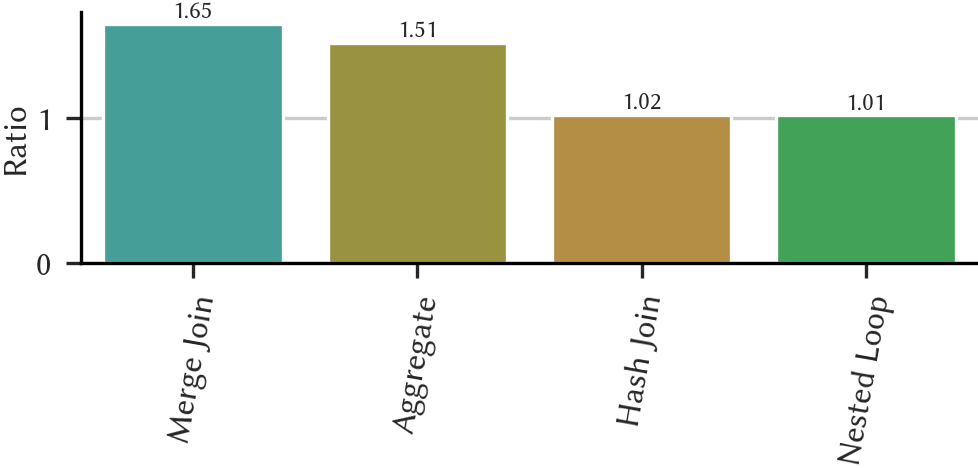

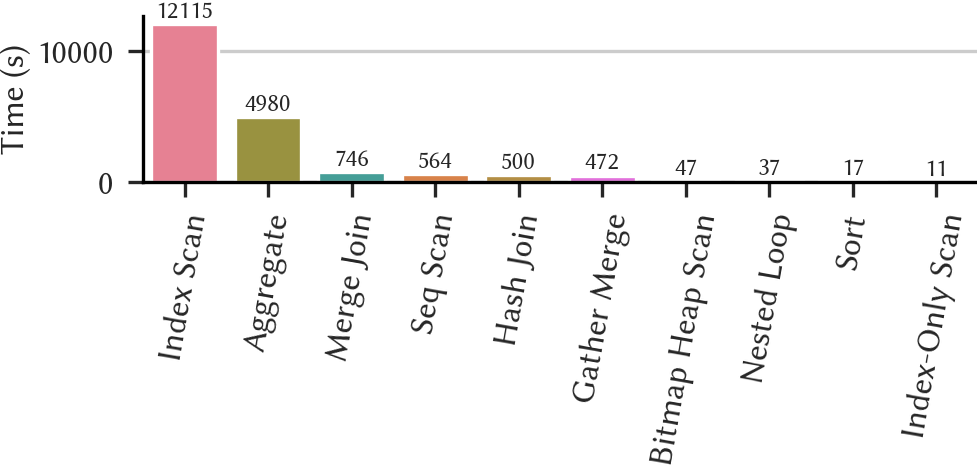

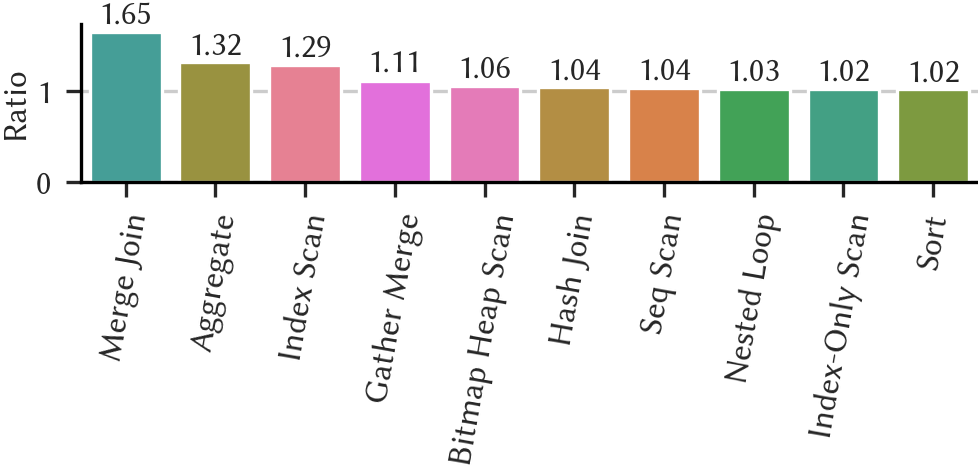

No data
tpch_sf_100


Experiment         Node Type    Original             µA       Time (s)  \
5                 Index Scan  611783.932  104415.015247  507368.916753   
11                  Seq Scan  245237.421  169213.682232   76023.738768   
4                  Hash Join  101264.467   63743.800993   37520.666007   
0                  Aggregate   84034.787   48611.162048   35423.624952   
12                      Sort   46151.728   13762.864871   32388.863129   
10               Nested Loop   13886.620    2530.168999   11356.451001   
6            Index-Only Scan   15995.642    6178.739437    9816.902563   
9                 Merge Join    6100.328    1950.438000    4149.890000   
7                Materialize    1979.954     132.081000    1847.873000   
8                    Memoize     170.077     100.134000      69.943000   
1           Bitmap Heap Scan     181.503     131.642000      49.861000   
2                     Gather     108.691    2744.684928   -2635.993928   
3               Gather Merge    8137.192   24639.088149  -16501.896149   

Experiment      Ratio  
5            5.859157  
11           1.449277  
4            1.588617  
0            1.728714  
12           3.353352  
10           5.488416  
6            2.588820  
9            3.127671  
7           14.990453  
8            1.698494  
1            1.378762  
2            0.039601  
3            0.330255

Experiment  index         Node Type    Original             µA       Time (s)  \
8               7       Materialize    1979.954     132.081000    1847.873000   
0               5        Index Scan  611783.932  104415.015247  507368.916753   
5              10       Nested Loop   13886.620    2530.168999   11356.451001   
4              12              Sort   46151.728   13762.864871   32388.863129   
7               9        Merge Join    6100.328    1950.438000    4149.890000   
6               6   Index-Only Scan   15995.642    6178.739437    9816.902563   
3               0         Aggregate   84034.787   48611.162048   35423.624952   
9               8           Memoize     170.077     100.134000      69.943000   
2               4         Hash Join  101264.467   63743.800993   37520.666007   
1              11          Seq Scan  245237.421  169213.682232   76023.738768   
10              1  Bitmap Heap Scan     181.503     131.642000      49.861000   
12              3      Gather Merge    8137.192   24639.088149  -16501.896149   
11              2            Gather     108.691    2744.684928   -2635.993928   

Experiment      Ratio  
8           14.990453  
0            5.859157  
5            5.488416  
4            3.353352  
7            3.127671  
6            2.588820  
3            1.728714  
9            1.698494  
2            1.588617  
1            1.449277  
10           1.378762  
12           0.330255  
11           0.039601

Experiment     Node Type      Original            µA    Num Tuples      Ratio
4              Hash Join  7.326251e+11  4.369713e+11  2.956538e+11   1.676598
9             Merge Join  1.017887e+11  3.408635e+10  6.770237e+10   2.986202
0              Aggregate  1.245522e+11  7.550488e+10  4.904728e+10   1.649591
12                  Sort  3.830738e+10  1.096355e+10  2.734383e+10   3.494068
7            Materialize  1.599979e+10  4.954527e+08  1.550434e+10  32.293275
10           Nested Loop  7.964144e+09  5.676310e+09  2.287834e+09   1.403049
3           Gather Merge  3.696418e+09  2.581947e+09  1.114471e+09   1.431640
2                 Gather  7.664282e+07  3.348932e+07  4.315350e+07   2.288575

Experiment  index     Node Type      Original            µA    Num Tuples  \
4               7   Materialize  1.599979e+10  4.954527e+08  1.550434e+10   
3              12          Sort  3.830738e+10  1.096355e+10  2.734383e+10   
1               9    Merge Join  1.017887e+11  3.408635e+10  6.770237e+10   
7               2        Gather  7.664282e+07  3.348932e+07  4.315350e+07   
0               4     Hash Join  7.326251e+11  4.369713e+11  2.956538e+11   
2               0     Aggregate  1.245522e+11  7.550488e+10  4.904728e+10   
6               3  Gather Merge  3.696418e+09  2.581947e+09  1.114471e+09   
5              10   Nested Loop  7.964144e+09  5.676310e+09  2.287834e+09   

Experiment      Ratio  
4           32.293275  
3            3.494068  
1            2.986202  
7            2.288575  
0            1.676598  
2            1.649591  
6            1.431640  
5            1.403049

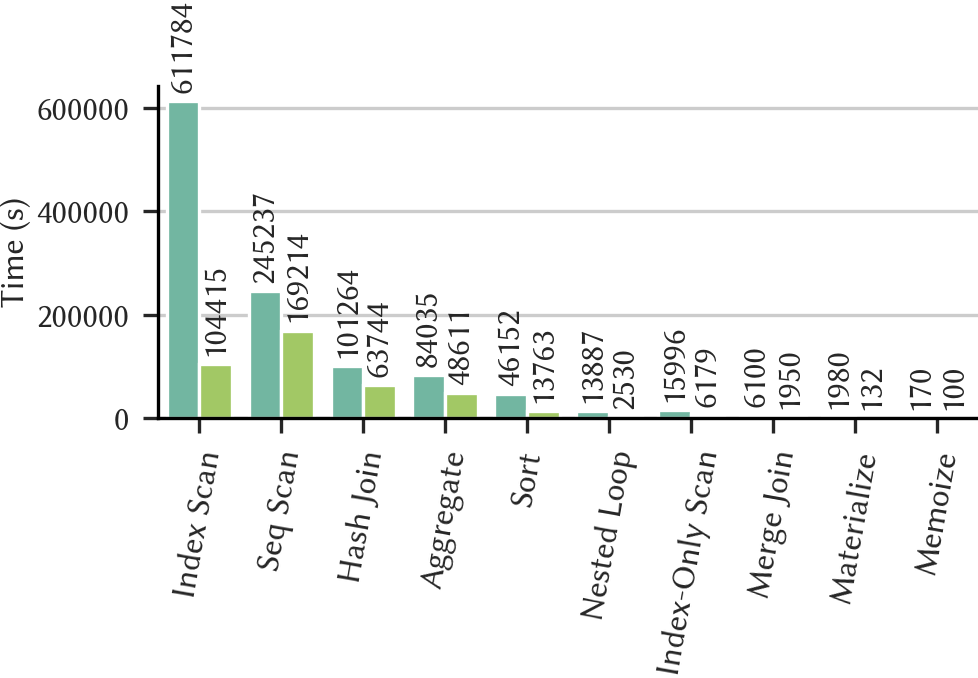

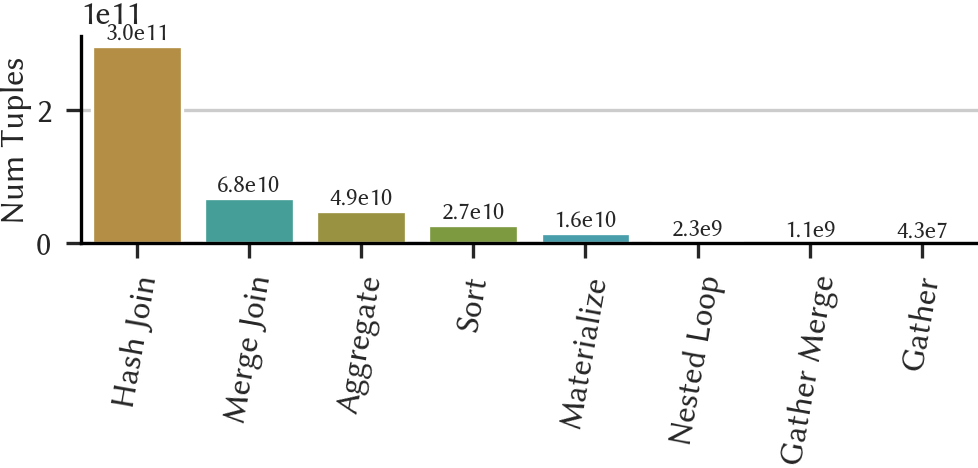

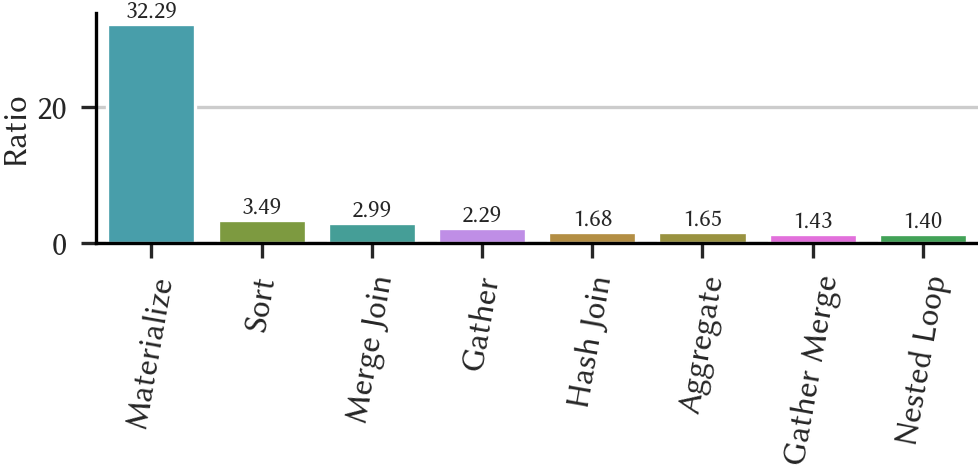

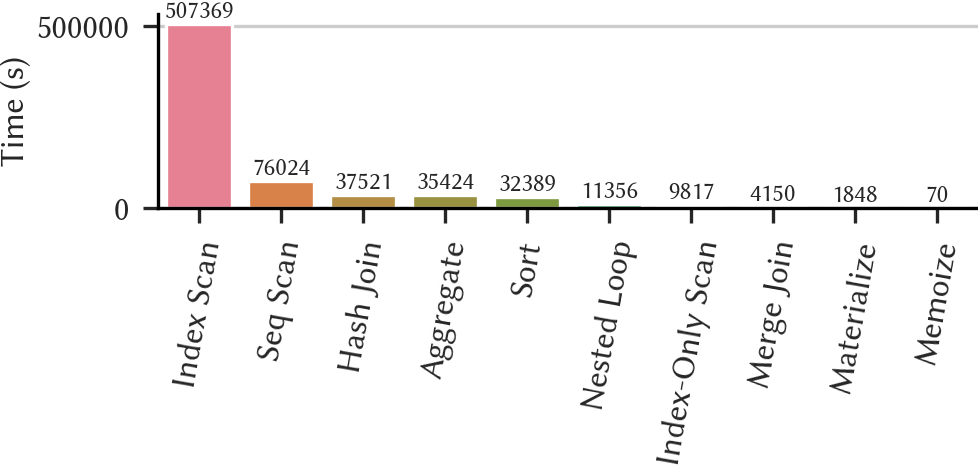

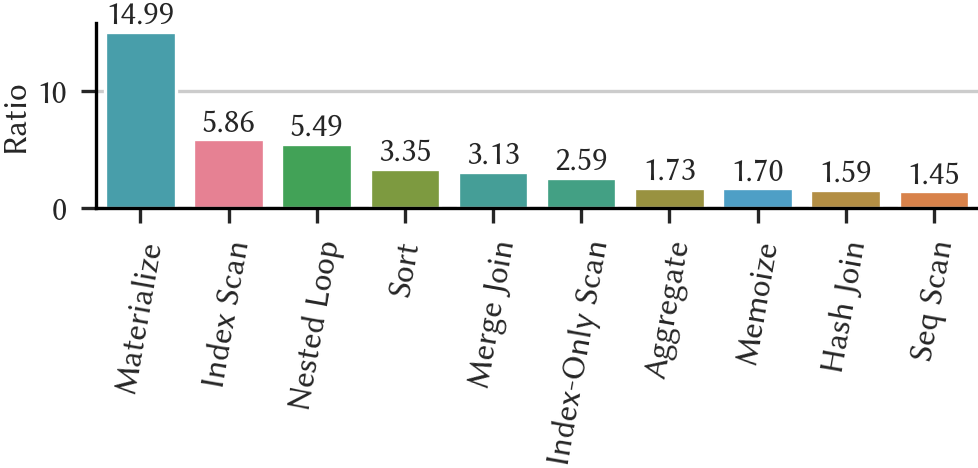

Experiment        Node Type  Operator Time
13         µA       Index Scan  113327.209000
15         µA       Merge Join    9504.930000
7          µA        Aggregate    6508.109998
11         µA        Hash Join    1731.495000
17         µA         Seq Scan    1024.733000
12         µA  Index-Only Scan    1023.181000
16         µA      Nested Loop     193.721002
8          µA           Gather     114.205305
9          µA     Gather Merge     113.935000

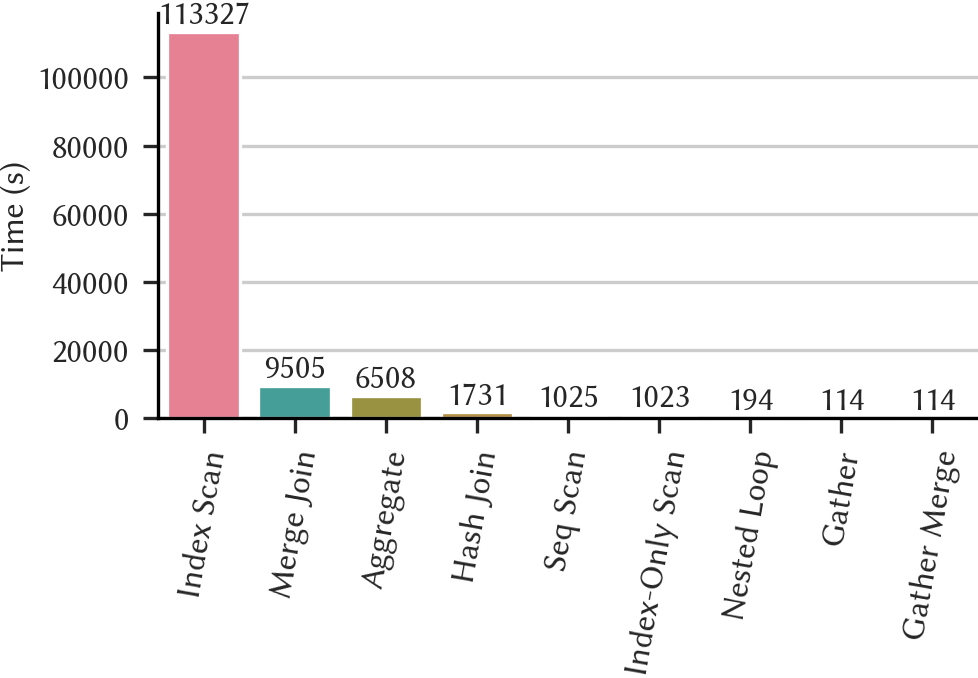

dsb_sf_1


Experiment        Node Type   Original          µA      Time (s)       Ratio
3                Index Scan  27232.679  519.971301  26712.707699   52.373427
1                  CTE Scan  13066.306   61.898972  13004.407028  211.090838
0                 Aggregate    523.348   56.690860    466.657140    9.231612
5               Nested Loop    341.738   71.368229    270.369771    4.788377
4           Index-Only Scan    343.068  129.102110    213.965890    2.657338
2                 Hash Join    171.633   79.798422     91.834578    2.150832
6                  Seq Scan    158.500   78.378004     80.121996    2.022251

Experiment  index        Node Type   Original          µA      Time (s)  \
1               1         CTE Scan  13066.306   61.898972  13004.407028   
0               3       Index Scan  27232.679  519.971301  26712.707699   
2               0        Aggregate    523.348   56.690860    466.657140   
3               5      Nested Loop    341.738   71.368229    270.369771   
4               4  Index-Only Scan    343.068  129.102110    213.965890   
5               2        Hash Join    171.633   79.798422     91.834578   
6               6         Seq Scan    158.500   78.378004     80.121996   

Experiment       Ratio  
1           211.090838  
0            52.373427  
2             9.231612  
3             4.788377  
4             2.657338  
5             2.150832  
6             2.022251

Experiment    Node Type     Original           µA   Num Tuples     Ratio
2             Hash Join  481537785.0  239933243.0  241604542.0  2.006966
5           Nested Loop  171429672.0   84291699.0   87137973.0  2.033767
0             Aggregate  168328508.0   84002902.0   84325606.0  2.003842
3            Index Scan      46702.0      23351.0      23351.0  2.000000
1              CTE Scan        388.0        194.0        194.0  2.000000

Experiment  index    Node Type     Original           µA   Num Tuples  \
1               5  Nested Loop  171429672.0   84291699.0   87137973.0   
0               2    Hash Join  481537785.0  239933243.0  241604542.0   
2               0    Aggregate  168328508.0   84002902.0   84325606.0   
3               3   Index Scan      46702.0      23351.0      23351.0   
4               1     CTE Scan        388.0        194.0        194.0   

Experiment     Ratio  
1           2.033767  
0           2.006966  
2           2.003842  
3           2.000000  
4           2.000000

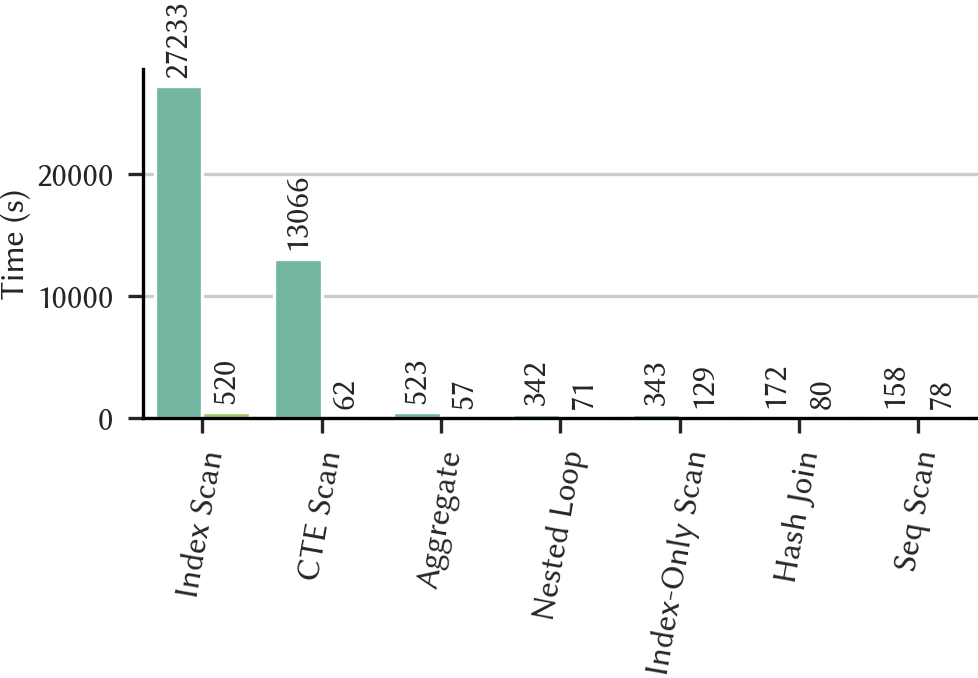

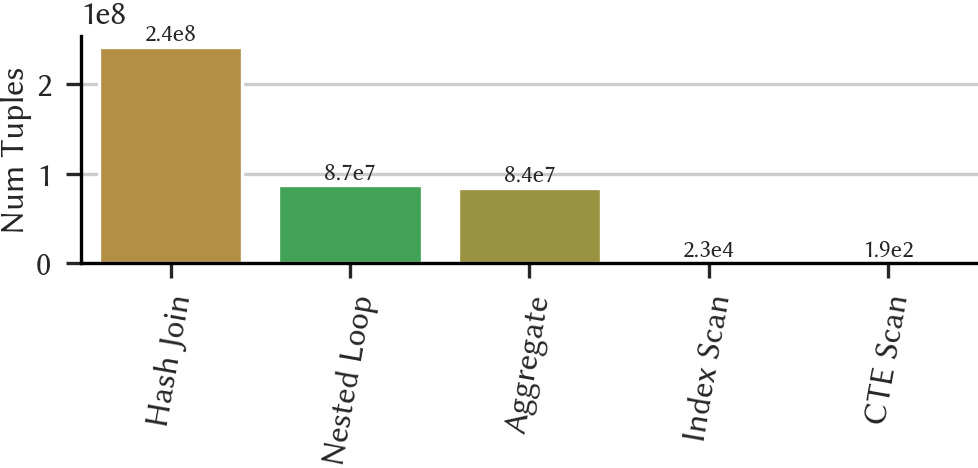

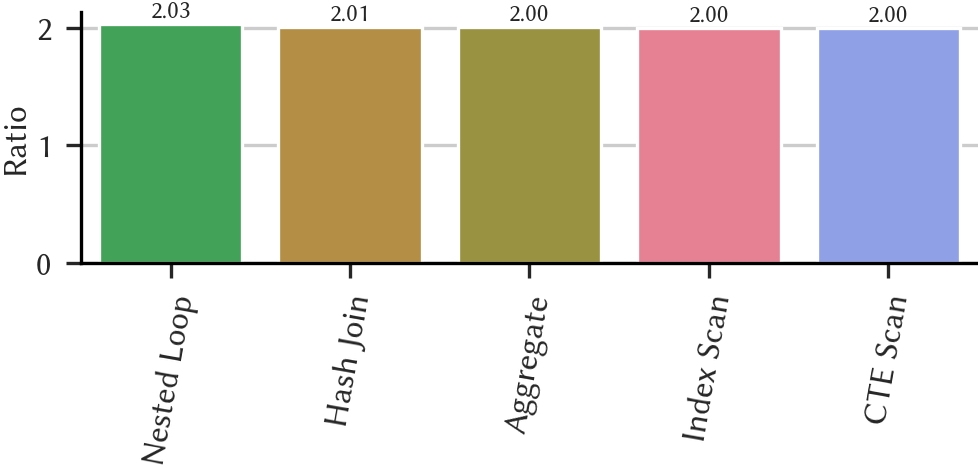

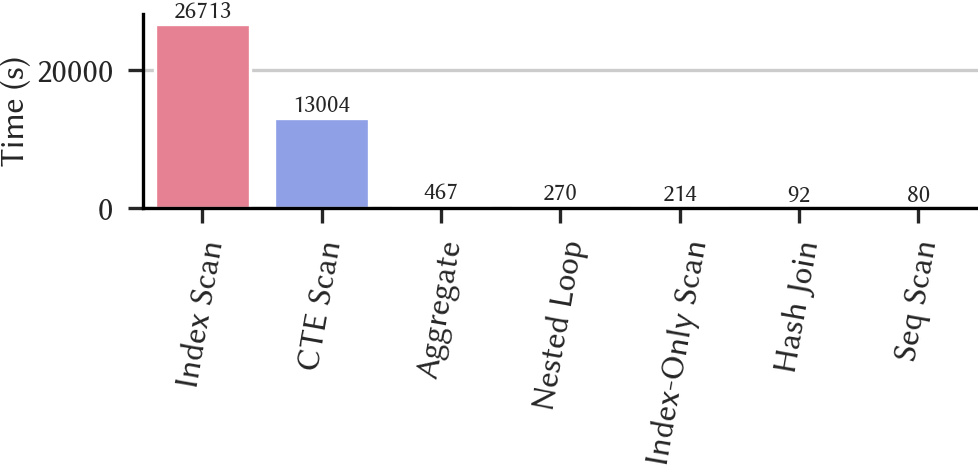

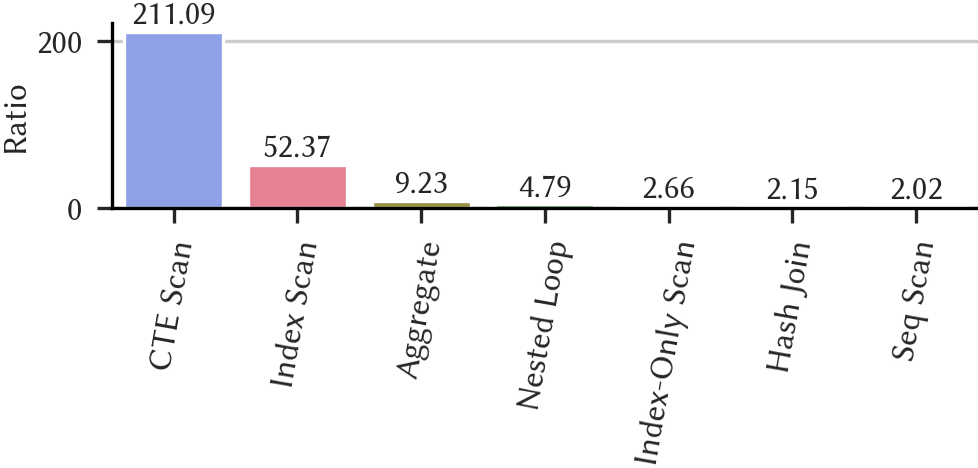

Experiment    Node Type  Operator Time
11         µA   Index Scan       5.405675
13         µA  Nested Loop       1.011000
10         µA    Hash Join       0.267000
14         µA     Seq Scan       0.231000
8          µA    Aggregate       0.184030

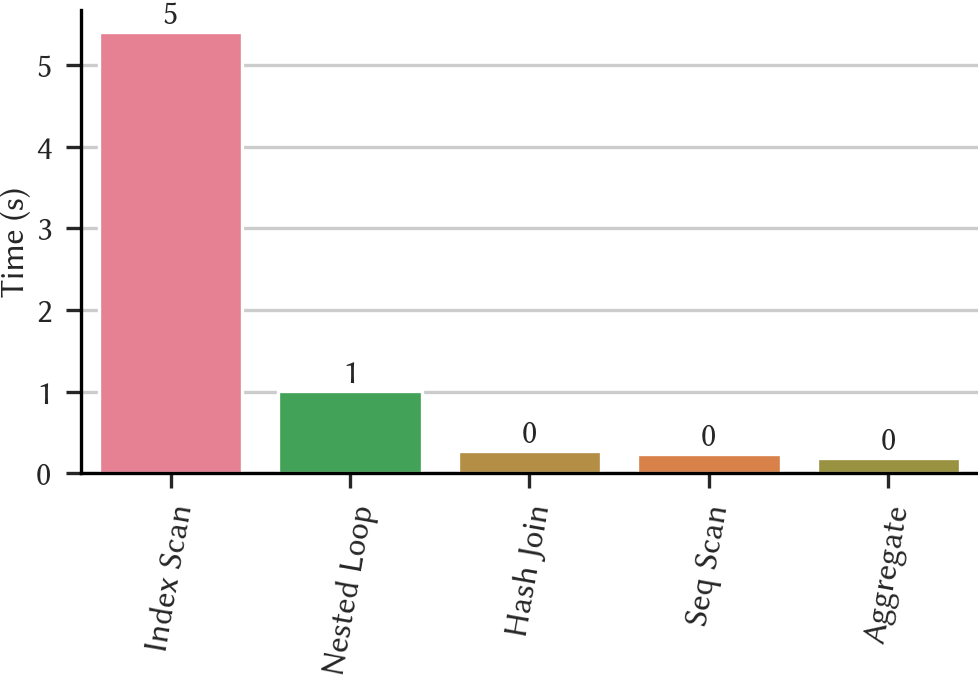

dsb_sf_10


Experiment        Node Type  Original           µA     Time (s)      Ratio
5                Index Scan  5531.723  2090.073349  3441.649651   2.646665
6           Index-Only Scan  2837.156   989.911621  1847.244379   2.866070
1                  CTE Scan  1696.485    92.980336  1603.504664  18.245632
2                    Gather  1293.370   498.233249   795.136751   2.595913
9                  Seq Scan  1181.777   508.171772   673.605228   2.325546
3              Gather Merge  1041.496   424.353450   617.142550   2.454313
8               Nested Loop   845.547   293.644737   551.902263   2.879490
0                 Aggregate   688.595   316.219701   372.375299   2.177584
4                 Hash Join   481.827   191.042026   290.784974   2.522100
10                     Sort   195.095    73.372720   121.722280   2.658958
7               Materialize   147.727    38.207848   109.519152   3.866405

Experiment  index        Node Type  Original           µA     Time (s)  \
2               1         CTE Scan  1696.485    92.980336  1603.504664   
10              7      Materialize   147.727    38.207848   109.519152   
6               8      Nested Loop   845.547   293.644737   551.902263   
1               6  Index-Only Scan  2837.156   989.911621  1847.244379   
9              10             Sort   195.095    73.372720   121.722280   
0               5       Index Scan  5531.723  2090.073349  3441.649651   
3               2           Gather  1293.370   498.233249   795.136751   
8               4        Hash Join   481.827   191.042026   290.784974   
5               3     Gather Merge  1041.496   424.353450   617.142550   
4               9         Seq Scan  1181.777   508.171772   673.605228   
7               0        Aggregate   688.595   316.219701   372.375299   

Experiment      Ratio  
2           18.245632  
10           3.866405  
6            2.879490  
1            2.866070  
9            2.658958  
0            2.646665  
3            2.595913  
8            2.522100  
5            2.454313  
4            2.325546  
7            2.177584

Experiment     Node Type      Original            µA    Num Tuples     Ratio
4              Hash Join  3.167779e+09  1.575601e+09  1.592178e+09  2.010521
0              Aggregate  1.884777e+09  9.423842e+08  9.423927e+08  2.000009
8            Nested Loop  1.227630e+09  6.113143e+08  6.163156e+08  2.008181
10                  Sort  2.692980e+08  1.345163e+08  1.347817e+08  2.001973
3           Gather Merge  1.627359e+08  8.137197e+07  8.136389e+07  1.999901
2                 Gather  1.169251e+08  5.846168e+07  5.846341e+07  2.000030
7            Materialize  7.788275e+07  3.892246e+07  3.896029e+07  2.000972
5             Index Scan  4.622700e+05  2.311350e+05  2.311350e+05  2.000000
1               CTE Scan  2.620000e+02  1.310000e+02  1.310000e+02  2.000000

Experiment  index     Node Type      Original            µA    Num Tuples  \
0               4     Hash Join  3.167779e+09  1.575601e+09  1.592178e+09   
2               8   Nested Loop  1.227630e+09  6.113143e+08  6.163156e+08   
3              10          Sort  2.692980e+08  1.345163e+08  1.347817e+08   
6               7   Materialize  7.788275e+07  3.892246e+07  3.896029e+07   
5               2        Gather  1.169251e+08  5.846168e+07  5.846341e+07   
1               0     Aggregate  1.884777e+09  9.423842e+08  9.423927e+08   
7               5    Index Scan  4.622700e+05  2.311350e+05  2.311350e+05   
8               1      CTE Scan  2.620000e+02  1.310000e+02  1.310000e+02   
4               3  Gather Merge  1.627359e+08  8.137197e+07  8.136389e+07   

Experiment     Ratio  
0           2.010521  
2           2.008181  
3           2.001973  
6           2.000972  
5           2.000030  
1           2.000009  
7           2.000000  
8           2.000000  
4           1.999901

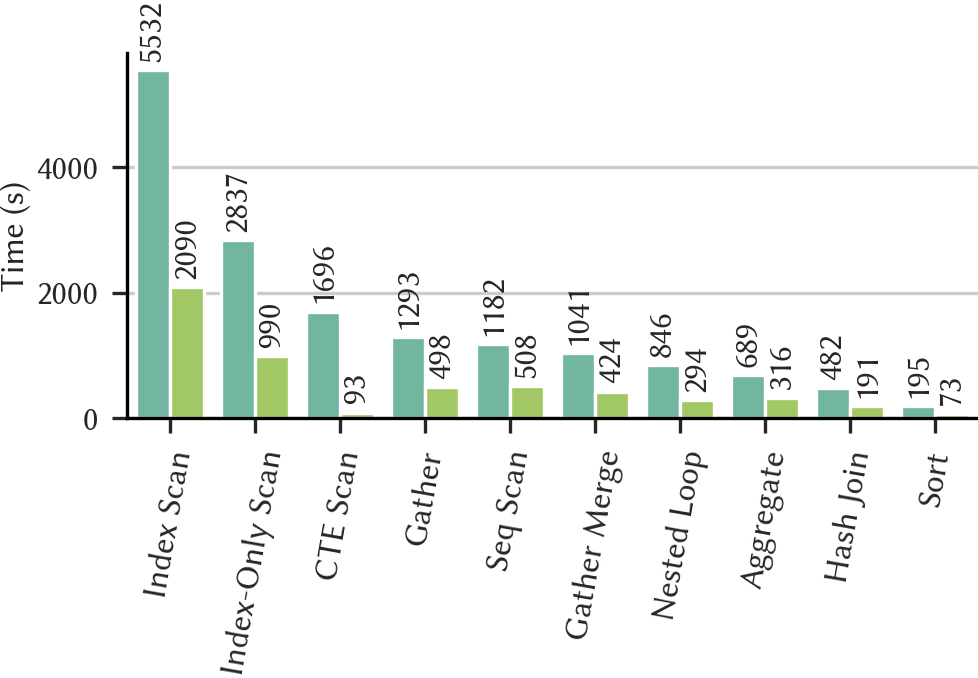

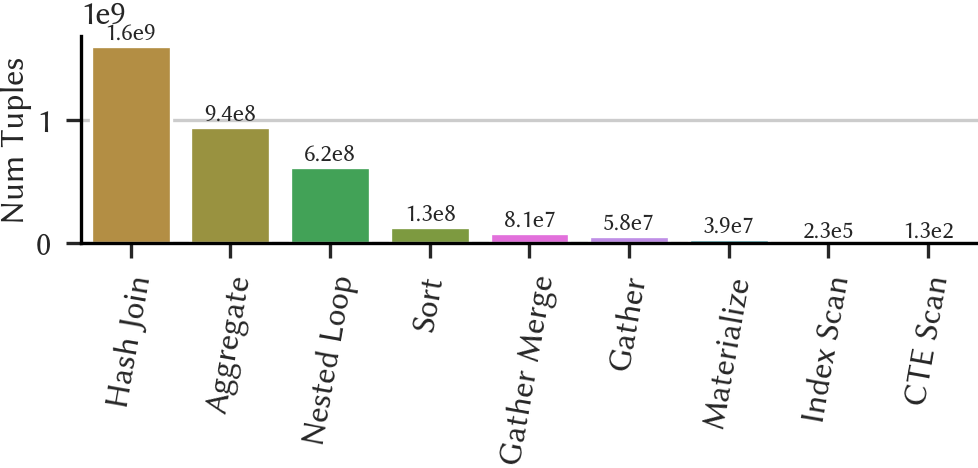

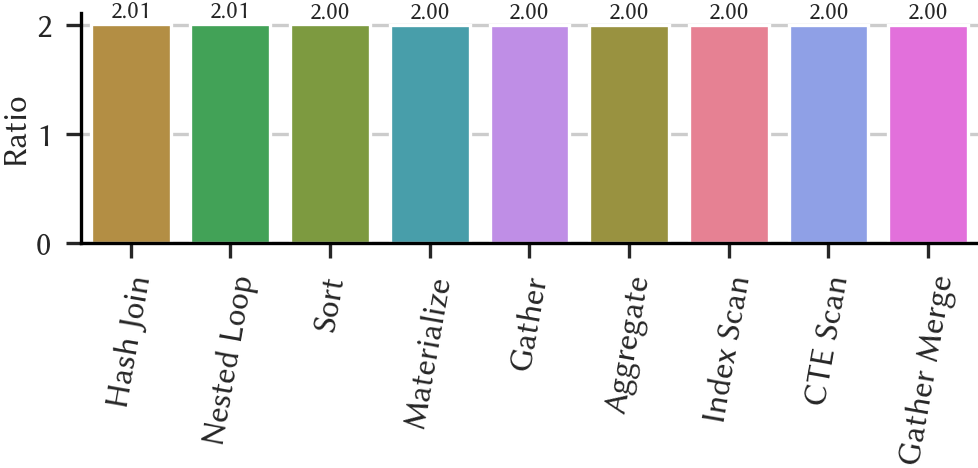

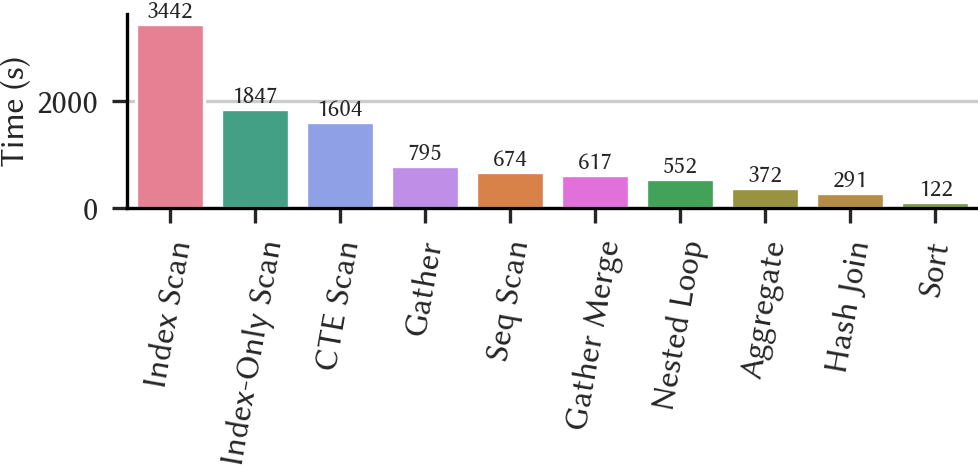

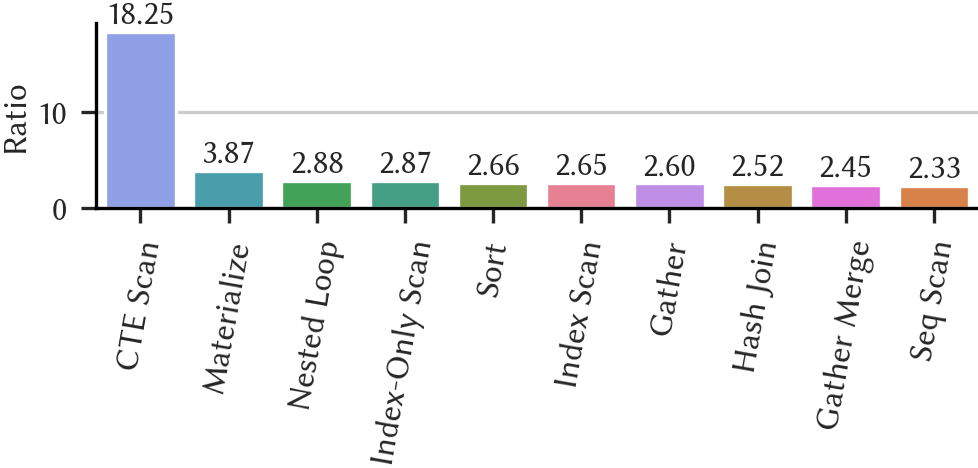

Experiment     Node Type  Operator Time
14         µA      CTE Scan     453.993542
13         µA     Aggregate      68.499199
21         µA    Index Scan      56.334964
18         µA     Hash Join      20.148000
25         µA      Seq Scan      14.919014
16         µA  Gather Merge      13.708000
24         µA   Nested Loop      13.621232
15         µA        Gather       6.548000
26         µA          Sort       3.317308

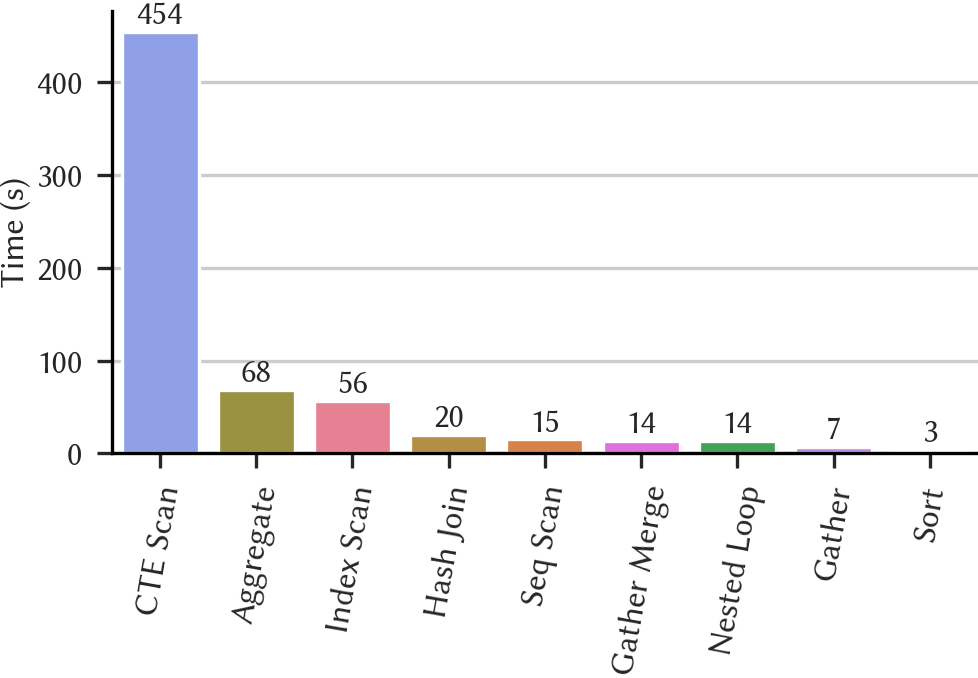

In [8]:
def plot_times(expt_name):
    print(expt_name)
    
    fig_dir = PLOT_ROOT / f"results_{expt_name}"
    fig_dir.mkdir(exist_ok=True, parents=True)
    
    configs = [
        "default",
        "nts_b10_r15721",
        "sts_b10_r15721",
        'bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721',
        'bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721',
        'bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721',
    ]

    rename = {
        "default": "Original",
        "nts_b10_r15721": "Automatic",
        "sts_b10_r15721": "Manual",
        "bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721": "µA",
        "bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721": "MA",
        "bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721": "Combined",
        "bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721": "C10",
    }
    colors = {rename[c]: col for c, col in zip(configs, sns.color_palette("Set2"))}

    configs = ["default", "bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721"]
    names = [rename[c] for c in configs]
    
    df = pd.read_parquet(f"artifact/cache/experiment_{expt_name}.pq")
    
    # tpch_sf_100 and dsb_sf_10
    node_types = ["Index Scan", "Seq Scan", "Hash Join", "Aggregate", "Sort", "Nested Loop", "Index-Only Scan", "Merge Join", "Materialize", "Memoize", "CTE Scan", "Gather", "Gather Merge", "Bitmap Heap Scan"]
    node_colors = {k:v for k, v in zip(node_types, sns.color_palette("husl", len(node_types)))}
    
    timeout_type = "no_timeout"
    sdf = df[(df.Bytejack == False) & (df.DefaultTimeout == False)]
    if len(sdf) == 0:
        print("No data")
    else:
        sdf = sdf.groupby(["Experiment", "Node Type"]).sum()
        sdf = sdf.reset_index()
        sdf["Node Type"] = sdf["Node Type"].apply(lambda x: x if x != "Index Only Scan" else "Index-Only Scan")
        sdf["Experiment"] = sdf["Experiment"].map(rename)
        fsdf = sdf[sdf.Experiment.isin(names)]

        heavy = sdf[(sdf.Experiment == "Original") & (sdf["Operator Time"] >= 100)]["Node Type"].unique()
        fsdf = fsdf[fsdf["Node Type"].isin(heavy)]
        fsdf = fsdf[fsdf.Experiment.isin(["Original", "µA"])]
        if len(fsdf) == 0:
            print("No data")
        else:
            pivotdf = pd.pivot(fsdf, index="Node Type", columns=["Experiment"], values="Operator Time")
            pivotdf["Time (s)"] = pivotdf["Original"] - pivotdf["µA"] # diff
            pivotdf["Ratio"] = pivotdf["Original"] / pivotdf["µA"]
            pivotdf = pivotdf.reset_index(drop=False).sort_values("Time (s)", ascending=False)
            display(pivotdf)
            difforder = pivotdf.head(10)["Node Type"].values
            pivotdf = pivotdf.reset_index(drop=False).sort_values("Ratio", ascending=False)
            display(pivotdf)
            ratioorder = pivotdf.head(10)["Node Type"].values
            
            pivotdf2 = pd.pivot(fsdf, index="Node Type", columns=["Experiment"], values="Actual Input Rows")
            pivotdf2["Num Tuples"] = pivotdf2["Original"] - pivotdf2["µA"]
            pivotdf2["Ratio"] = (pivotdf2["Original"] / pivotdf2["µA"]).astype(float)
            pivotdf2 = pivotdf2.reset_index(drop=False).sort_values("Num Tuples", ascending=False)
            pivotdf2 = pivotdf2[pivotdf2["Num Tuples"] > 0]
            display(pivotdf2)
            tuporder = pivotdf2.head(10)["Node Type"].values
            pivotdf2 = pivotdf2.reset_index(drop=False).sort_values("Ratio", ascending=False)
            display(pivotdf2)
            tupratioorder = pivotdf2.head(10)["Node Type"].values
            
            fig_half()
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_half[0], 2.5))
            ax = sns.barplot(data=fsdf, x="Node Type", y="Operator Time", hue="Experiment", hue_order=names, ax=ax, palette=colors, order=difforder)
            h, l = ax.get_legend_handles_labels()
            make_legend(h, l, fig_dir / f"legend_original_mu.pdf", len(names))
            ax.legend_.remove()
            ax.tick_params(axis="x", rotation=80)
            ax.set_xlabel("")
            ax.set_ylabel("Time (s)")
            ax.tick_params(axis="x", labelsize=8)
            for container in ax.containers:
                ax.bar_label(container, fmt="%.0f", padding=2, fontsize=8, rotation=90)
            plt.savefig(fig_dir / "operators_breakdown.pdf")
            plt.show()
            
            fig_half()
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_half[0], 1.8))
            ax = sns.barplot(data=pivotdf2, x="Node Type", y="Num Tuples", ax=ax, order=tuporder, palette=node_colors)
            ax.tick_params(axis="x", rotation=80)
            ax.set_xlabel("")
            ax.set_ylabel("Num Tuples")
            ax.tick_params(axis="x", labelsize=8)
            for container in ax.containers:
                ax.bar_label(container, fmt=lambda x: f"{x:.1e}".replace("+0", "").replace("e+", "e"), padding=0, fontsize=6, rotation=0)
            plt.savefig(fig_dir / "operators_breakdown_tuples.pdf")
            plt.show()
            
            fig_half()
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_half[0], 1.8))
            ax = sns.barplot(data=pivotdf2, x="Node Type", y="Ratio", ax=ax, order=tupratioorder, palette=node_colors)
            ax.tick_params(axis="x", rotation=80)
            ax.set_xlabel("")
            ax.set_ylabel("Ratio")
            ax.tick_params(axis="x", labelsize=8)
            for container in ax.containers:
                ax.bar_label(container, fmt="%.2f", padding=0, fontsize=6, rotation=0)
            plt.savefig(fig_dir / "operators_breakdown_tuples_ratio.pdf")
            plt.show()
            
            fig_half()
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_half[0], 1.8))
            ax = sns.barplot(data=pivotdf, x="Node Type", y="Time (s)", ax=ax, order=difforder, palette=node_colors)
            ax.tick_params(axis="x", rotation=80)
            ax.set_xlabel("")
            ax.set_ylabel("Time (s)")
            ax.tick_params(axis="x", labelsize=8)
            for container in ax.containers:
                ax.bar_label(container, fmt="%.0f", padding=0, fontsize=6, rotation=0)
            plt.savefig(fig_dir / "operators_breakdown_speedup.pdf")
            plt.show()
            
            fig_half()
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_half[0], 1.8))
            ax = sns.barplot(data=pivotdf, x="Node Type", y="Ratio", ax=ax, order=ratioorder, palette=node_colors)
            ax.tick_params(axis="x", rotation=80)
            ax.set_xlabel("")
            ax.set_ylabel("Ratio")
            ax.tick_params(axis="x", labelsize=8)
            for container in ax.containers:
                ax.bar_label(container, fmt="%.2f", padding=0, fontsize=8, rotation=0)
            plt.savefig(fig_dir / "operators_breakdown_ratio.pdf")
            plt.show()
            
    
    timeout_type = "only_timeout"
    sdf = df[(df.Bytejack == False) & (df.DefaultTimeout == True)]
    if len(sdf) == 0:
        print("No data")
    else:
        sdf = sdf.groupby(["Experiment", "Node Type"]).sum()
        sdf = sdf.reset_index()
        sdf["Node Type"] = sdf["Node Type"].apply(lambda x: x if x != "Index Only Scan" else "Index-Only Scan")
        sdf["Experiment"] = sdf["Experiment"].map(rename)
        fsdf = sdf[sdf.Experiment.isin(names)]

        fsdf = fsdf[fsdf.Experiment.isin(["µA"])]
        fsdf = fsdf[fsdf["Operator Time"] >= 10**-1]
        fsdf = fsdf.sort_values("Operator Time", ascending=False)
        display(fsdf[["Experiment", "Node Type", "Operator Time"]])
        if len(fsdf) == 0:
            print("No data")
        else:
            fig_half()
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_half[0], 2.5))
            ax = sns.barplot(data=fsdf, x="Node Type", y="Operator Time", ax=ax, palette=node_colors)
            ax.tick_params(axis="x", rotation=80)
            ax.set_xlabel("")
            ax.set_ylabel("Time (s)")
            ax.tick_params(axis="x", labelsize=8)
            for container in ax.containers:
                ax.bar_label(container, fmt="%.0f", padding=0, fontsize=8, rotation=0)
            plt.savefig(fig_dir / "operators_additional.pdf")
            plt.show()
            
plot_times("tpch_sf_10")
plot_times("tpch_sf_100")
plot_times("dsb_sf_1")
plot_times("dsb_sf_10")

QueryNormalized  Count
19   tpch_sf_100-9      4
18   tpch_sf_100-8      2
5   tpch_sf_100-15      2
11  tpch_sf_100-21      1
17   tpch_sf_100-7      1
16   tpch_sf_100-6      1
15   tpch_sf_100-5      1
14   tpch_sf_100-4      1
13   tpch_sf_100-3      1
12  tpch_sf_100-22      1
0    tpch_sf_100-1      1
1   tpch_sf_100-10      1
9    tpch_sf_100-2      1
8   tpch_sf_100-19      1
7   tpch_sf_100-17      1
6   tpch_sf_100-16      1
4   tpch_sf_100-13      1
3   tpch_sf_100-12      1
2   tpch_sf_100-11      1
10  tpch_sf_100-20      1

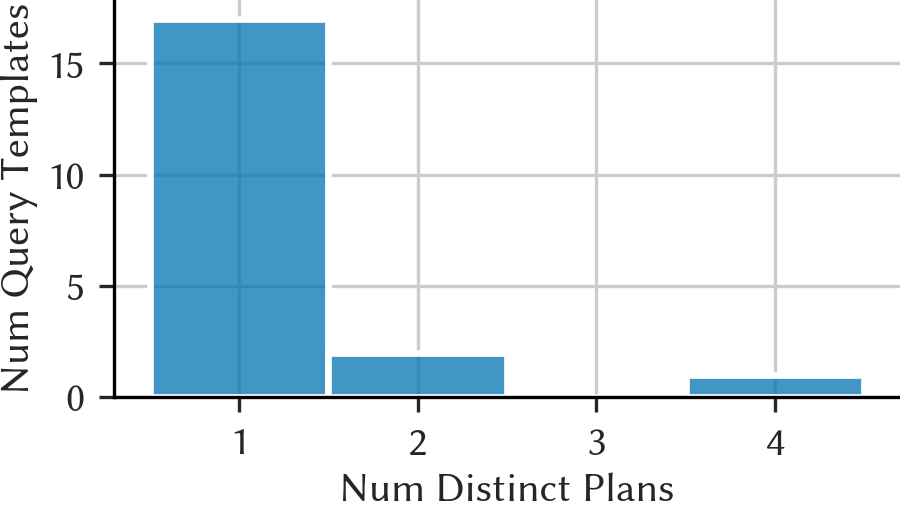

coef_var  pct_rank
QueryNormalized                    
tpch_sf_100-16   0.011566      0.05
tpch_sf_100-6    0.016621      0.10
tpch_sf_100-13   0.022937      0.15
tpch_sf_100-22   0.023463      0.20
tpch_sf_100-1    0.027731      0.25
tpch_sf_100-5    0.030696      0.30
tpch_sf_100-21   0.042951      0.35
tpch_sf_100-7    0.046592      0.40
tpch_sf_100-4    0.055361      0.45
tpch_sf_100-8    0.056630      0.50
tpch_sf_100-3    0.068564      0.55
tpch_sf_100-17   0.073373      0.60
tpch_sf_100-2    0.075262      0.65
tpch_sf_100-10   0.075499      0.70
tpch_sf_100-9    0.077546      0.75
tpch_sf_100-12   0.081896      0.80
tpch_sf_100-19   0.109477      0.85
tpch_sf_100-20   0.121212      0.90
tpch_sf_100-11   0.131692      0.95
tpch_sf_100-15   0.455635      1.00

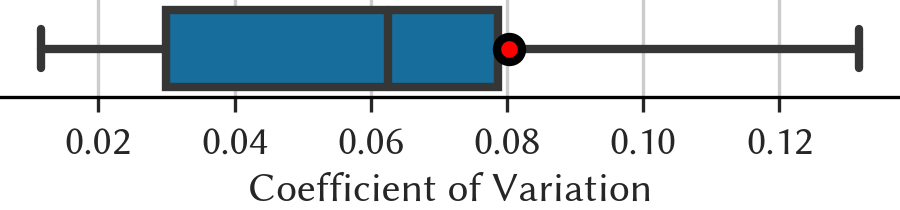

25 tpch_sf_100-1
count     1000.000000
mean     70936.617668
std       1967.130479
min      67314.341000
25%      69371.120250
50%      70492.796500
75%      72345.492750
max      77773.250000
Name: default, dtype: float64


Query Plan Instance  Num Operators  Num Occurrences  Mean Run-time (ms)
0                    1              5             1000        70936.617668

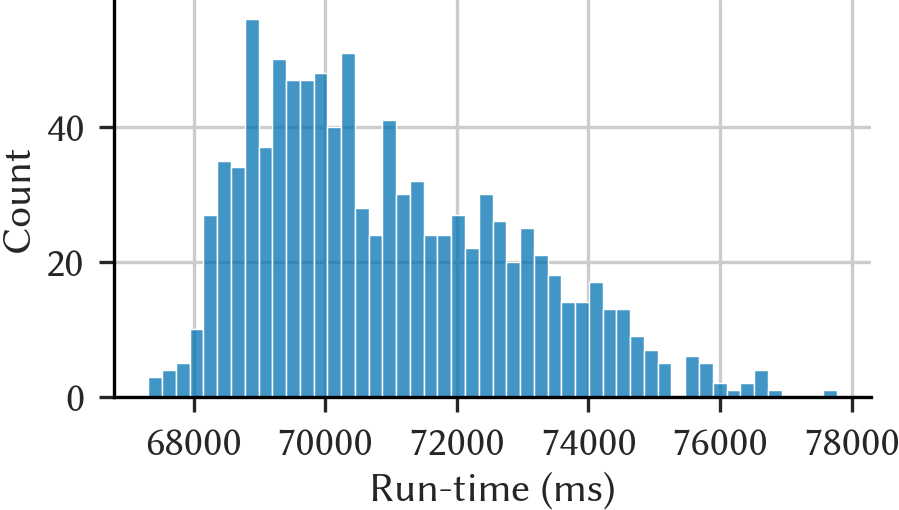

50 tpch_sf_100-8
count     1000.000000
mean     34495.783052
std       1953.483921
min      21317.195000
25%      33584.128750
50%      34494.450000
75%      35570.810250
max      45261.376000
Name: default, dtype: float64


Query Plan Instance  Num Operators  Num Occurrences  Mean Run-time (ms)
0                    1             23              995        34558.407088
1                    2             22                5        22033.599800

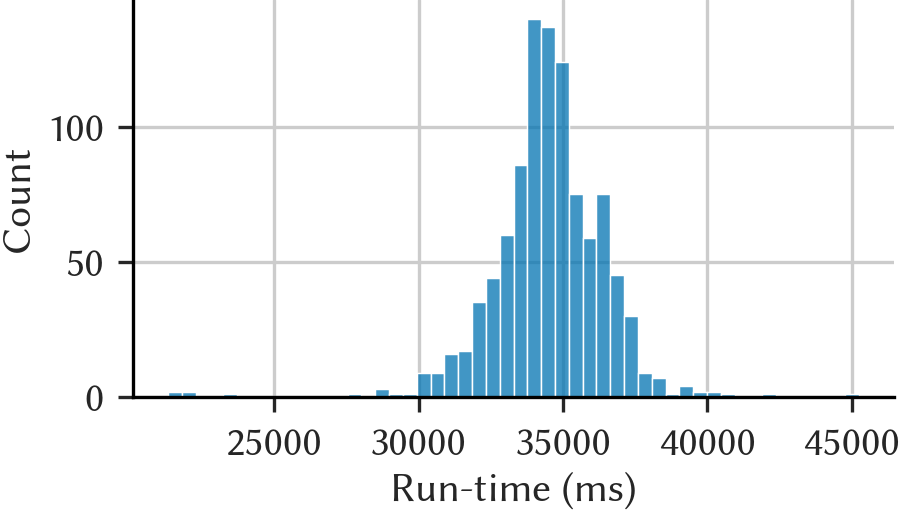

75 tpch_sf_100-9
count     1000.000000
mean     66193.117268
std       5133.026381
min      57639.799000
25%      62392.086250
50%      64819.050500
75%      69105.866000
max      90679.419000
Name: default, dtype: float64


Query Plan Instance  Num Operators  Num Occurrences  Mean Run-time (ms)
0                    1             18               95        76252.340947
1                    2             18               25        66279.650680
2                    3             18              819        65326.872291
3                    4             18               61        62122.052541

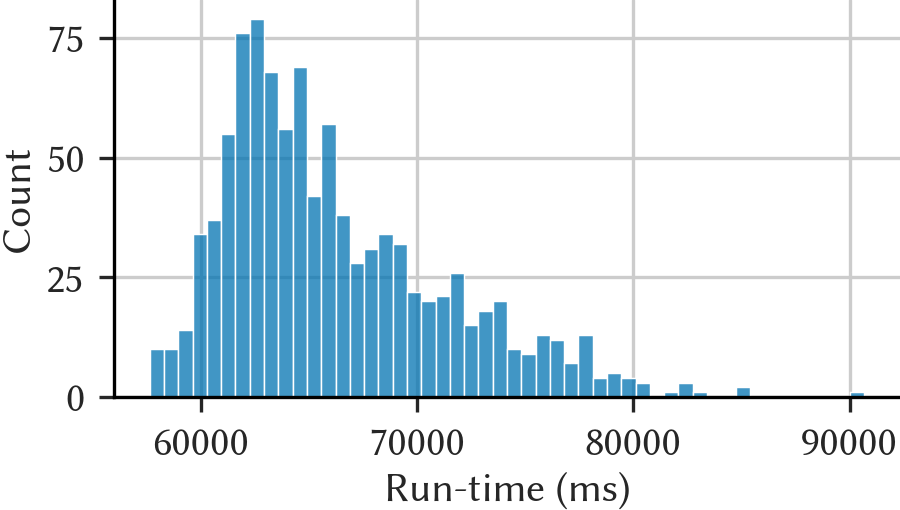

90 tpch_sf_100-20
count      1000.000000
mean     132652.564925
std       16079.087452
min       91682.184000
25%      119901.133750
50%      131457.000500
75%      143786.288500
max      216184.955000
Name: default, dtype: float64


Query Plan Instance  Num Operators  Num Occurrences  Mean Run-time (ms)
0                    1             12             1000       132652.564925

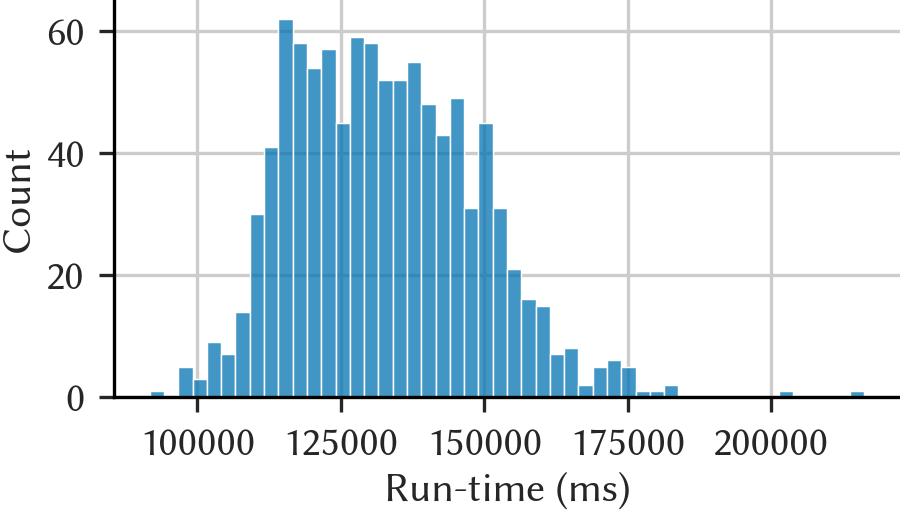

example tpch_sf_100-9
count     1000.000000
mean     66193.117268
std       5133.026381
min      57639.799000
25%      62392.086250
50%      64819.050500
75%      69105.866000
max      90679.419000
Name: default, dtype: float64


Query Plan Instance  Num Operators  Num Occurrences  Mean Run-time (s)
0                    1             18               95          76.252341
1                    2             18               25          66.279651
2                    3             18              819          65.326872
3                    4             18               61          62.122053

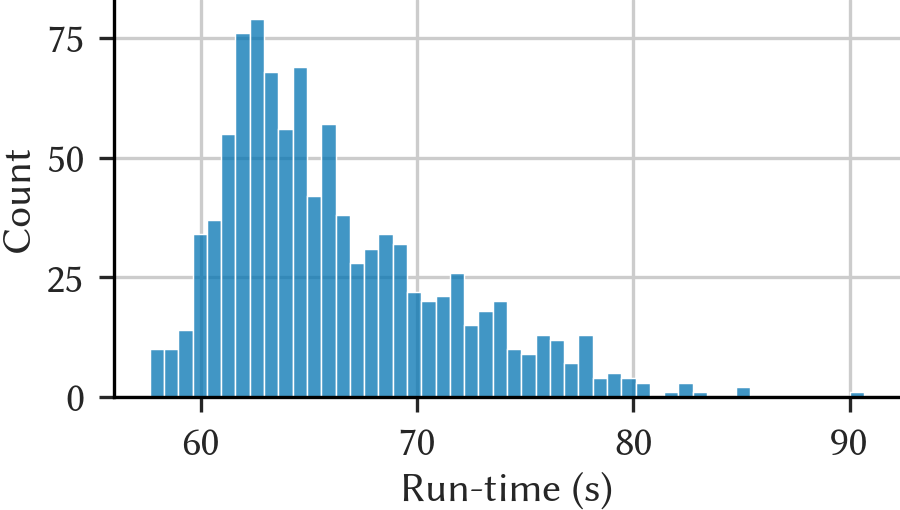

CV Percentile Query  Num Instances Num Operators    Num Occurrences
0            25    Q1              1             5               1000
1            50    Q8              2       22 - 23           [995, 5]
2            75    Q9              4            18  [819, 95, 61, 25]
3            90   Q20              1            12               1000

QueryNormalized  Count
49  dsb_sf_10-query102_spj    104
48      dsb_sf_10-query102     87
25      dsb_sf_10-query064     40
15      dsb_sf_10-query031     14
4       dsb_sf_10-query014     12
32      dsb_sf_10-query083     11
27      dsb_sf_10-query069     10
41      dsb_sf_10-query094     10
17      dsb_sf_10-query039     10
31      dsb_sf_10-query080      7
8   dsb_sf_10-query019_spj      7
22      dsb_sf_10-query054      6
21  dsb_sf_10-query050_spj      6
44      dsb_sf_10-query100      6
37      dsb_sf_10-query087      5
7       dsb_sf_10-query019      5
23      dsb_sf_10-query058      5
13  dsb_sf_10-query027_spj      5
5       dsb_sf_10-query018      4
6   dsb_sf_10-query018_spj      4
29  dsb_sf_10-query072_spj      4
46      dsb_sf_10-query101      4
47  dsb_sf_10-query101_spj      4
45  dsb_sf_10-query100_spj      4
39  dsb_sf_10-query091_spj      3
30      dsb_sf_10-query075      3
24      dsb_sf_10-query059      3
38      dsb_sf_10-query091      3
19  dsb_sf_10-query040_spj      3
12      dsb_sf_10-query027      3
16      dsb_sf_10-query038      3
35      dsb_sf_10-query085      2
43  dsb_sf_10-query099_spj      2
36  dsb_sf_10-query085_spj      2
26      dsb_sf_10-query065      2
28      dsb_sf_10-query072      2
18      dsb_sf_10-query040      2
14      dsb_sf_10-query030      2
9       dsb_sf_10-query023      2
42      dsb_sf_10-query099      2
2       dsb_sf_10-query013      1
3   dsb_sf_10-query013_spj      1
40      dsb_sf_10-query092      1
34  dsb_sf_10-query084_spj      1
33      dsb_sf_10-query084      1
1       dsb_sf_10-query010      1
20      dsb_sf_10-query050      1
11  dsb_sf_10-query025_spj      1
10      dsb_sf_10-query025      1
0       dsb_sf_10-query001      1

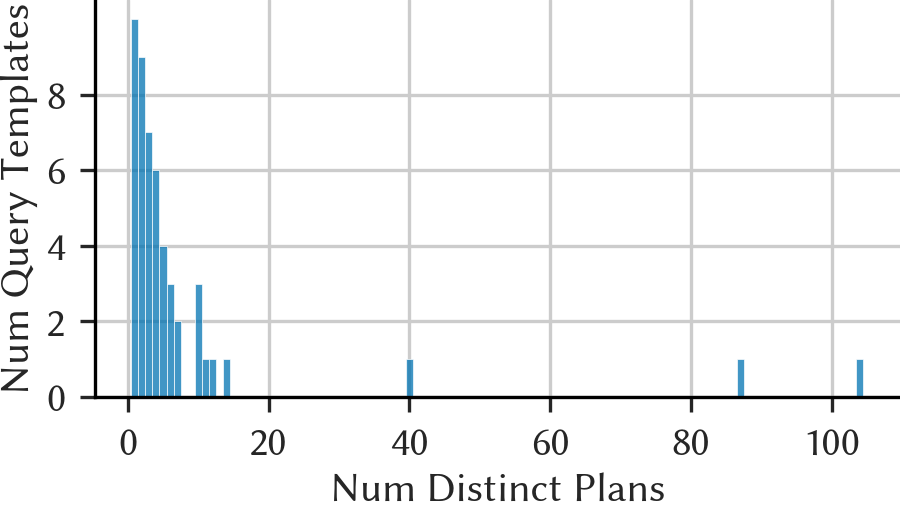

coef_var  pct_rank
QueryNormalized                           
dsb_sf_10-query013      0.005443      0.02
dsb_sf_10-query013_spj  0.005643      0.04
dsb_sf_10-query084_spj  0.022845      0.06
dsb_sf_10-query084      0.024063      0.08
dsb_sf_10-query091      0.065155      0.10
dsb_sf_10-query091_spj  0.067713      0.12
dsb_sf_10-query072      0.170091      0.14
dsb_sf_10-query072_spj  0.172345      0.16
dsb_sf_10-query087      0.179139      0.18
dsb_sf_10-query023      0.179425      0.20
dsb_sf_10-query064      0.187584      0.22
dsb_sf_10-query014      0.201633      0.24
dsb_sf_10-query059      0.217015      0.26
dsb_sf_10-query065      0.230748      0.28
dsb_sf_10-query039      0.239210      0.30
dsb_sf_10-query018_spj  0.253058      0.32
dsb_sf_10-query018      0.255583      0.34
dsb_sf_10-query030      0.257157      0.36
dsb_sf_10-query085_spj  0.262928      0.38
dsb_sf_10-query085      0.263786      0.40
dsb_sf_10-query080      0.275618      0.42
dsb_sf_10-query010      0.295748      0.44
dsb_sf_10-query025_spj  0.309384      0.46
dsb_sf_10-query025      0.316207      0.48
dsb_sf_10-query100_spj  0.361834      0.50
dsb_sf_10-query038      0.362993      0.52
dsb_sf_10-query100      0.363381      0.54
dsb_sf_10-query050      0.370648      0.56
dsb_sf_10-query083      0.407070      0.58
dsb_sf_10-query040_spj  0.434443      0.60
dsb_sf_10-query040      0.435030      0.62
dsb_sf_10-query058      0.442719      0.64
dsb_sf_10-query050_spj  0.446318      0.66
dsb_sf_10-query019      0.478737      0.68
dsb_sf_10-query019_spj  0.480973      0.70
dsb_sf_10-query092      0.536840      0.72
dsb_sf_10-query054      0.647870      0.74
dsb_sf_10-query094      0.680728      0.76
dsb_sf_10-query101      0.901224      0.78
dsb_sf_10-query101_spj  0.909988      0.80
dsb_sf_10-query075      1.066999      0.82
dsb_sf_10-query031      1.106232      0.84
dsb_sf_10-query027_spj  1.175606      0.86
dsb_sf_10-query027      1.183028      0.88
dsb_sf_10-query102      1.281943      0.90
dsb_sf_10-query102_spj  1.490049      0.92
dsb_sf_10-query099_spj  1.574118      0.94
dsb_sf_10-query099      1.581652      0.96
dsb_sf_10-query001      2.629446      0.98
dsb_sf_10-query069      2.816859      1.00

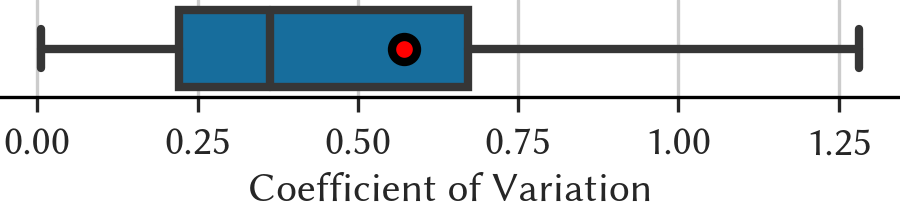

25 dsb_sf_10-query059
count     198.000000
mean     5074.678586
std      1101.282201
min      2208.229000
25%      4233.372000
50%      5045.037000
75%      5745.989000
max      7857.961000
Name: default, dtype: float64


Query Plan Instance  Num Operators  Num Occurrences  Mean Run-time (ms)
2                    3             24               84          5508.60456
0                    1             25               10          5496.57970
1                    2             25              104          4683.63250

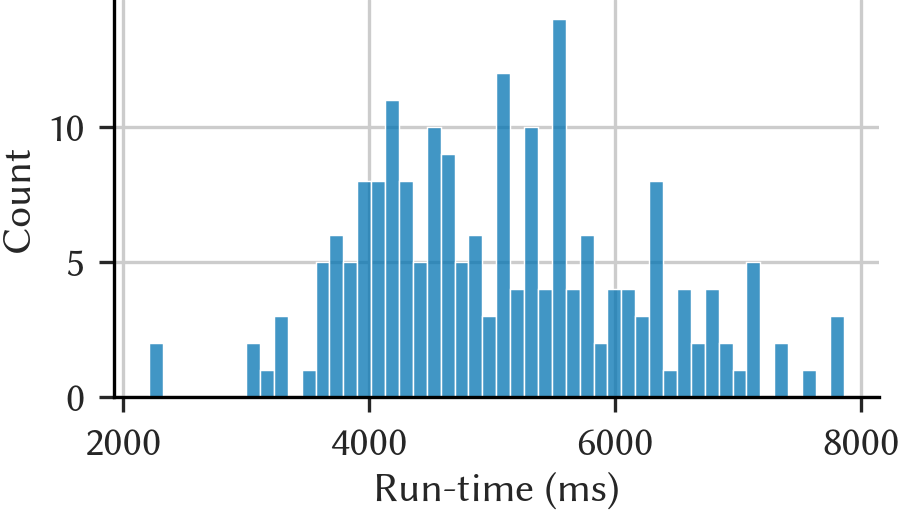

50 dsb_sf_10-query100_spj
count     200.000000
mean      481.239870
std       174.128794
min       198.795000
25%       360.565250
50%       446.661000
75%       560.818500
max      1134.989000
Name: default, dtype: float64


Query Plan Instance  Num Operators  Num Occurrences  Mean Run-time (ms)
0                    1             20              120          510.438750
2                    3             19               56          449.490821
1                    2             19               20          436.503350
3                    4             19                4          273.442750

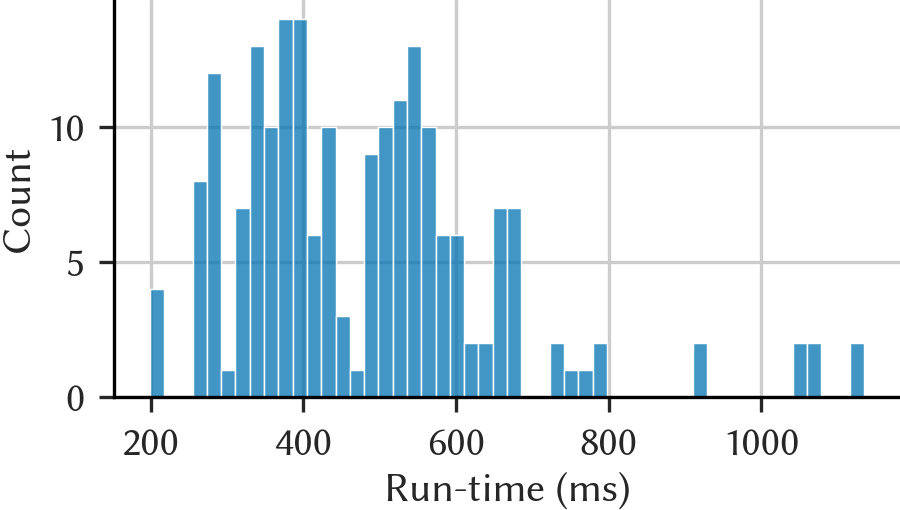

75 dsb_sf_10-query094
count     200.000000
mean      522.226940
std       355.494634
min       293.425000
25%       421.072000
50%       476.210000
75%       542.720500
max      3899.590000
Name: default, dtype: float64


Query Plan Instance  Num Operators  Num Occurrences  Mean Run-time (ms)
0                    1             16                2         3892.716000
2                    3             16                2          559.696000
1                    2             17                2          524.220500
3                    4             17              104          512.388865
4                    5             16                2          495.663000
5                    6             17               64          481.398516
8                    9             17               16          394.855125
7                    8             17                6          393.605333
9                   10             16                1          366.478000
6                    7             15                1          357.058000

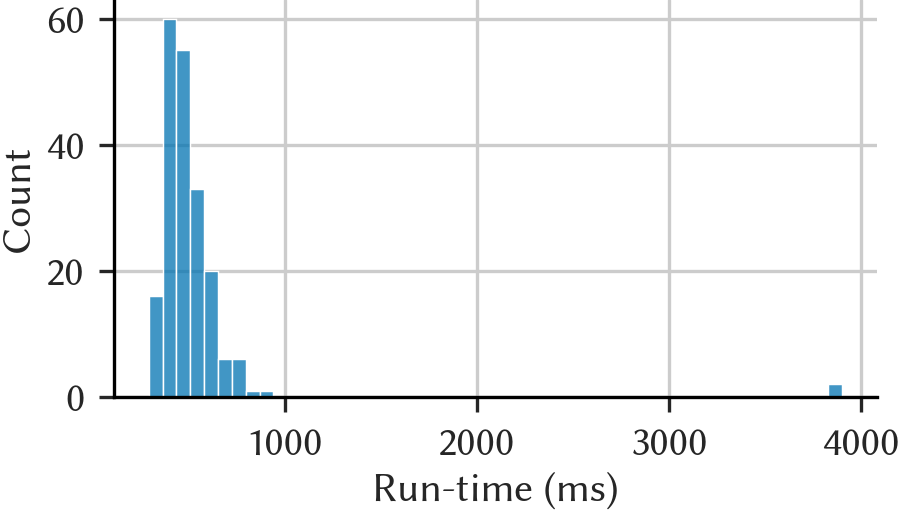

90 dsb_sf_10-query102
count      199.000000
mean      2708.899281
std       3472.654303
min        404.416000
25%        552.098500
50%       1011.643000
75%       4331.474000
max      19667.790000
Name: default, dtype: float64


Query Plan Instance  Num Operators  Num Occurrences  Mean Run-time (ms)
85                   86             28                2          19550.2615
11                   12             31                2          17262.8170
69                   70             28                2          12955.3215
82                   83             30                1           8827.4280
22                   23             32                2           7399.9010
..                  ...            ...              ...                 ...
62                   63             32                2            442.7310
2                     3             30                2            432.6995
81                   82             28                2            429.0430
49                   50             32                2            421.4385
30                   31             31                2            405.3600

[87 rows x 4 columns]

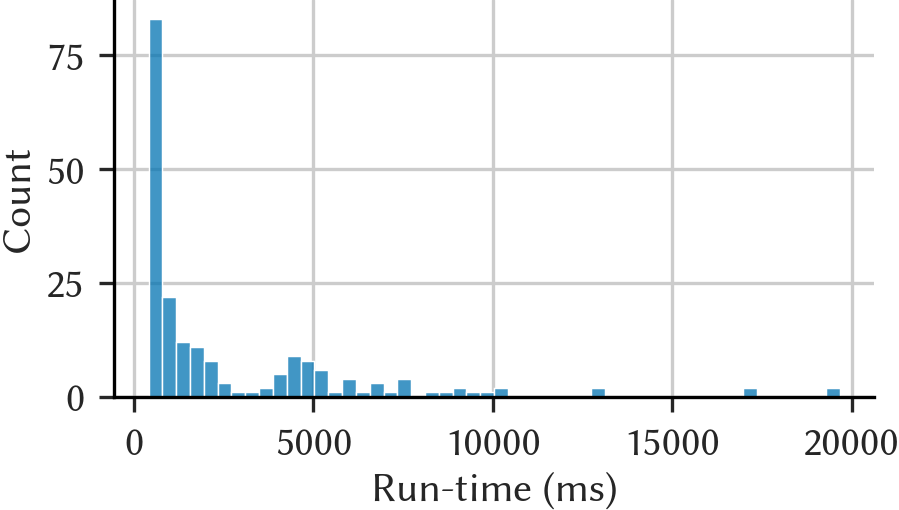

CV Percentile         Query  Num Instances Num Operators  \
0            25      query059              3       24 - 25   
1            50  query100_spj              4       19 - 20   
2            75      query094             10       15 - 17   
3            90      query102             87       27 - 34   

               Num Occurrences  
0                [104, 84, 10]  
1             [120, 56, 20, 4]  
2  [104, 64, 16, 6, 2, 2, ...]  
3    [27, 12, 8, 6, 5, 4, ...]

In [9]:
def plot_characteristics(expt_name):
    def compute_query_hash(fp):
        def _featurize_query_hash(plan_dict):
            # hash(qp) = enc(qp["Node Type"]) || (hash(child) for child in qp["Plans"])
            node_type = plan_dict["Node Type"]
            output_hash = [node_type]
            if "Plans" in plan_dict:
                for child in plan_dict["Plans"]:
                    output_hash.extend(_featurize_query_hash(child))
            return output_hash

        plan = None
        try:
            with open(fp) as f:
                contents = "".join(f.readlines())
                plan = eval(contents)["Plan"] if len(contents) > 0 else None
        except FileNotFoundError as e:
            if Path(str(fp)[:-len("res")] + "err").exists():
                return None
            raise e
                
        if plan is None:
            return None
        return tuple(_featurize_query_hash(plan))
    
    fig_dir = PLOT_ROOT / f"results_{expt_name}"
    fig_dir.mkdir(exist_ok=True, parents=True)

    df = pd.read_csv(MODEL_ROOT / f"{expt_name}/runtime_query_seed.csv")
    df["QueryNormalized"] = expt_name + "-" + df["Query"].str.split("-").str[0]
    df = df[df["default"] != 300000]
    
    benchmark, *sf = expt_name.split("_")
    sf = "_".join(sf) + ("/default" if "dsb" in benchmark else "")
    def get_fp(row):
        return str(ARTIFACT_ROOT / f"experiment/default/{benchmark}/{sf}/{row.Seed}/{row.Query}.res")
    
    df["FP"] = df.apply(get_fp, axis=1)
    df["Query Hash"] = df.apply(lambda row: compute_query_hash(row["FP"]), axis=1)

    sizes = df.groupby(["QueryNormalized", "Query Hash"]).size().groupby(level=0).size().to_frame(name="Count").reset_index().sort_values(["Count"], ascending=False)
    display(sizes)

    fig_quarter()
    ax = sns.histplot(data=sizes, x="Count", discrete=True)
    ax.set_xlabel("Num Distinct Plans")
    ax.set_ylabel("Num Query Templates")
    
    if expt_name == "dsb_sf_10":
        ax.set_yticks([0, 2, 4, 6, 8])
    
    plt.tight_layout()
    plt.savefig(fig_dir / "distinct_plans.pdf")
    plt.show()

    grouped_runtimes = df.groupby(["QueryNormalized"])["default"]
    # Coefficient of variation
    coef_var = (grouped_runtimes.std() / grouped_runtimes.mean()).sort_values().to_frame(name="coef_var")
    coef_var["pct_rank"] = coef_var.rank(pct=True)
    with pd.option_context("display.max_rows", None, "display.max_columns", None):
        display(coef_var)

    pct_25 = coef_var[coef_var.pct_rank >= 0.25].head(1).index.values[0]
    pct_50 = coef_var[coef_var.pct_rank >= 0.5].head(1).index.values[0]
    pct_75 = coef_var[coef_var.pct_rank >= 0.75].head(1).index.values[0]
    pct_90 = coef_var[coef_var.pct_rank >= 0.90].head(1).index.values[0]

    fig_quarter()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figsize_quarter[0], figsize_quarter[1]/2))
    ax = sns.boxplot(coef_var["coef_var"], orient="h", ax=ax)
    ax.set_yticks([])
    ax.get_yaxis().set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xlabel("Coefficient of Variation")
    plt.tight_layout()
    plt.savefig(fig_dir / "coef_var.pdf")
    plt.show()
    
    pct_datas = []
    pct_ns = ["25", "50", "75", "90"]
    pct_queries = [pct_25, pct_50, pct_75, pct_90]
    if expt_name == "tpch_sf_100":
        pct_ns.append("example")
        pct_queries.append("tpch_sf_100-9")
    for pct_n, pct_query in zip(pct_ns, pct_queries):
        print(pct_n, pct_query)
        fig_quarter()
        height = figsize_quarter[1]
        width = figsize_quarter[0]
        
        tmpdf = df[df.QueryNormalized == pct_query].copy()
        # tmpdf["FP"] = tmpdf.apply(get_fp, axis=1)
        # tmpdf["Query Hash"] = tmpdf.apply(lambda row: compute_query_hash(row["FP"]), axis=1)
        
        if pct_n == "example":
            target_unit = "s"
        else:
            target_unit = "ms"
            
        print(tmpdf.default.describe())
        
        gdata = []
        for gi, (g, gdf) in enumerate(tmpdf.groupby(["Query Hash"]), 1):
            num_ops = len(g)
            num_occurrences = len(gdf["default"])
            mean_runtime_target = gdf["default"].mean()
            if target_unit == "s":
                mean_runtime_target /= 1e3
            gdata.append((gi, num_ops, num_occurrences, mean_runtime_target))
        gdata = pd.DataFrame(gdata, columns=["Query Plan Instance", "Num Operators", "Num Occurrences", f"Mean Run-time ({target_unit})"])
        gdata = gdata.sort_values([f"Mean Run-time ({target_unit})", "Num Occurrences"], ascending=[False, True])
        display(gdata)
        
        if pct_n == "example":
            # num ops won't fit + this particular example shows no variation over num ops
            with open(fig_dir / f"displot_pct_{pct_n}_{pct_query}.tex", "w") as f:
                print(r"\begin{tabular}{|r|r|r|r|}", file=f)
                print(r"\hline", file=f)
                print(r"\textbf{Plan Id} & \textbf{Count} & \textbf{Avg Run-time (" + target_unit + r")} \\", file=f)
                print(r"\hline", file=f)
                for row in gdata.itertuples():
                    _, pid, nops, nocs, mrt = row
                    print(f"P{pid} & {nocs} & {mrt:.0f} \\\\", file=f)
                print(r"\hline", file=f)
                print(r"\end{tabular}", file=f)
        else:
            with open(fig_dir / f"displot_pct_{pct_n}_{pct_query}.tex", "w") as f:
                print(r"\begin{tabular}{|r|r|r|r|}", file=f)
                print(r"\hline", file=f)
                print(r"Plan Id & \# Operators & \# Occurrences & Mean Run-time (" + target_unit + r") \\", file=f)
                print(r"\hline", file=f)
                for row in gdata.itertuples():
                    _, pid, nops, nocs, mrt = row
                    print(f"P{pid} & {nops} & {nocs} & {mrt:.0f} \\\\", file=f)
                print(r"\hline", file=f)
                print(r"\end{tabular}", file=f)
        
        if pct_n != "example":
            pct_data = [pct_n, ("Q" if "tpch" in benchmark else "") + pct_query.split("-")[1]]
            pct_data.append(gdata.shape[0])

            if gdata["Num Operators"].nunique() == 1:
                pct_data.append("{}".format(gdata["Num Operators"].unique()[0]))
            else:
                pct_data.append("{} - {}".format(gdata["Num Operators"].min(), gdata["Num Operators"].max()))

            if gdata["Num Occurrences"].nunique() == 1:
                pct_data.append("{}".format(gdata["Num Occurrences"].unique()[0]))
            else:
                numos = gdata["Num Occurrences"].sort_values(ascending=False).values
                numo = []
                for i, n in enumerate(numos, 1):
                    numo.append(str(n))
                    if i > 5:
                        numo.append("...")
                        break
                pct_data.append("[" + ", ".join(numo) + "]")

            pct_datas.append(pct_data)
        
        fig_quarter()
        tmpdf["default (ms)"] = tmpdf["default"]
        tmpdf["default (s)"] = tmpdf["default"] / 1e3
        ax = sns.displot(tmpdf, x=f"default ({target_unit})", kind="hist", height=height, aspect=width / height, bins=50)
        ax.axes[0][0].set_xlabel(f"Run-time ({target_unit})")
        plt.tight_layout()
        plt.savefig(fig_dir / f"displot_pct_{pct_n}_{pct_query}.pdf")
        plt.show()
    
    pct_datas = pd.DataFrame(pct_datas, columns=["CV Percentile", "Query", "Num Instances", "Num Operators", "Num Occurrences"])
    display(pct_datas)

    with open(fig_dir / f"displot_pct_all.tex", "w") as f:
        print(r"\begin{tabular}{|r|r|r|r|r|r|}", file=f)
        print(r"\hline", file=f)
        print(r"CV \%ile & Query & \# Plans & \# Operators & \# Occurrences \\", file=f)
        print(r"\hline", file=f)
        for row in pct_datas.itertuples():
            _, cvpct, query, numi, numop, numoc = row
            query = query.replace("_", "\\_")
            print(f"{cvpct} & {query} & {numi} & {numop} & {numoc} \\\\", file=f)
        print(r"\hline", file=f)
        print(r"\end{tabular}", file=f)

plot_characteristics("tpch_sf_100")
plot_characteristics("dsb_sf_10")

tpch_sf_10


Runtime (s)       13308.747765
MAE (s)               0.121915
Run-time (s)      13308.747765
Run-time (min)      221.812463
Name: default, dtype: float64

hypstd  hypopt    hyptime  Run-time (min)   MAE (s)
0      1.0    0.01   100000.0       69.857827  3.933796
1      1.0    0.01   500000.0      136.261949  2.766992
2      1.0    0.01  1000000.0      165.661330  2.097672
3      1.0    0.05   100000.0      114.943531  2.867170
4      1.0    0.05   500000.0      166.642118  2.116906
5      1.0    0.05  1000000.0      178.794267  1.718173
6      1.0    0.10   100000.0      175.843164  2.165045
7      1.0    0.10   500000.0      224.563404  0.647219
8      1.0    0.10  1000000.0      226.882169  0.691068
9      2.0    0.01   100000.0       61.121953  4.125081
10     2.0    0.01   500000.0      132.351658  2.816716
11     2.0    0.01  1000000.0      158.398590  2.186287
12     2.0    0.05   100000.0       91.533824  3.390785
13     2.0    0.05   500000.0      152.003462  2.365665
14     2.0    0.05  1000000.0      174.357391  1.964206
15     2.0    0.10   100000.0      152.473519  1.922441
16     2.0    0.10   500000.0      194.065083  1.379014
17     2.0    0.10  1000000.0      203.407127  1.164210
18     3.0    0.01   100000.0       59.897579  4.170088
19     3.0    0.01   500000.0      133.649344  2.829928
20     3.0    0.01  1000000.0      159.002112  2.214585
21     3.0    0.05   100000.0       89.102976  3.456858
22     3.0    0.05   500000.0      150.438320  2.381724
23     3.0    0.05  1000000.0      169.208059  2.058573
24     3.0    0.10   100000.0      140.273252  2.246051
25     3.0    0.10   500000.0      186.272093  1.516390
26     3.0    0.10  1000000.0      196.451540  1.303774

std=1


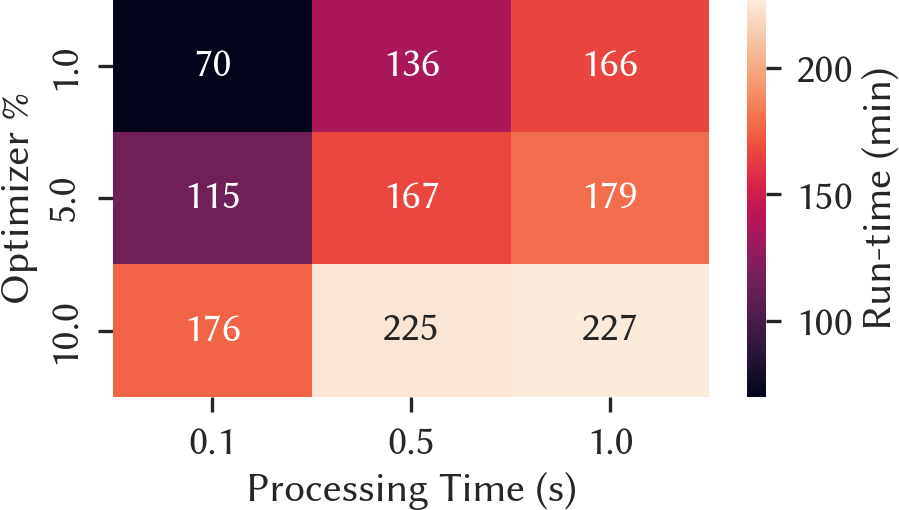

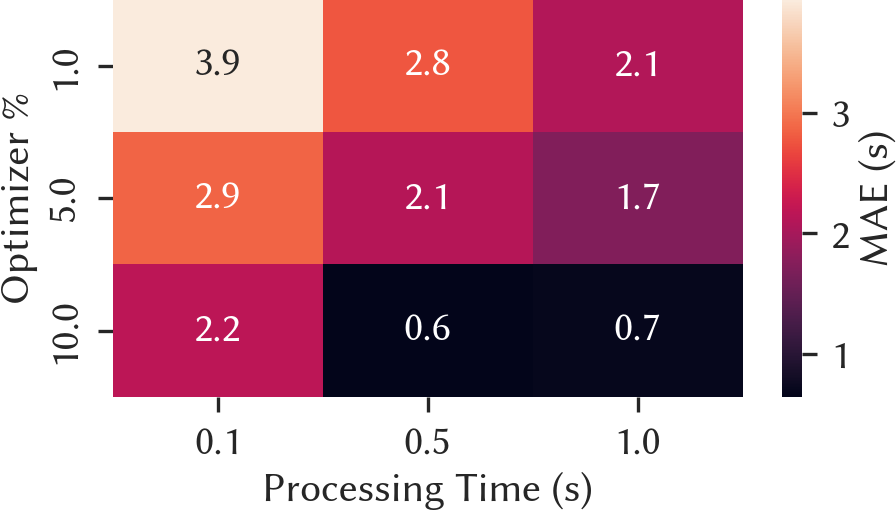

std=2


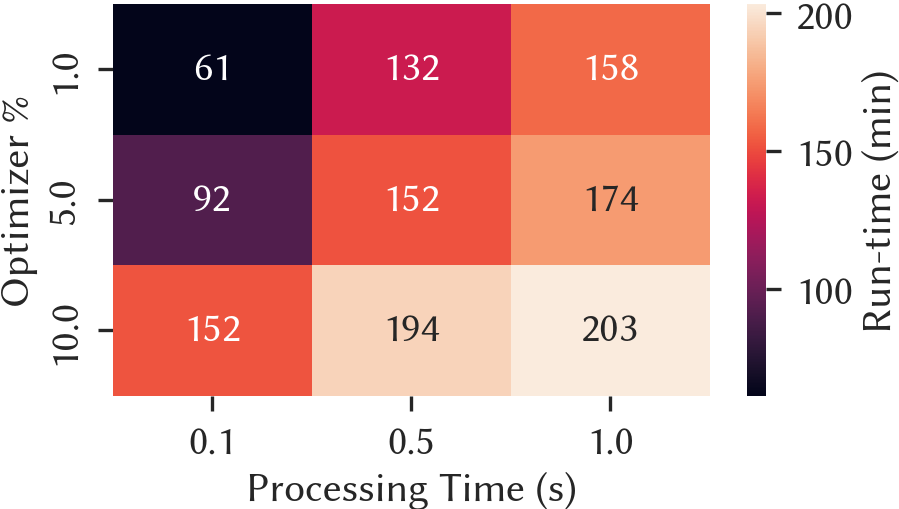

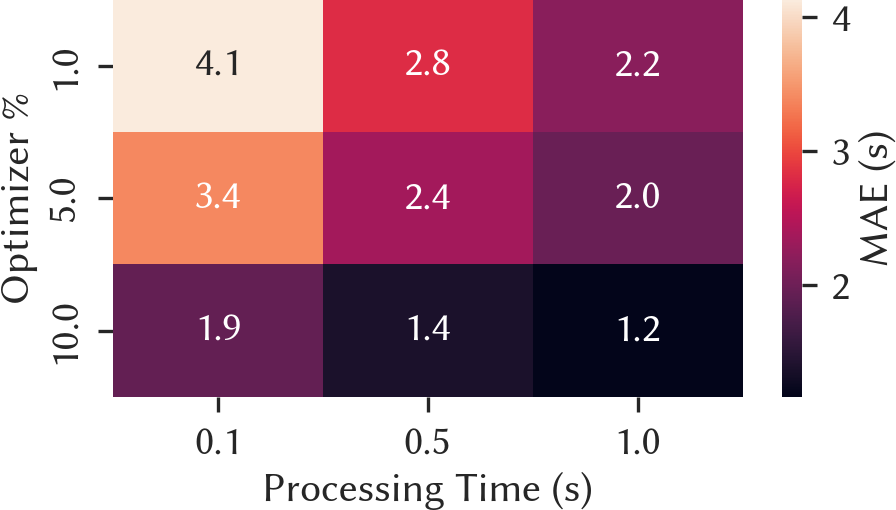

std=3


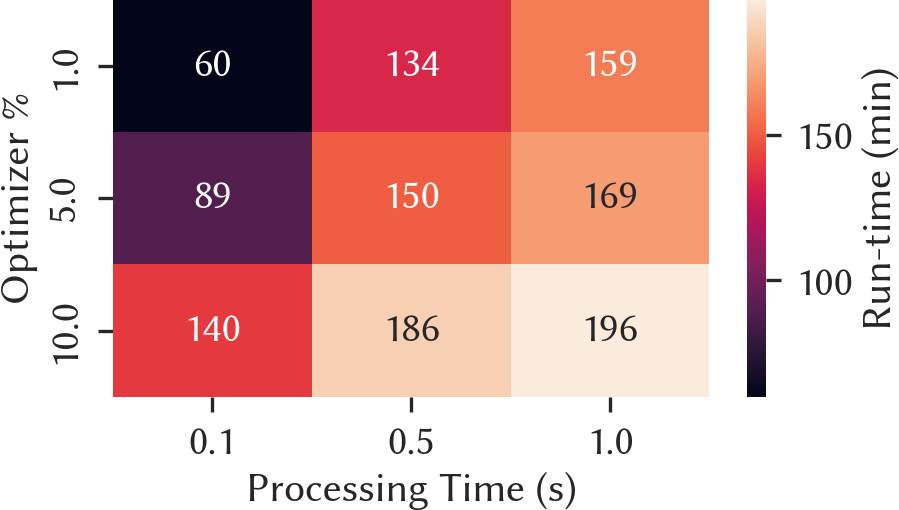

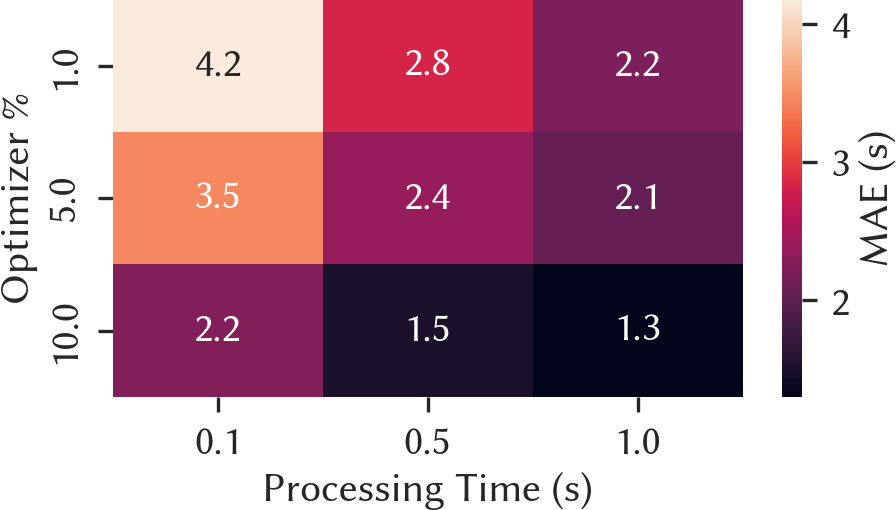

In [10]:
def plot_muhyp(expt_name):
    print(expt_name)
    
    fig_dir = PLOT_ROOT / f"muhyp_results_{expt_name}"
    fig_dir.mkdir(exist_ok=True, parents=True)
    
    configs = [
        "default",
        "nts_b10_r15721",
        "sts_b10_r15721",
        'bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721',
        'bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721',
        'bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721',
    ]
    
    rename = {
        "default": "Original",
        "nts_b10_r15721": "Automatic",
        "sts_b10_r15721": "Manual",
        "bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721": "µA",
        "bytejack_e1_iea1_ic1_es0_ss0_ssp100_sss15721": "MA",
        "bytejack_e1_iea1_ic1_es1_ss0_ssp100_sss15721": "Combined",
        "bytejack_e1_iea1_ic1_es1_ss1_ssp10_sss15721": "C10",
    }
    colors = {c: col for c, col in zip(configs, sns.color_palette("Set2"))}
    
    if "dsb" in expt_name:
        configs = [x for x in configs if "ts_b10" not in x]
    
    names = [rename[c] for c in configs]
    
    df = pd.read_csv(f"./artifact_muhyp/model/{expt_name}/summary.csv")
    df = df.set_index("Experiment")
    df["Run-time (s)"] = df["Runtime (s)"]
    df["Run-time (min)"] = df["Run-time (s)"] / 60
    display(df.loc["default"])
    
    def get_colname(hypstdev, hypopt, hyptime):
        return f"bytejack_e1_iea0_ic0_es1_ss0_ssp100_sss15721_muhypopt_{hypopt}_muhyptime_{hyptime}_muhypstdev_{hypstdev}"
    
    stdevs = ["1", "2", "3"]
    opts = ["0.01", "0.05", "0.1"]
    times = ["100000.0", "500000.0", "1000000.0"]
    
    data = []
    for hypstdev in stdevs:
        for hypopt in opts:
            for hyptime in times:
                datum = df.loc[get_colname(hypstdev, hypopt, hyptime)]
                data.append((float(hypstdev), float(hypopt), float(hyptime), datum["Run-time (min)"], datum["MAE (s)"]))
    data = pd.DataFrame(data, columns=["hypstd", "hypopt", "hyptime", "Run-time (min)", "MAE (s)"])
    data = data.sort_values(["hypstd", "hypopt", "hyptime"])
    display(data)
    data["Optimizer %"] = data["hypopt"] * 100
    # hyptime in us
    data["Processing Time (s)"] = data["hyptime"] / (1e6)
    
    for std in stdevs:
        sdf = data[data["hypstd"] == float(std)].copy()
        print(f"std={std}")
        fig_quarter()
        ax = sns.heatmap(sdf.pivot(index="Optimizer %", columns="Processing Time (s)", values="Run-time (min)"), annot=True, fmt=".0f", cbar_kws={"label": "Run-time (min)"})
        plt.tight_layout()
        plt.savefig(fig_dir / f"muhyp_heatmap_std_{std}_runtime.pdf")
        plt.show()
        fig_quarter()
        ax = sns.heatmap(sdf.pivot(index="Optimizer %", columns="Processing Time (s)", values="MAE (s)"), annot=True, fmt=".1f", cbar_kws={"label": "MAE (s)"})
        plt.tight_layout()
        plt.savefig(fig_dir / f"muhyp_heatmap_std_{std}_mae.pdf")
        plt.show()
    
    
plot_muhyp("tpch_sf_10")